# Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

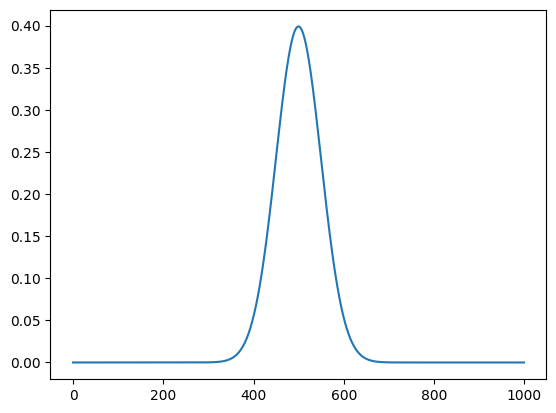

In [2]:
# takes a list fo x values in a given range with some number of finite
# divisions, will create a y value that correlates with each x value that was passed
def normal_dist(mean, sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5 * ((x - mean) / sd) ** 2)
    return prob_density

normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t $\\sigma_0$ = 1 \t $\\sigma_1$ = 2 \t $\\sigma_1$ = 3 ')

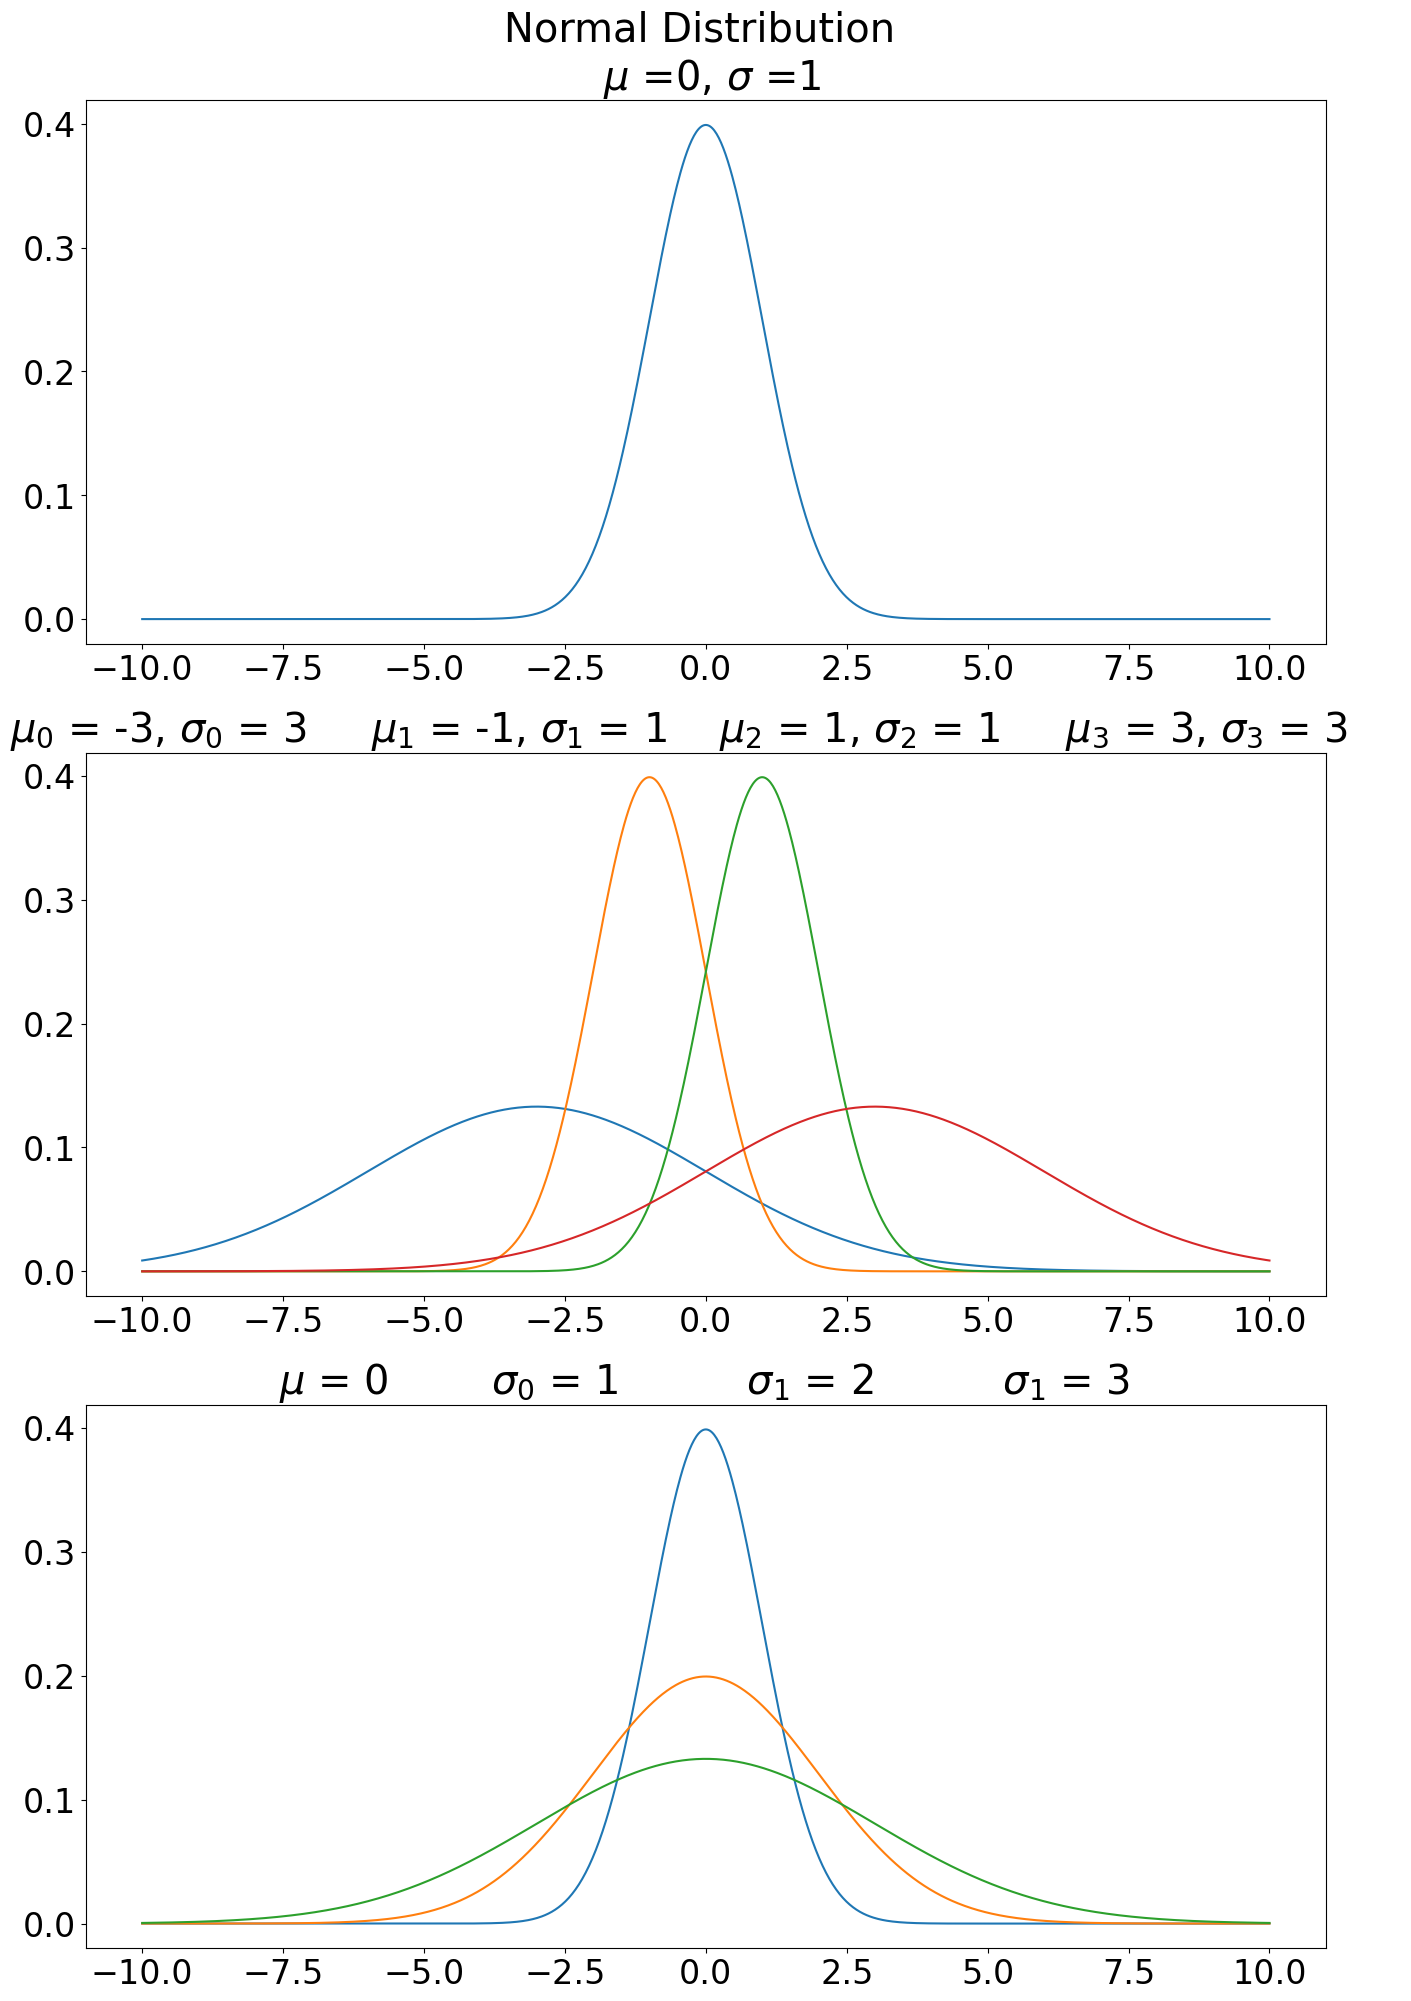

In [3]:
plt.rcParams.update({'font.size' : 24})
fig, axs = plt.subplots(3, 1, figsize = (16, 24))
x = np.linspace(-10, 10, 1000)

# perform transformation
# Setting mean and standard deviation variables to 0 and 1, respectively
mean_, sd = 0, 1

# Generating a list of values for the normal distribution with mean and standard deviation defined above
normal_dist_list = normal_dist(mean=0, sd=1, x=x)

# Plotting the normal distribution on the first subplot
axs[0].plot(x, normal_dist_list)

# Setting the title of the first subplot to include the mean and standard deviation values
axs[0].set_title('Normal Distribution \n $\mu$ =' + str(mean_) +  ', $\sigma$ =' + str(sd))

# Initializing empty strings and subplots for the second and third plots
ax1_title = ''
ax1_sub = 0
ax2_title = '$\mu$ = 0'
ax2_sub = 0

# Looping through a range of mean values from -3 to 3 in steps of 2
for mean_ in range(-3, 4, 2):
    # Setting standard deviation to be the absolute value of the current mean value
    sd = abs(mean_)
    
    # Generating a list of values for the normal distribution with the current mean and standard deviation values
    normal_dist_list = normal_dist(mean=mean_, sd=sd, x=x)
    
    # Plotting the normal distribution on the second subplot
    axs[1].plot(x, normal_dist_list)
    
    # Updating the title of the second subplot to include the mean and standard deviation values
    ax1_title = ax1_title + '$\mu_' + str(ax1_sub) + '$ = ' + str(mean_) + ', '
    ax1_title = ax1_title + '$\sigma_' + str(ax1_sub) + '$ = ' + str(sd) + '\t '
    ax1_sub += 1
    
# Setting the title of the second subplot to the updated title string
axs[1].set_title(ax1_title)

# Looping through a range of standard deviation values from 1 to 3
for sd in range(1, 4):
    # Setting mean value to 0
    mean_ = 0
    
    # Generating a list of values for the normal distribution with the current mean and standard deviation values
    normal_dist_list = normal_dist(mean=mean_, sd=sd, x=x)
    
    # Plotting the normal distribution on the third subplot
    axs[2].plot(x, normal_dist_list)
    
    # Updating the title of the third subplot to include the standard deviation value
    ax2_title = ax2_title + '\t $\sigma_' + str(ax2_sub) + '$ = ' + str(sd) + ' '
    ax2_sub =+ 1
    
# Setting the title of the third subplot to the updated title string
axs[2].set_title(ax2_title)

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 

In [4]:
import warnings
warnings.filterwarnings('ignore')
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)

# Defining a function that takes in a mean, standard deviation, and an optional array of x values
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    # Calculating the density values for each x value using the log-normal distribution formula
    density_points = (1 / x * sd * np.sqrt(2 * math.pi)) * math.e ** (
        -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    # Returning the calculated density values
    return density_points

# Generating an array of 1000 x values between 0 and 10
x = np.linspace(0, 10, 1000)

# Setting mean and standard deviation variables to 1 each
mean, sd = 1,1

# Calling the create_lognormal function with the defined mean, standard deviation, and x values
log_norm = create_lognormal(mean = mean, sd = sd, x = x)

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

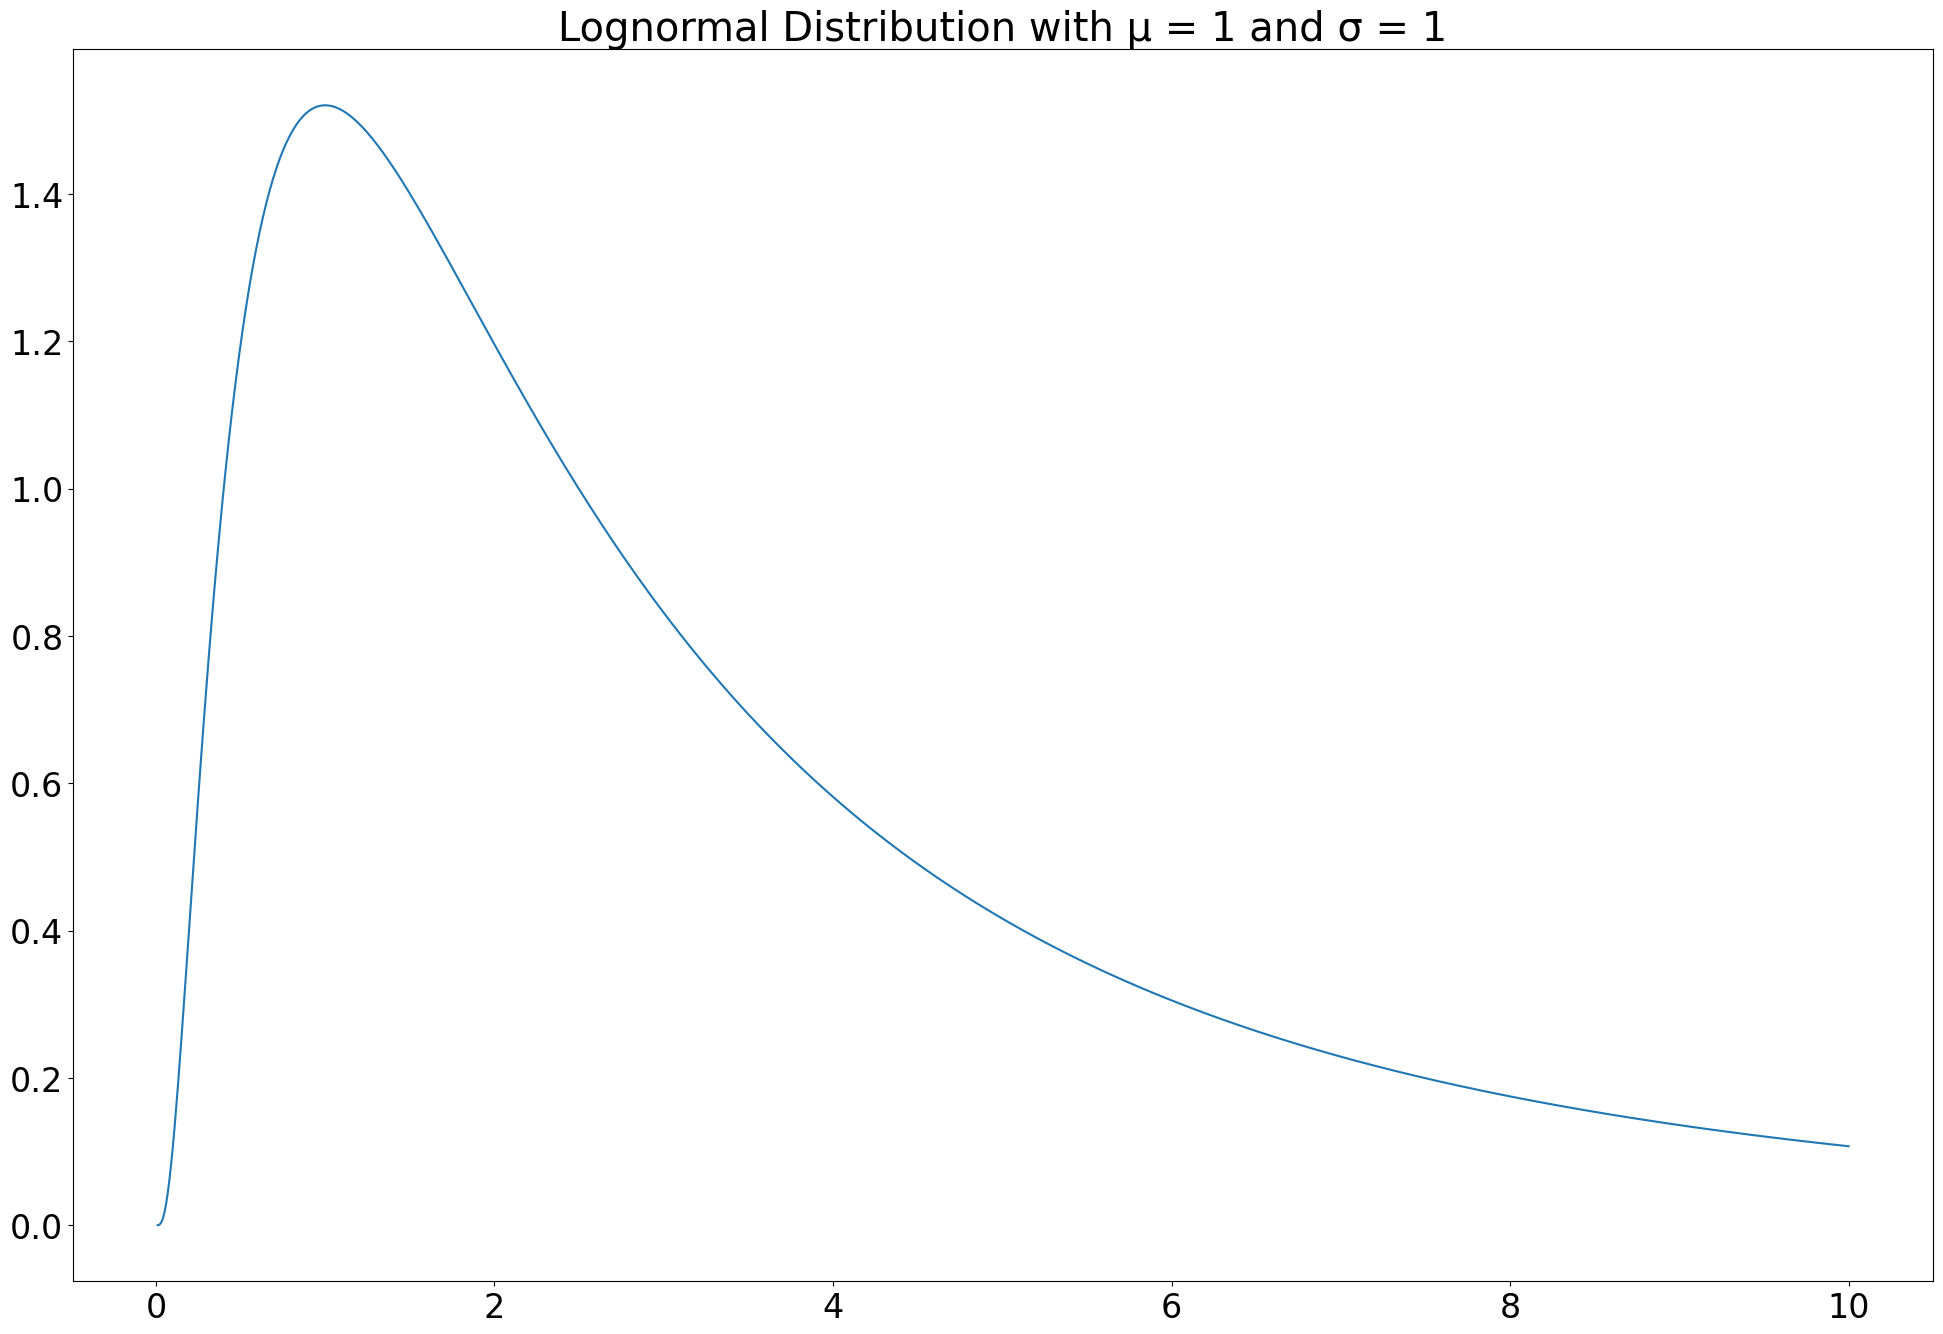

In [5]:
fig, ax = plt.subplots(figsize = (24, 16))
ax.plot(x, log_norm)
ax.set_title('Lognormal Distribution with μ = ' + str(mean) + ' and σ = ' + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

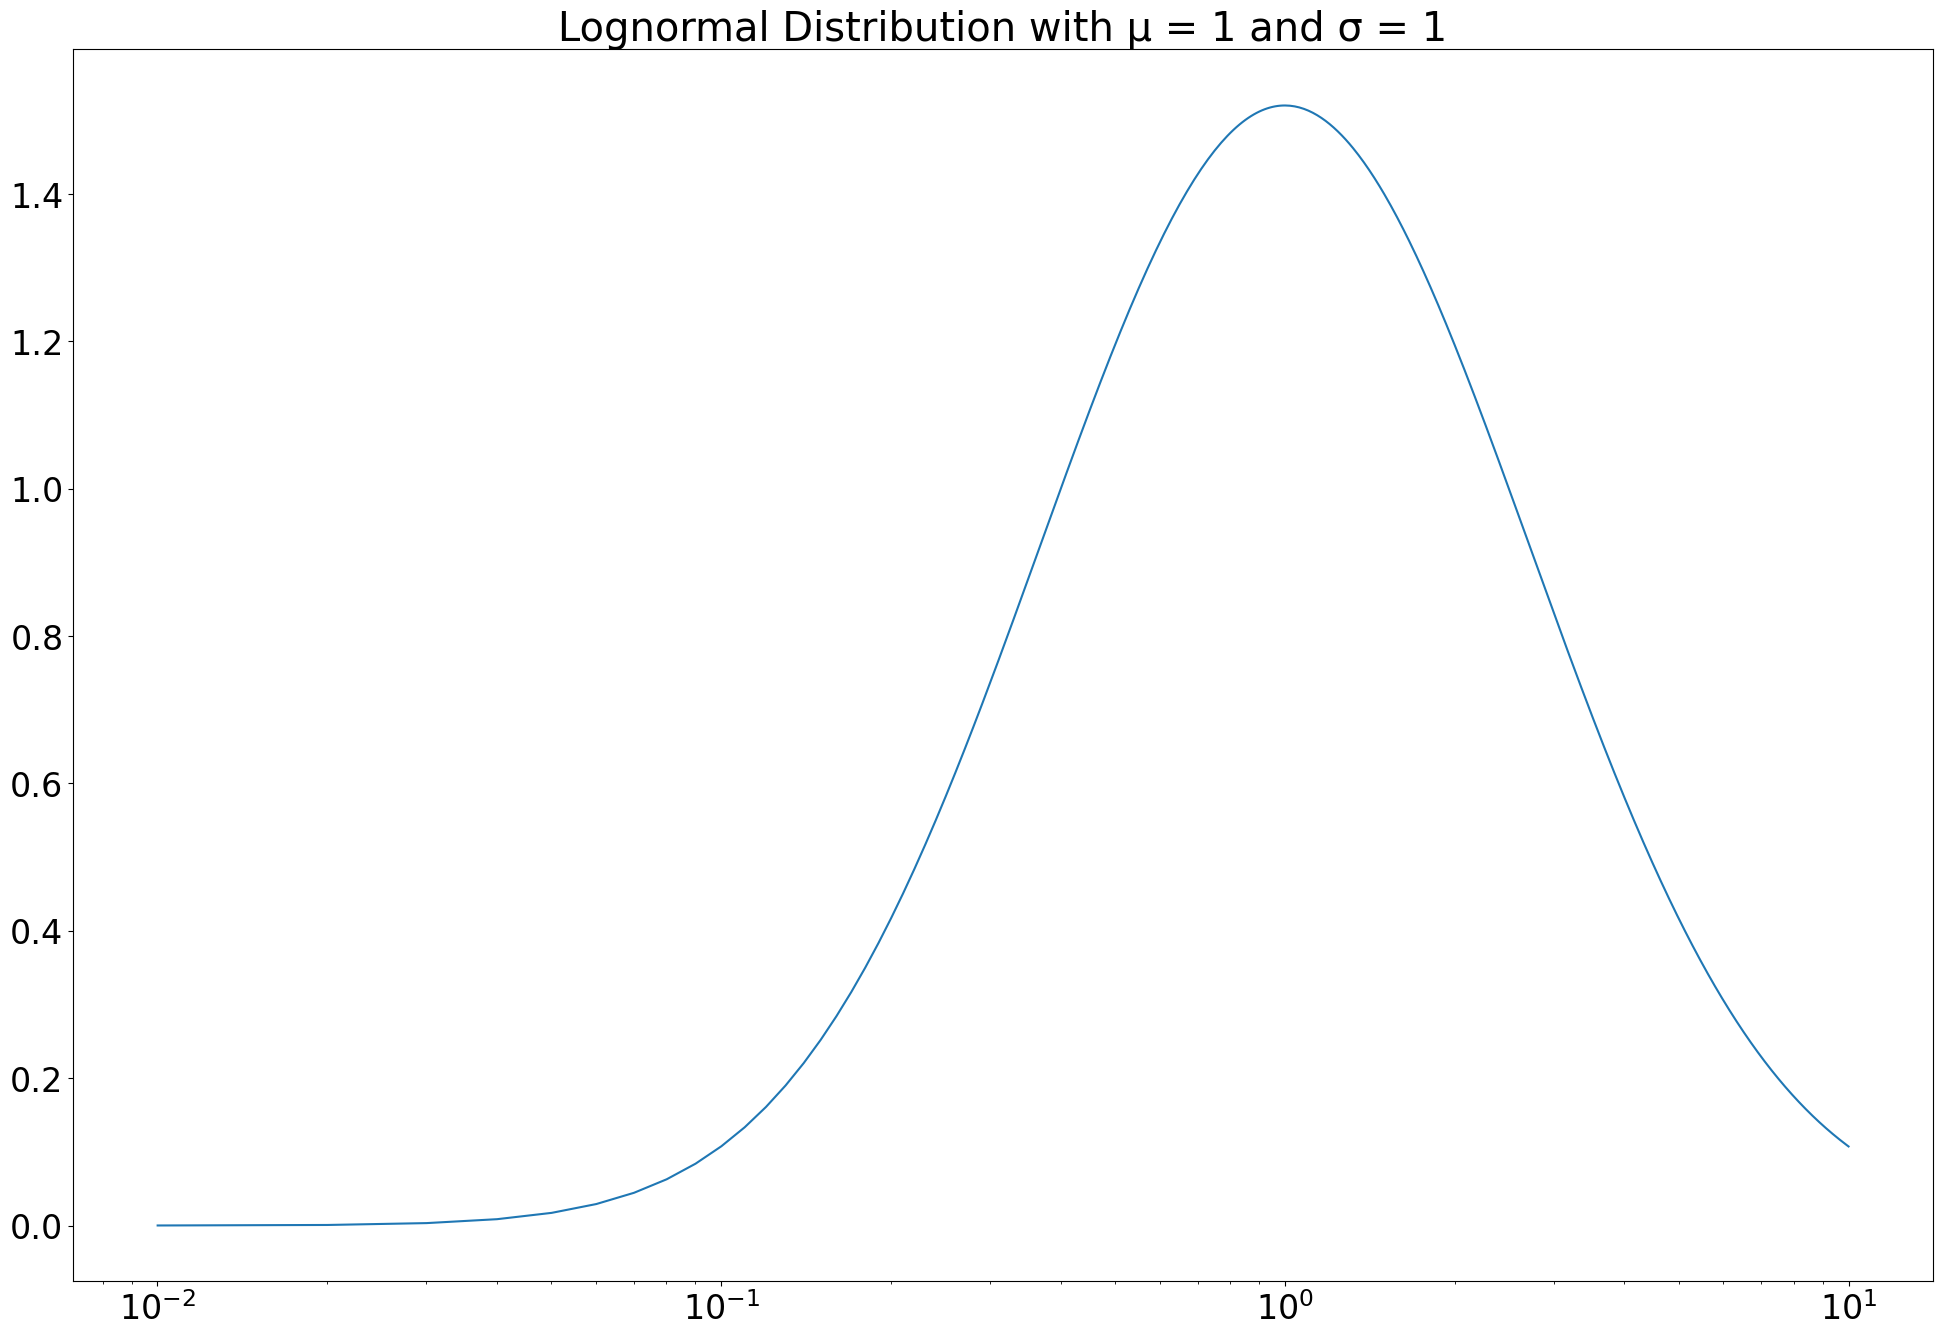

In [6]:
fig, ax = plt.subplots(figsize = (24, 16))
ax.plot(x, log_norm)
plt.xscale('log')
ax.set_title('Lognormal Distribution with μ = ' + str(mean) + ' and σ = ' + str(sd))

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 

In [7]:
def binomial(x, n, p):
    # Calculating the probability of failure
    q = 1 - p
    # Using the binomial distribution formula to calculate the probability of x successes in n trials with probability of success p
    return float(math.factorial(n)) / (
                math.factorial(int(x)) * math.factorial(n - int(x))) * p ** x * q ** (n - int(x))


    #return float(math.factorial(n)) / (
        #math.factorial(x) * math.factorial(n-x)) * p ** x * q ** (n - x)
binomial(x = 50, n = 100, p =.5)

0.07958923738717875

In [8]:
# probability of generating a total betwenn X0 and X1 for a given p, n
def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range(X0, X1 + 1):
        P += binomial(x = x, n = n, p = p) 
    return P

p, n = .5, 100
X0 = 40
X1 = 60

probability_of_outcome(X0, X1, p, n)

0.9647997997822952

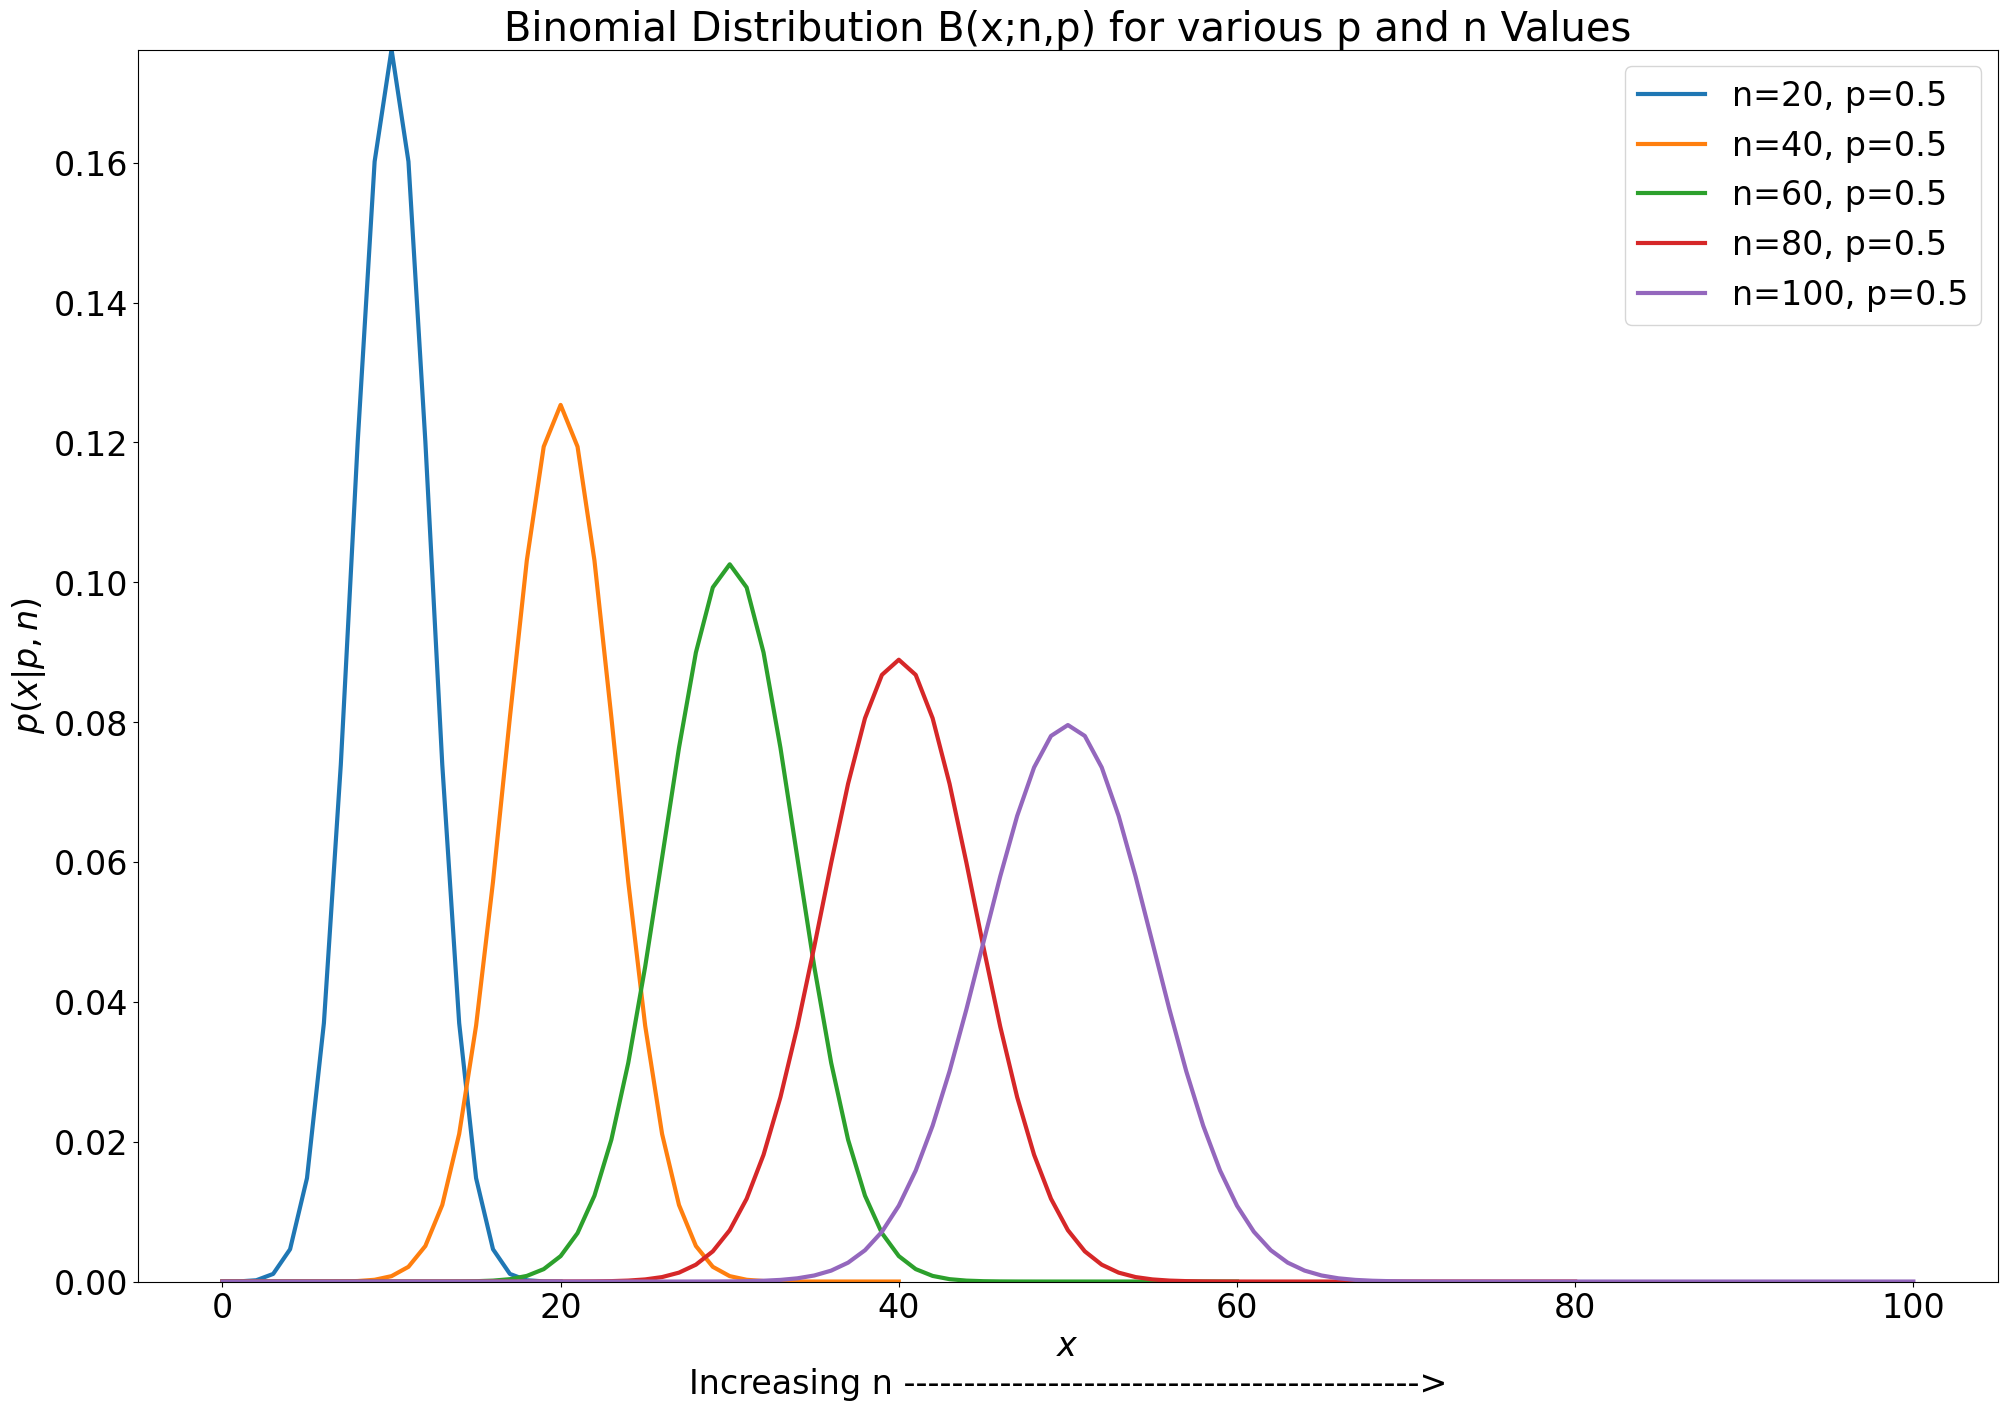

In [9]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize = (24, 16))
cmap = cm.get_cmap('Blues')
ymax = binomial(20 * p, 20, p)
for n in range(20, 101, 20):
#     x = int(n * p)
    # make a list of probability of every possible outcome
    #  from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot_line that is composed of all probabilities
    plt.plot(binom_vars, 
             linewidth = 3,
            label=f'n={n}, p={p}')
# change max y axis value from 1 to the something closer to the maximum
#  probabity across all range from 0 to n for which we constructed 
#  distributions
ax.set_ylim(ymin = 0, ymax = ymax)

plt.xlabel('$x$\nIncreasing n ------------------------------------------->',
           fontsize=24)
plt.ylabel('$p(x | p, n)$', fontsize=24)
plt.title('Binomial Distribution B(x;n,p) for various p and n Values')
plt.legend()

### Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

1. identitically distributed 
2. independent

To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

We will first show that unstransformed stock data is not identically distributed. But first, we need to download the data. We will use *pandas_datareader* to access yahoo finance. If you have not used this module before, install it using the command:

> *pip install pandas-datareader*

If you want to install this library from within Jupyter notebook, use:

> *!pip install pandas-datareader*

Note: A recent update to yahoo finance has broken the ability of pandas-datareader download yahoo finance data. A patch has been added to the github. If the above installation does not work, use:

>  *pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316*


In [10]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd

In [11]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ['MSFT', 'AAPL', 'PG', 'TSLA']
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
data_dict['MSFT']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413073   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.916992   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140963   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484924   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188957   
...                ...         ...         ...         ...         ...   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   
2023-03-28  275.790009  276.140015  272.049988  275.230011  275.230011   
2023-03-29  278.959991  281.140015  278.410004  280.510010  280.510010   
2023-03-30  284.230011  284.459991  281.480011  284.049988  284.049988   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2023-03-24  28172000  
2023-03-27  26840200  
2023-03-28  21878600  
2023-03-29  25087000  
2023-03-30  25023700  

[2829 rows x 6 columns]

In [13]:
[df['Close'] for df in data_dict.values()]

[Date
 2012-01-03     26.770000
 2012-01-04     27.400000
 2012-01-05     27.680000
 2012-01-06     28.110001
 2012-01-09     27.740000
                  ...    
 2023-03-24    280.570007
 2023-03-27    276.380005
 2023-03-28    275.230011
 2023-03-29    280.510010
 2023-03-30    284.049988
 Name: Close, Length: 2829, dtype: float64,
 Date
 2012-01-03     14.686786
 2012-01-04     14.765714
 2012-01-05     14.929643
 2012-01-06     15.085714
 2012-01-09     15.061786
                  ...    
 2023-03-24    160.250000
 2023-03-27    158.279999
 2023-03-28    157.649994
 2023-03-29    160.770004
 2023-03-30    162.360001
 Name: Close, Length: 2829, dtype: float64,
 Date
 2012-01-03     66.830002
 2012-01-04     66.800003
 2012-01-05     66.519997
 2012-01-06     66.360001
 2012-01-09     66.639999
                  ...    
 2023-03-24    146.720001
 2023-03-27    145.949997
 2023-03-28    146.360001
 2023-03-29    146.809998
 2023-03-30    147.449997
 Name: Close, Length: 2829, dtype: f

In [14]:
close_data = pd.concat([df['Close'] for df in data_dict.values()],
                        keys = data_dict.keys(),
                        axis = 1)

close_data

MSFT        AAPL          PG        TSLA
Date                                                      
2012-01-03   26.770000   14.686786   66.830002    1.872000
2012-01-04   27.400000   14.765714   66.800003    1.847333
2012-01-05   27.680000   14.929643   66.519997    1.808000
2012-01-06   28.110001   15.085714   66.360001    1.794000
2012-01-09   27.740000   15.061786   66.639999    1.816667
...                ...         ...         ...         ...
2023-03-24  280.570007  160.250000  146.720001  190.410004
2023-03-27  276.380005  158.279999  145.949997  191.809998
2023-03-28  275.230011  157.649994  146.360001  189.190002
2023-03-29  280.510010  160.770004  146.809998  193.880005
2023-03-30  284.049988  162.360001  147.449997  195.279999

[2829 rows x 4 columns]

Text(0.5, 1.0, 'Daily Stock Prices')

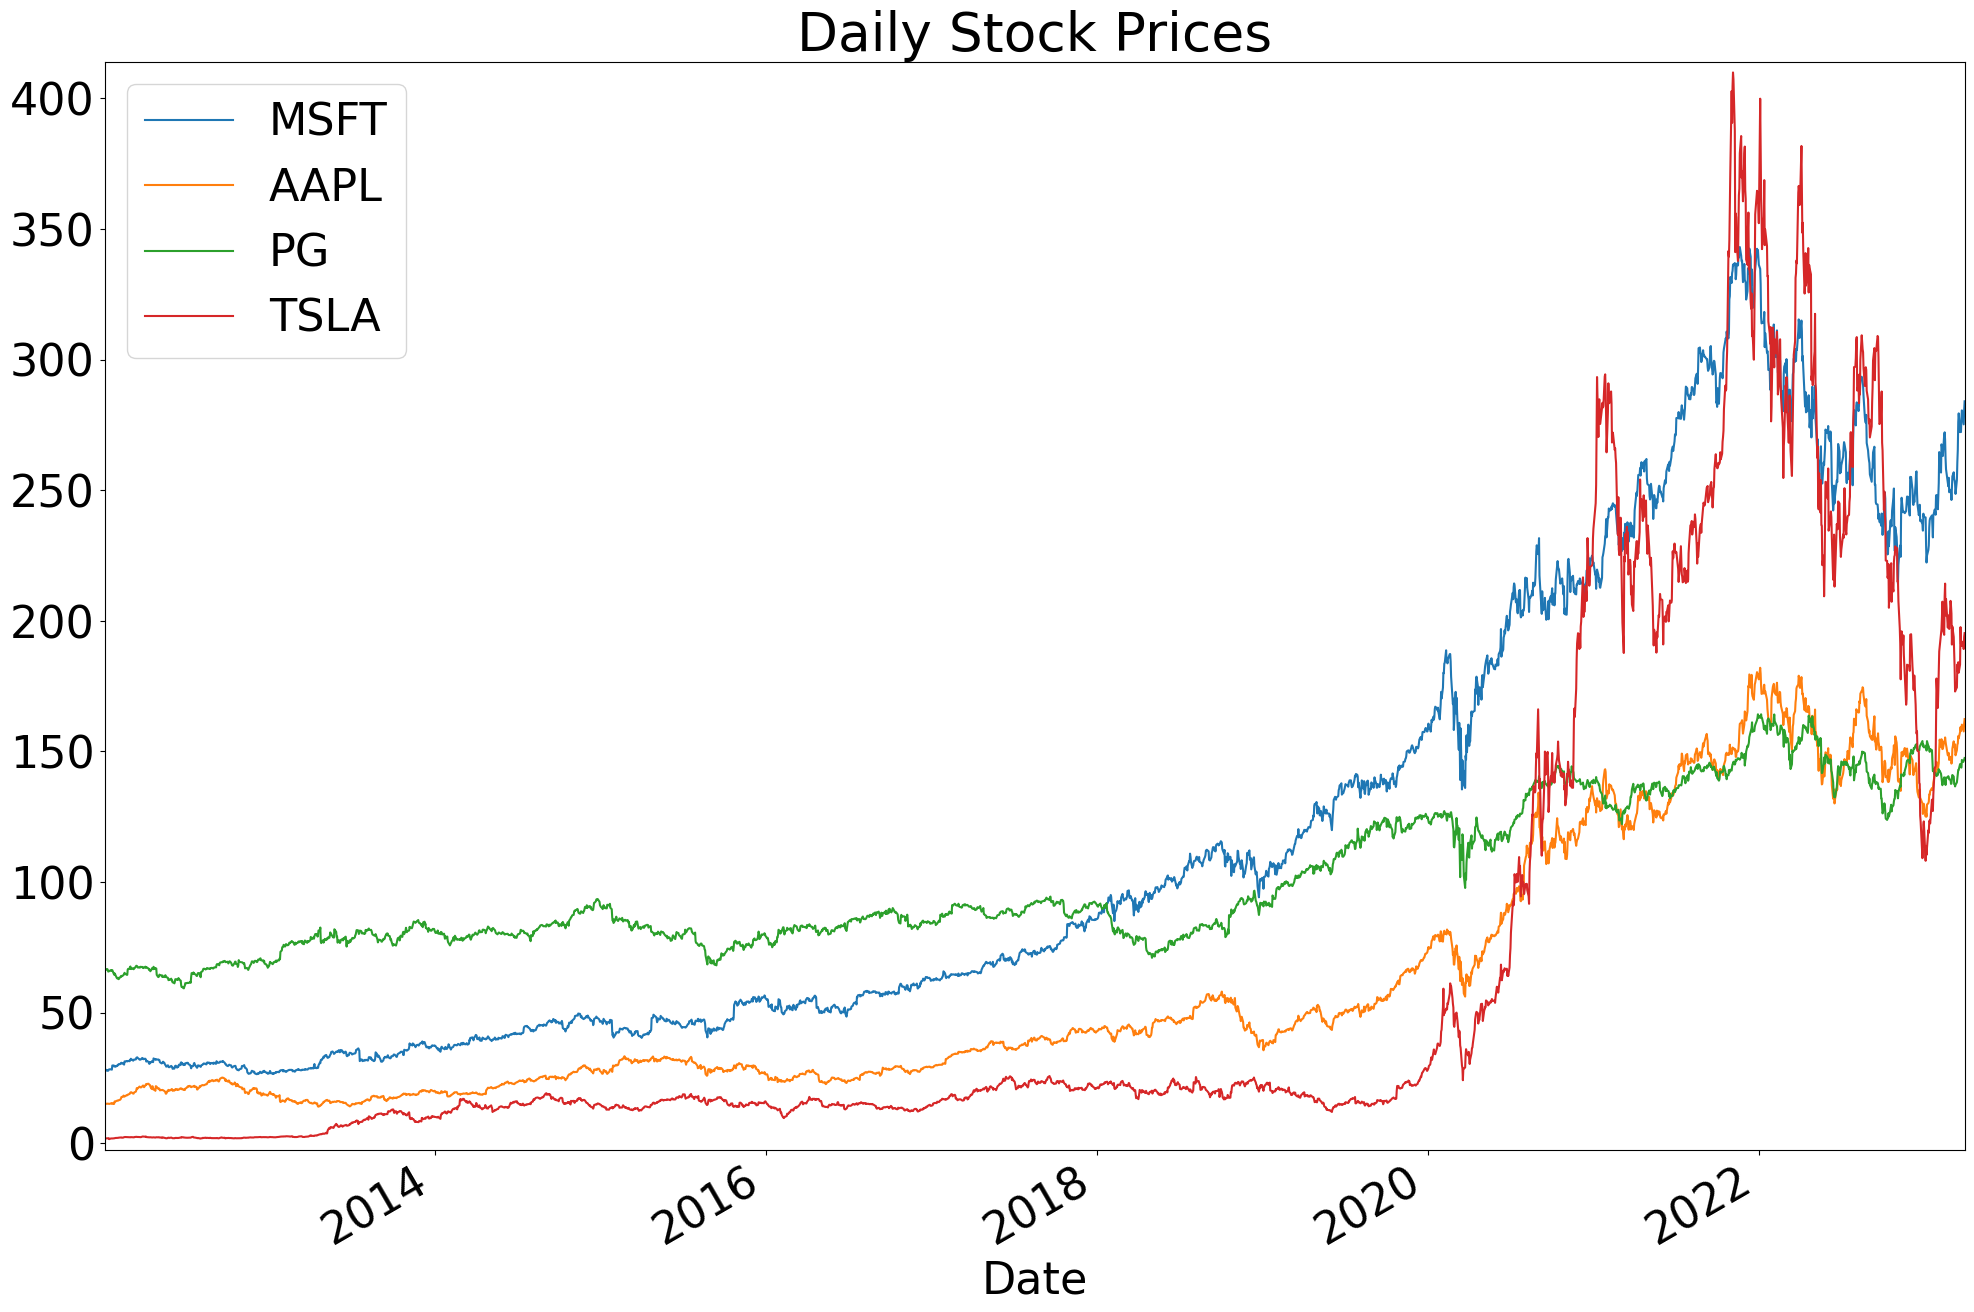

In [15]:
import matplotlib.pyplot as plt

# Setting the x margin to 0 and the y margin to .01 for the plot
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01

# Updating the font size to 32 for the plot
plt.rcParams.update({'font.size' : 32})

# Creating a figure and axes for the plot with a size of 24 by 16 inches
fig, ax = plt.subplots(figsize = (24, 16))

# Plotting the close data on a line graph on the given axes and showing the legend
close_data.plot.line(ax = ax, legend = True)

# Setting the title of the plot to "Daily Stock Prices"
ax.set_title('Daily Stock Prices')

The data appears to be quite volatile. This is because we are viewing data in observed units rather than comparing changes in proportional terms. If we log the axis, we will see that the data actually is much more stable than would be suggested by the above graph. 

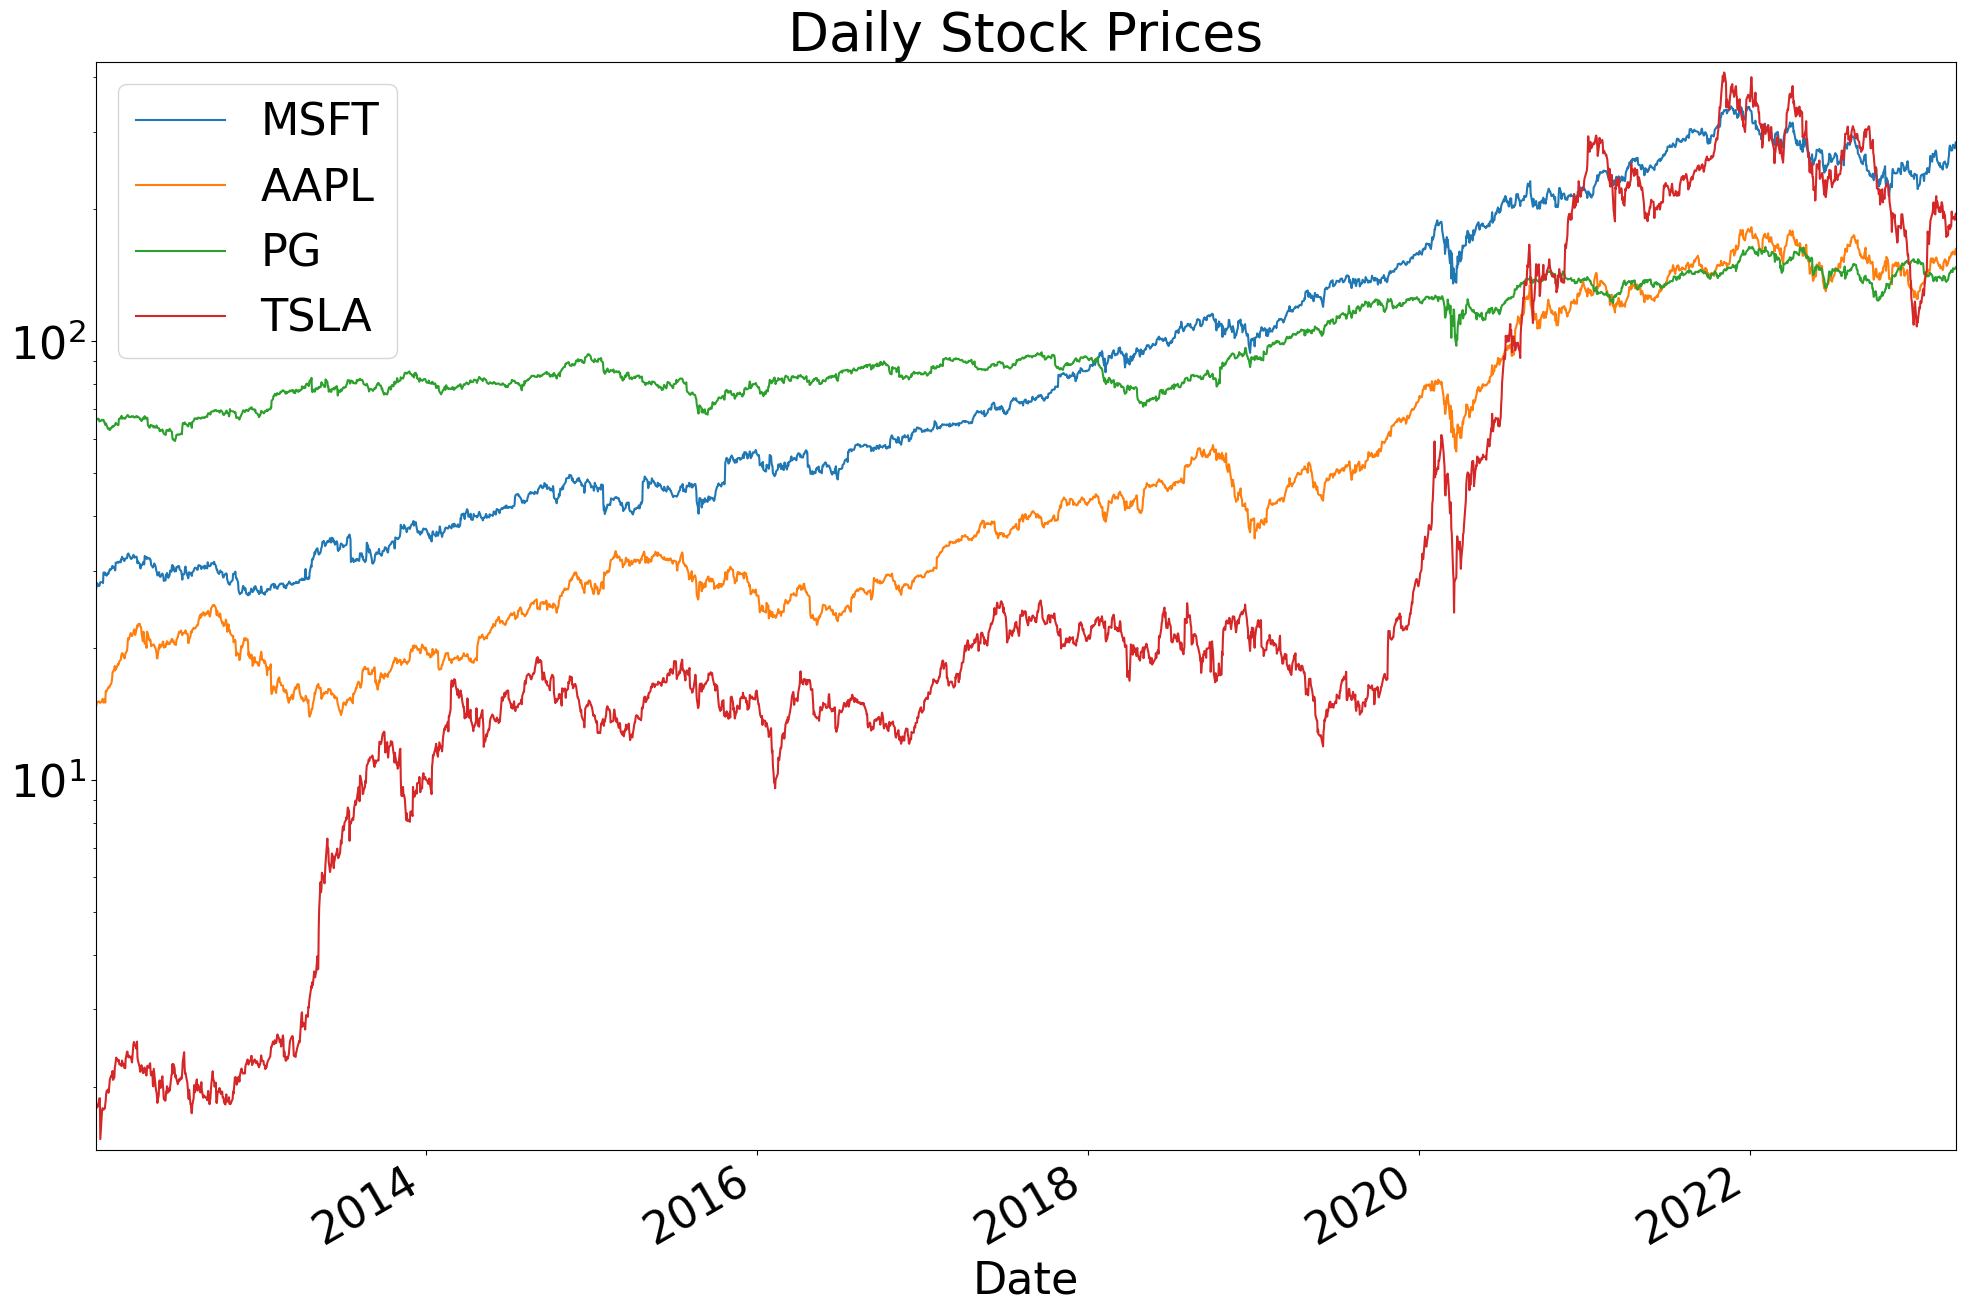

In [16]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title('Daily Stock Prices')
ax.set_yscale('log')

It may not be obvious that this data is not normally distributed. To clarify this, let's create a histogram:

Text(0.5, 1.0, 'AAPL')

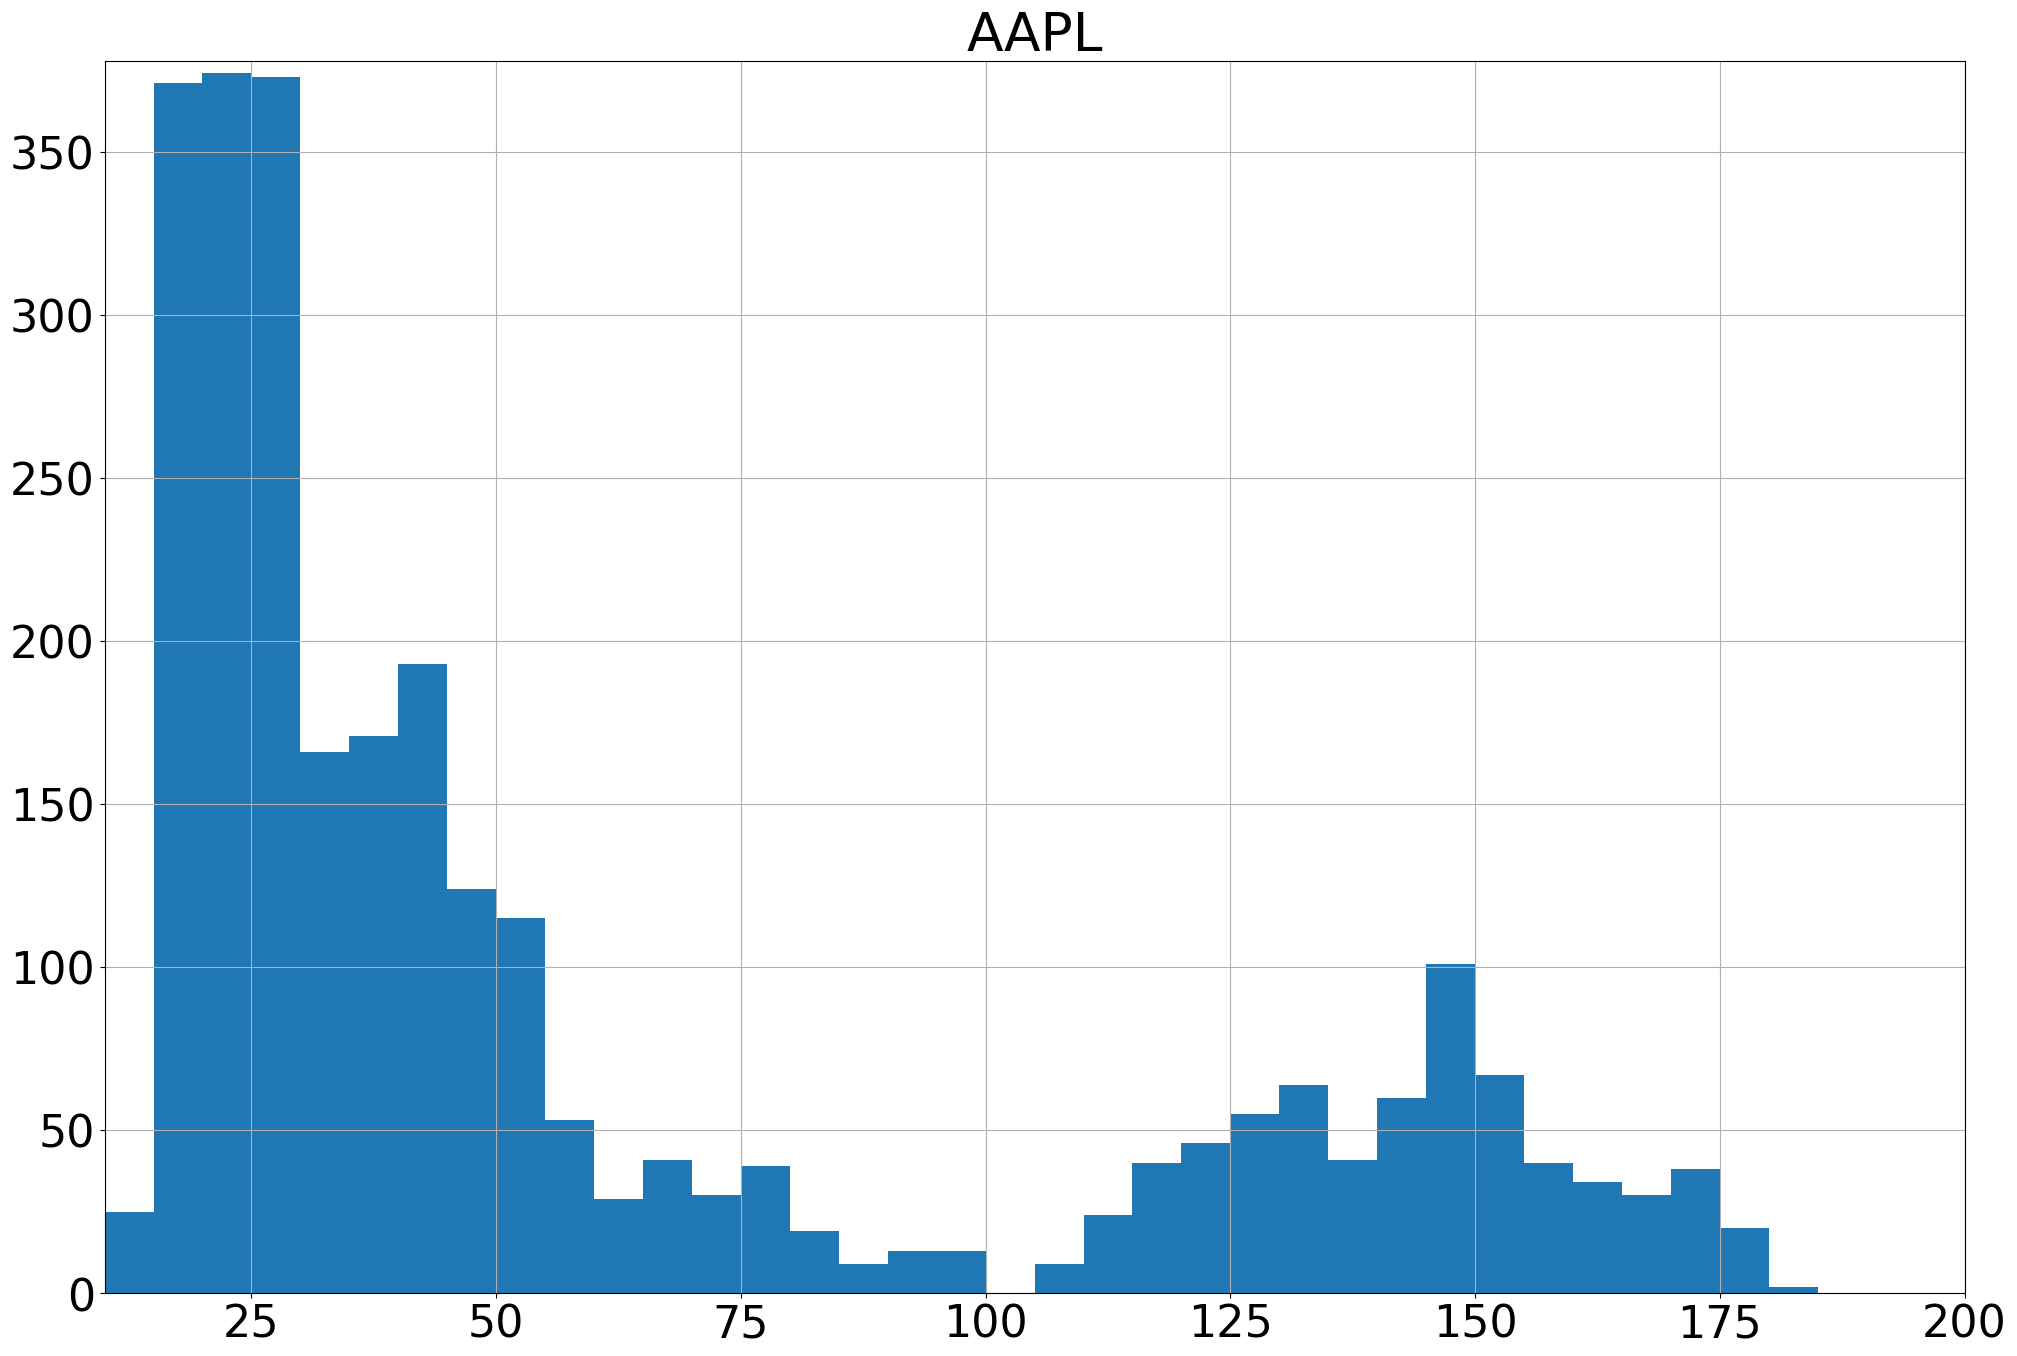

In [17]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = 'AAPL'
close_data['AAPL'].hist(bins = [i for i in range(10, 201, 5)])
#close_data['AAPL'].hist(bins = 50)
ax.set_title(stock)

In [18]:
log_data = np.log(close_data)
log_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03  3.287282  2.686948  4.202152  0.627007
2012-01-04  3.310543  2.692308  4.201703  0.613743
2012-01-05  3.320710  2.703349  4.197503  0.592221
2012-01-06  3.336125  2.713748  4.195094  0.584448
2012-01-09  3.322875  2.712161  4.199305  0.597003
...              ...       ...       ...       ...
2023-03-24  5.636823  5.076735  4.988526  5.249180
2023-03-27  5.621777  5.064366  4.983264  5.256505
2023-03-28  5.617607  5.060377  4.986069  5.242752
2023-03-29  5.636609  5.079975  4.989139  5.267239
2023-03-30  5.649150  5.089816  4.993489  5.274434

[2829 rows x 4 columns]

Text(0.5, 1.0, 'AAPL')

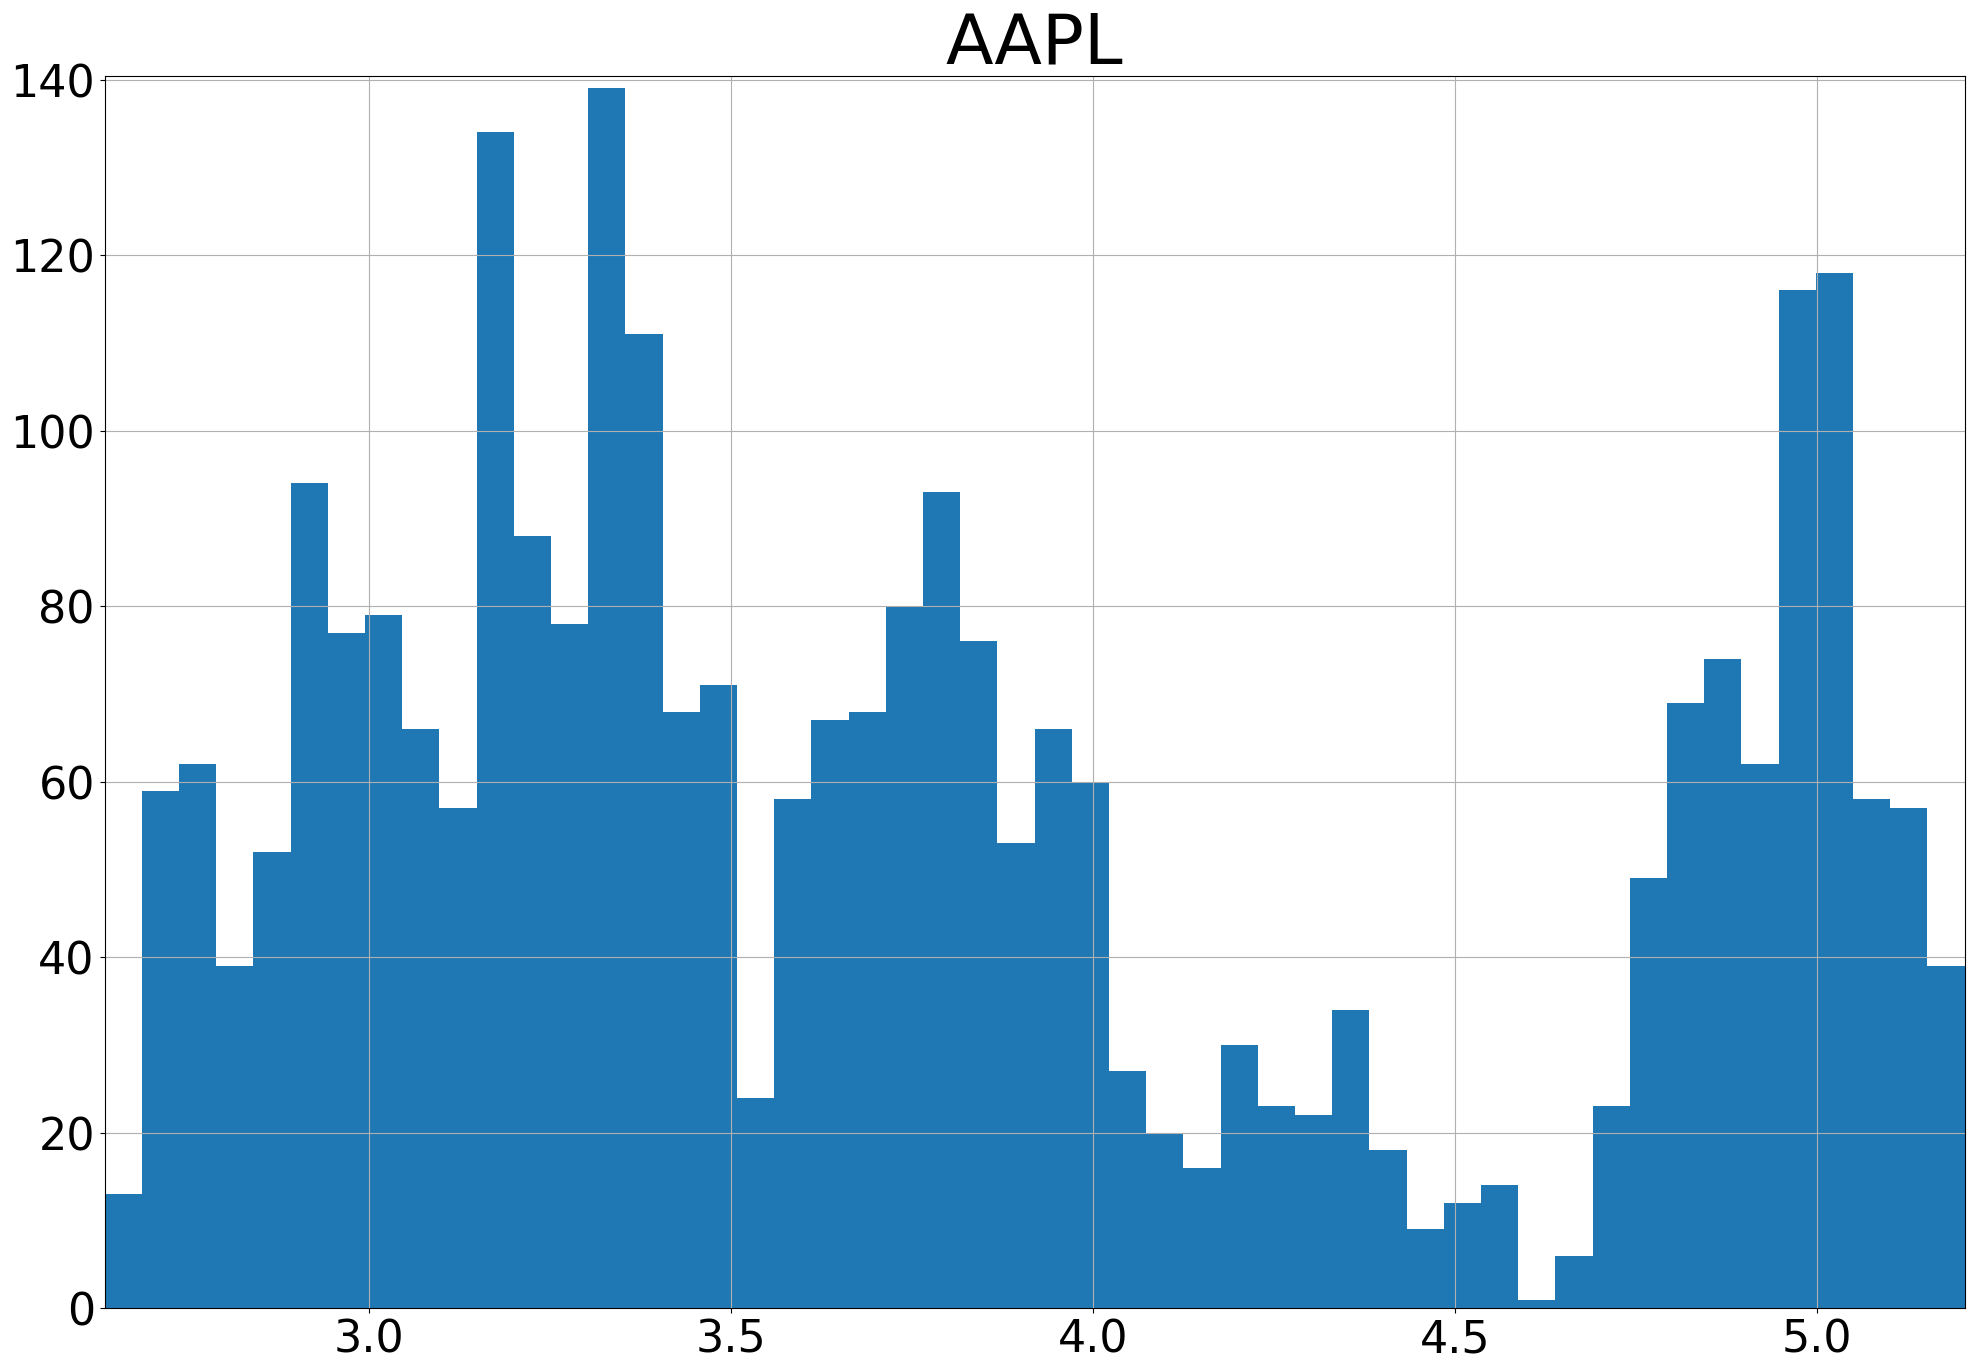

In [19]:
fig, ax = plt.subplots(figsize = (24, 16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize= 50)

Let's replot the data, separating observations by year and indicating the means of each year.

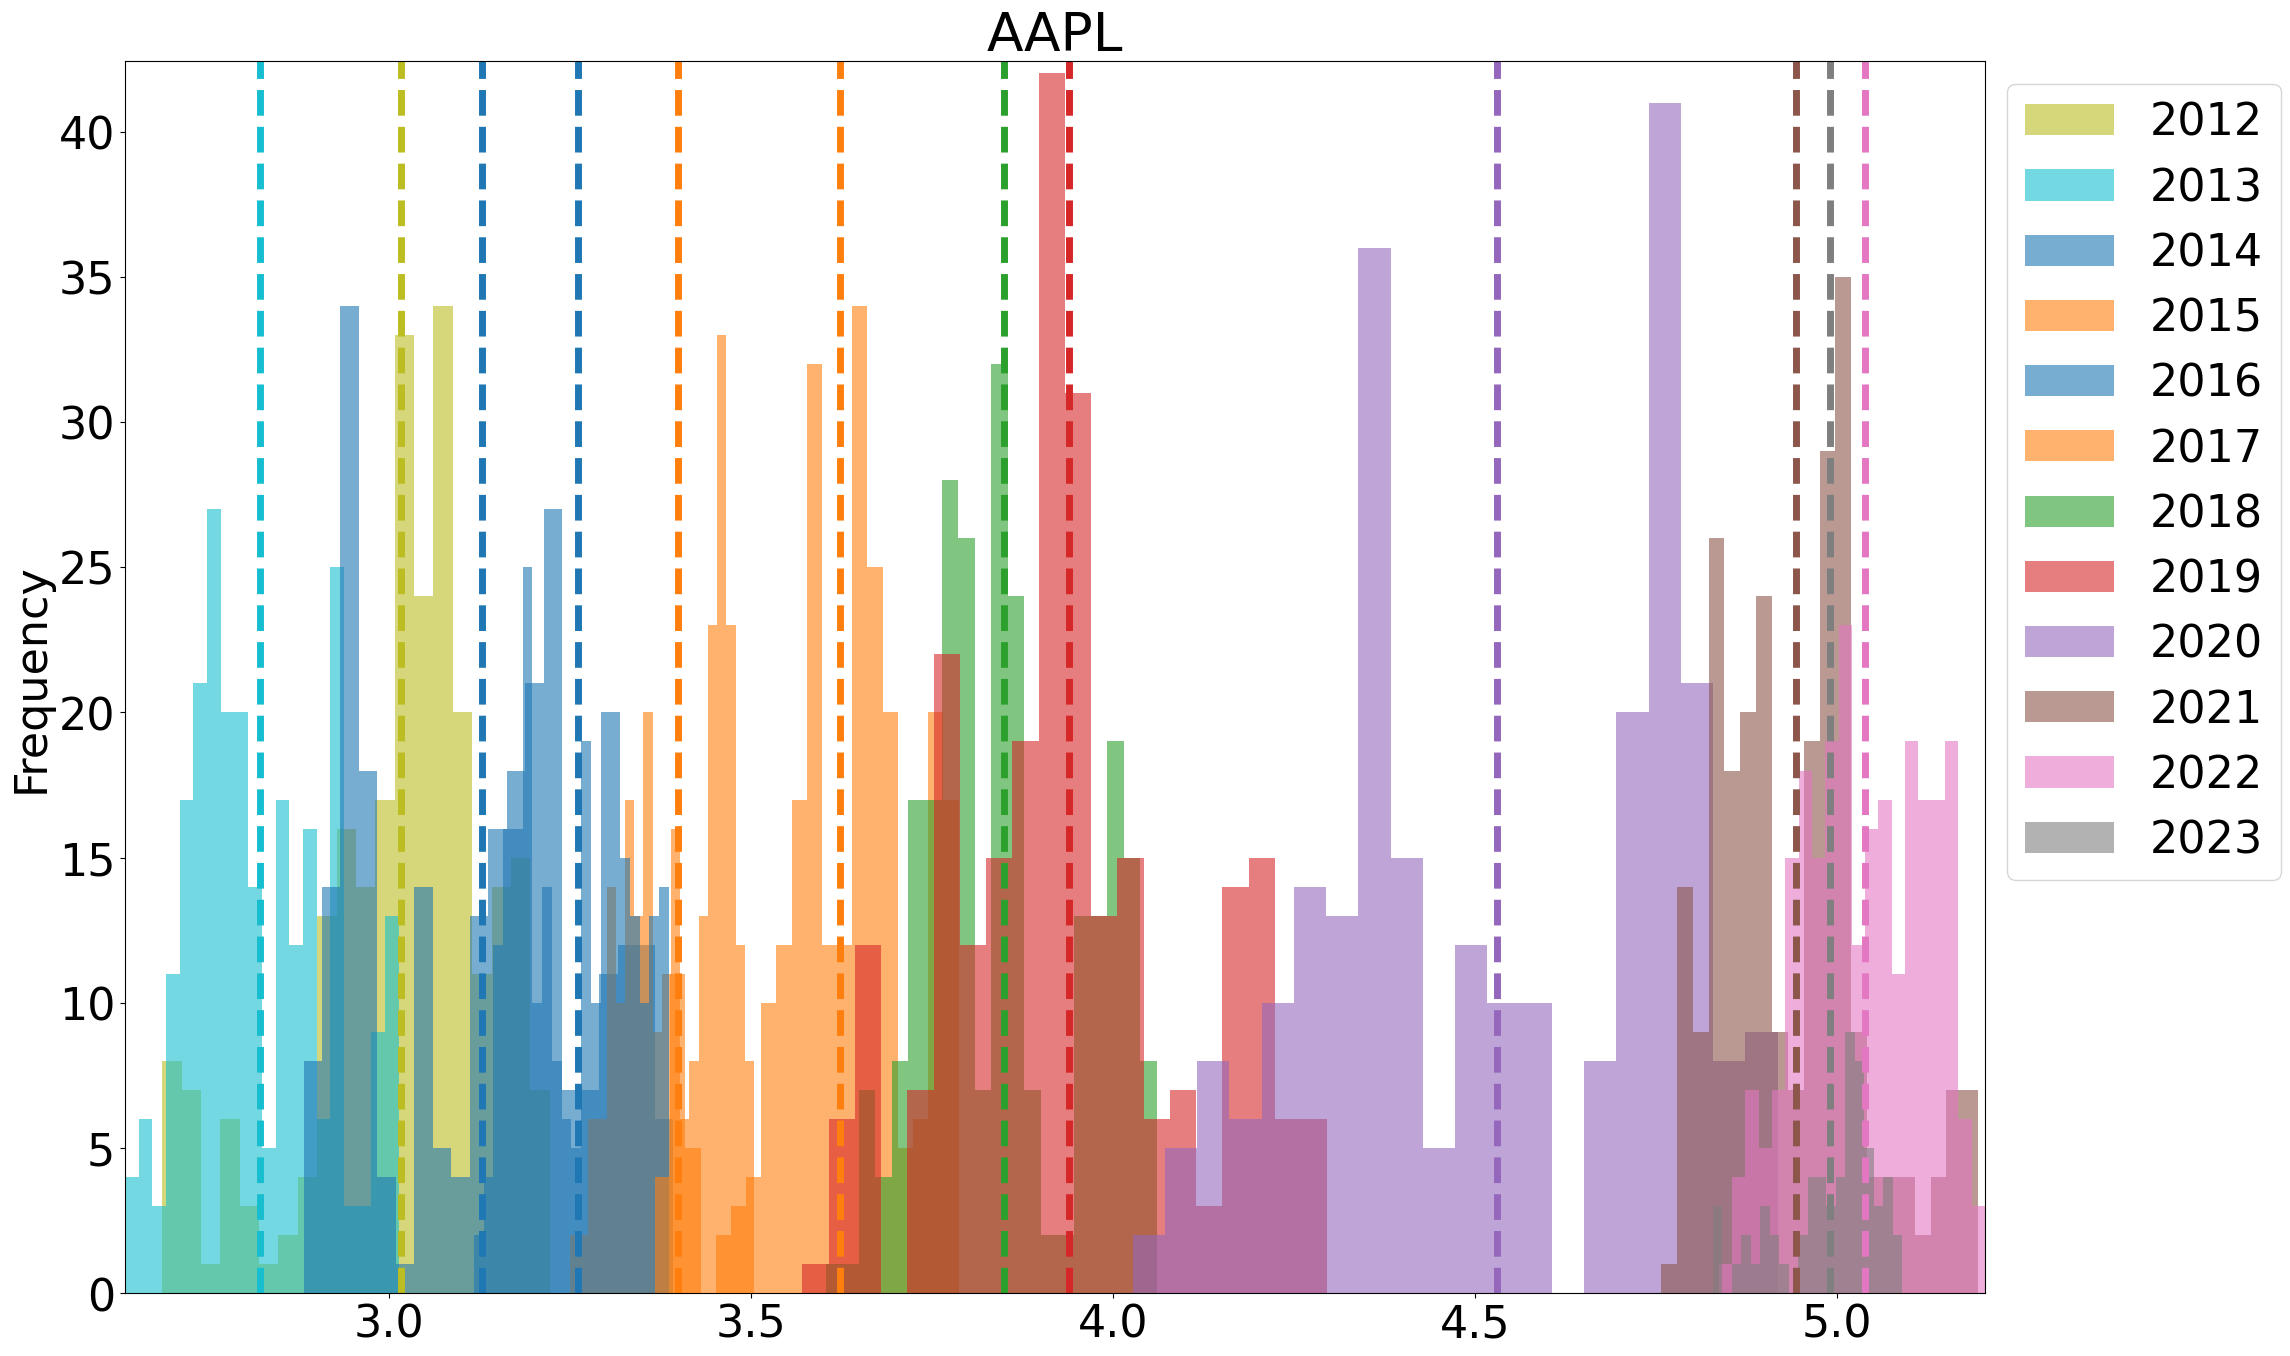

In [20]:
def graph_yearly_distribution(data, stock, figsize = (24, 16), density = False):
    # Extracting the years from the data's index and sorting them
    years = sorted(list(set(data.index.year)))
    # Creating a figure and axes for the plot with the given figure size
    fig, ax = plt.subplots(figsize = figsize)
    # Looping through each year in the sorted list of years
    for year in years:
        # Choosing a color based on the year modulo 12, and converting the year to a string
        color = 'C' + str(year % 12)
        year = str(year)
        # Selecting the data for the given stock for the current year and plotting it as a histogram on the axes, with various customizations
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color,
                            alpha = .6,
                            label = year,
                            bins = 20,
                            density = density,
                            ax = ax)
        # Adding a vertical line at the mean value of the current year's data with the same color as the histogram
        ax.axvline(plot_data.mean(),
                    color = color,
                    linewidth = 5,
                    ls = '--')
        # Setting the title of the plot to the given stock name
        ax.set_title(stock)
        # Adding a legend to the plot at the top-right corner outside of the axes
        ax.legend(bbox_to_anchor = (1, 1))

# Calling the function to create a histogram of the yearly distribution of the given stock's log data, with density set to False
graph_yearly_distribution(log_data, stock, density = False)


In [21]:
price_change_data = log_data.diff()
price_change_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264
2012-01-05  0.010167  0.011041 -0.004201 -0.021522
2012-01-06  0.015415  0.010400 -0.002408 -0.007773
2012-01-09 -0.013250 -0.001587  0.004211  0.012556
...              ...       ...       ...       ...
2023-03-24  0.010426  0.008271  0.020172 -0.009461
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753
2023-03-29  0.019002  0.019597  0.003070  0.024488
2023-03-30  0.012541  0.009841  0.004350  0.007195

[2829 rows x 4 columns]

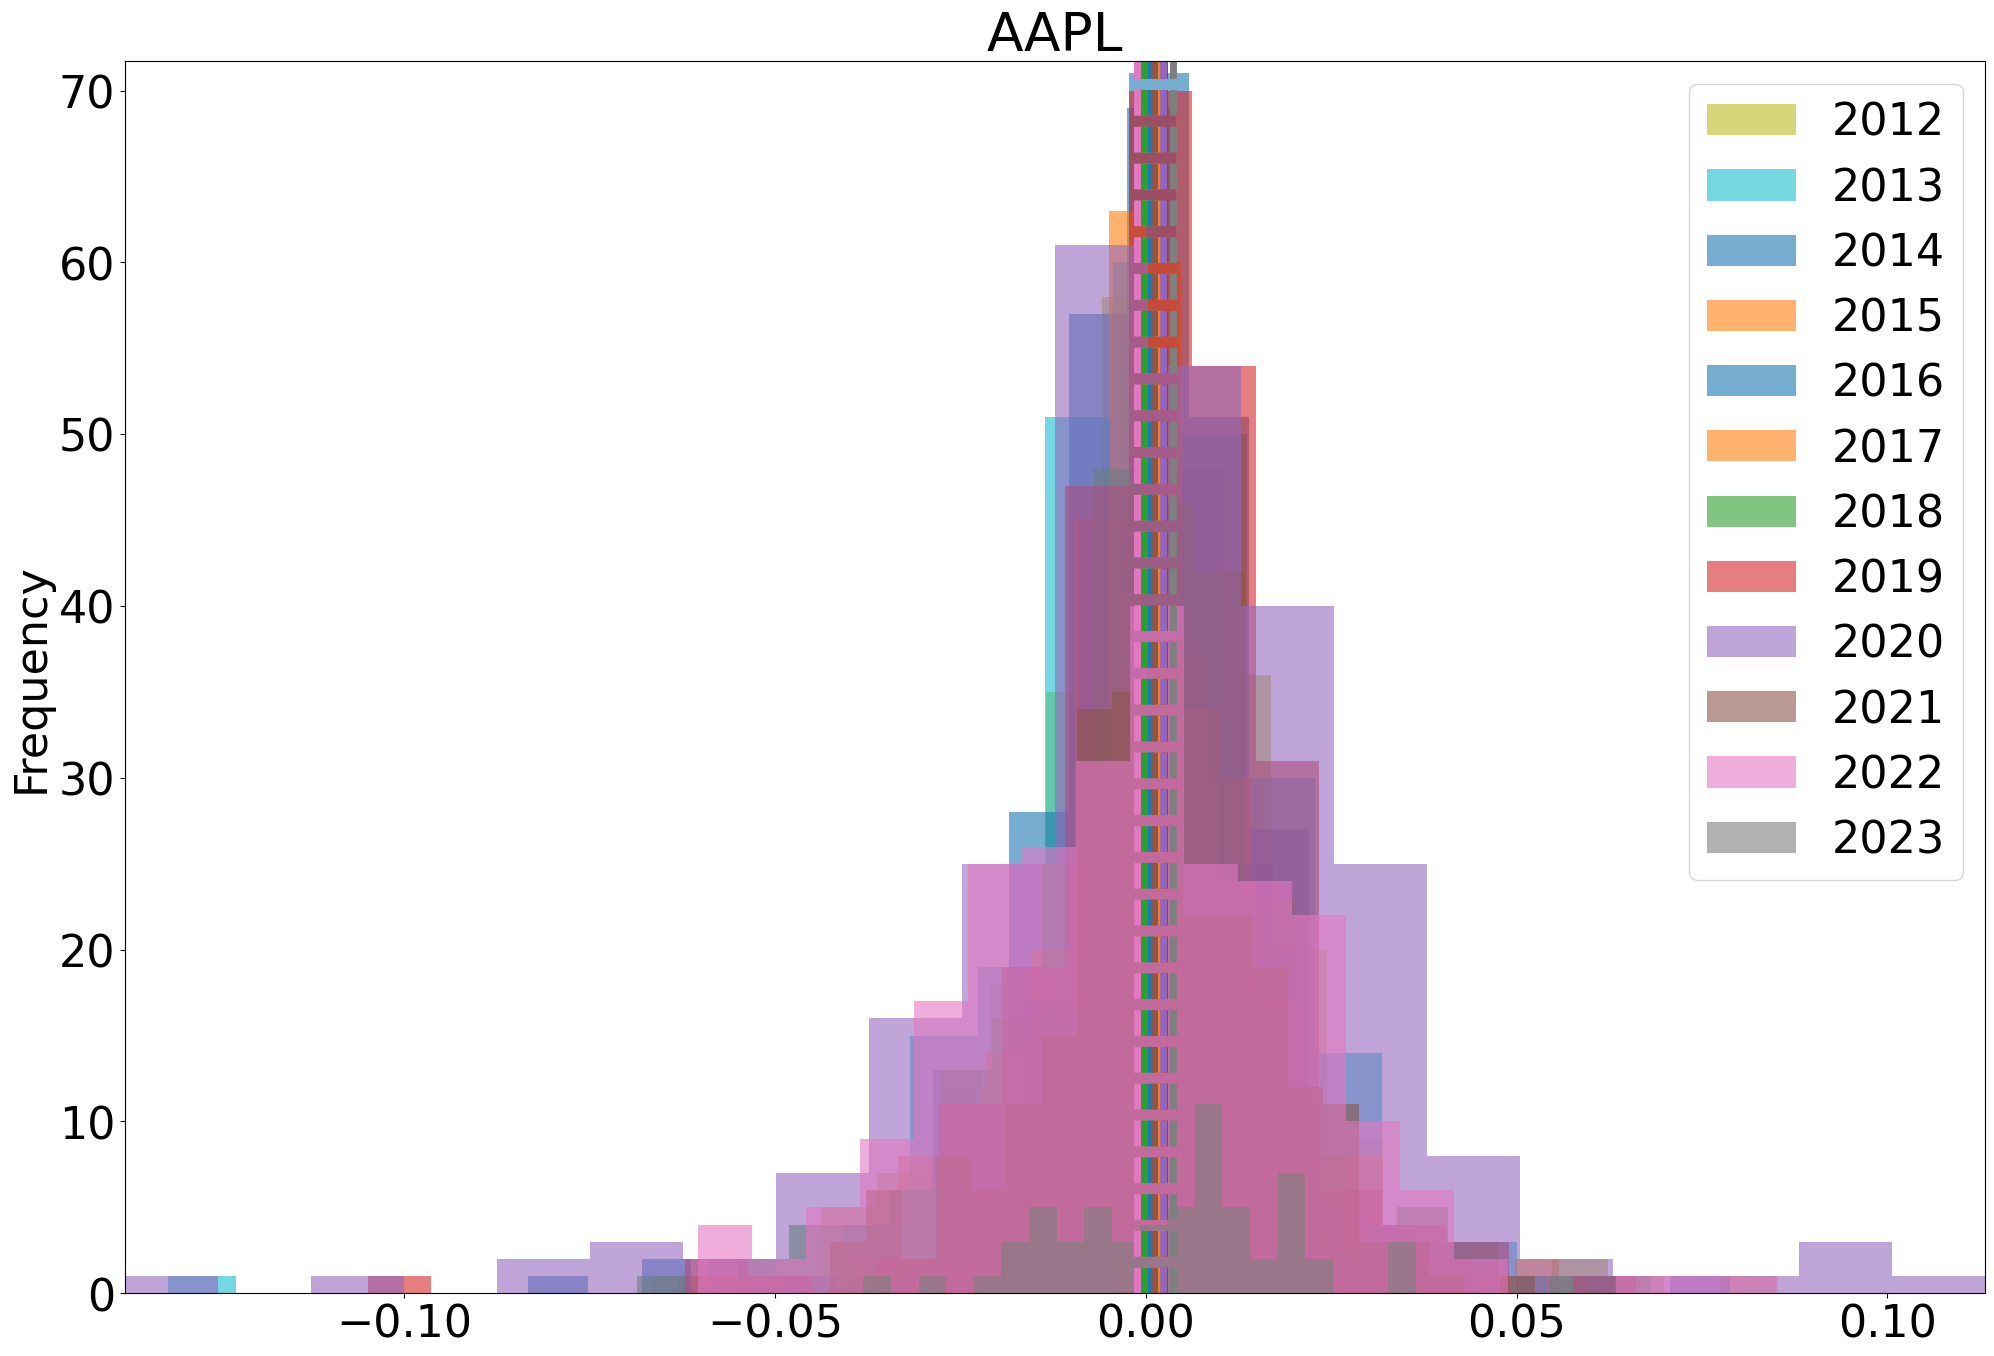

In [22]:
graph_yearly_distribution(price_change_data, stock, density= False)

These distributions drawn from annual data do not appear at all to converge upon a normal distribution, neither do these distributions have consistent mean value. Let's transform the data so that we observe the distribution of the daily rate of change of stock prices. We will take the difference of the log values to approximate the daily rate of change of the stock price. This will make the data more closely conform to the assumption that it is identically distributed. 

If the efficient markets hypothesis is correct in any form, the distribution of daily price changes should be approximately normally distributed. We will see that, over the long-run, the hypothesis is true, but over the short-run, we may find that the tails of distributions are relatively fat, that some stocks violate this assumption, and that daily price changes are often autocorrelated. Further, the absolute value of daily price changes is also autocorrelated.

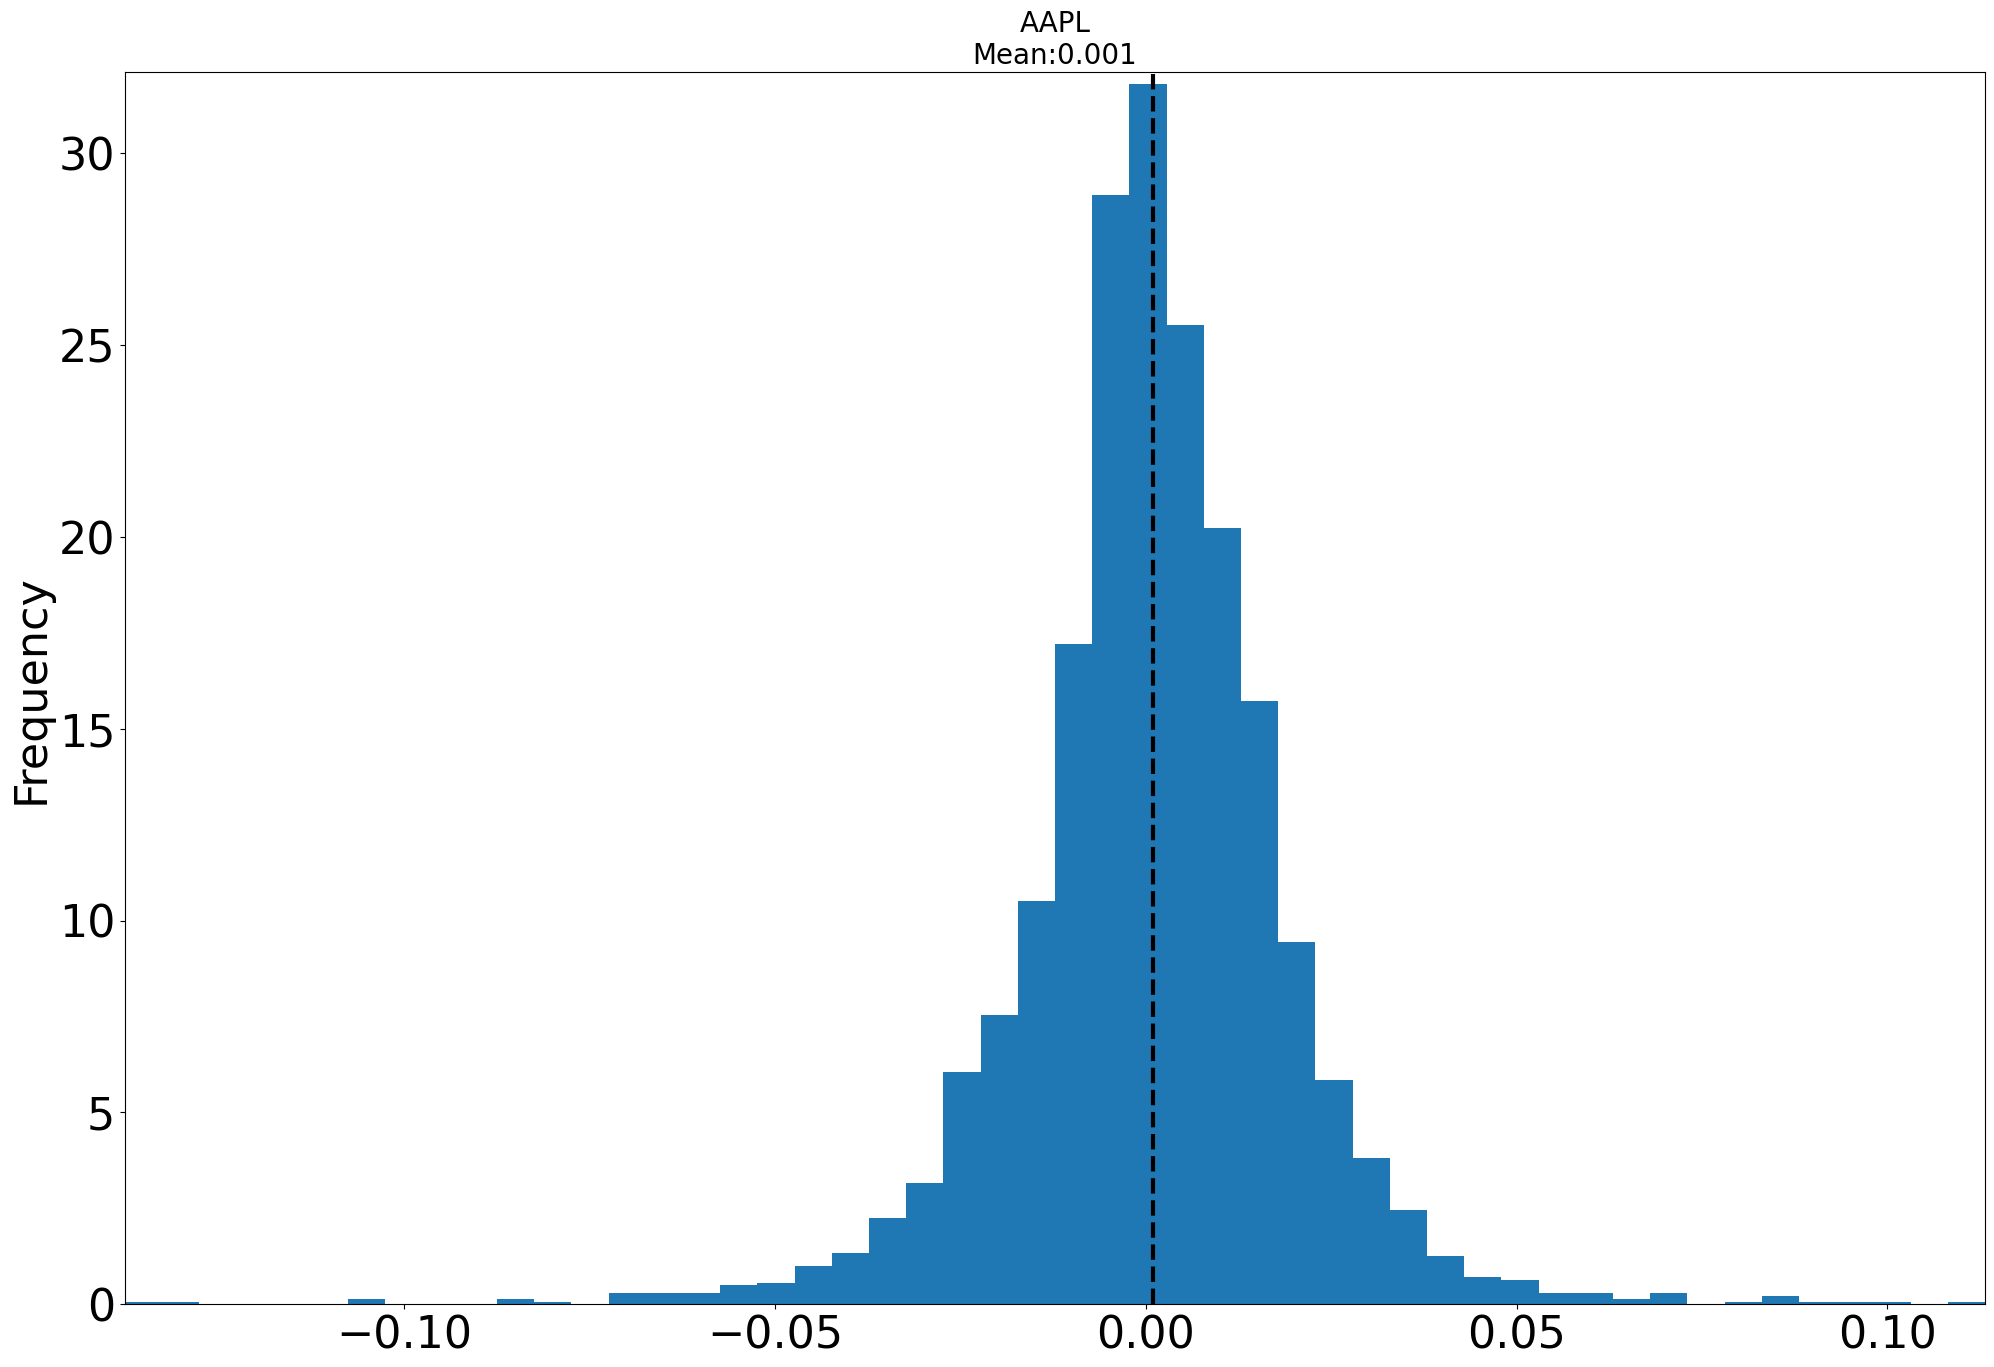

In [23]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = 'AAPL'
#price_change_mean = f'{price_change_data[stock].mean():.3f}'
price_change_mean = round(price_change_data[stock].mean(), 3)
price_change_data[stock].dropna().plot.hist(bins = 50, density = True)
ax.set_title(stock + '\nMean:' + str(price_change_mean), fontsize = 20)
ax.axvline(price_change_mean, color = 'k', linewidth = 3, ls = '--')

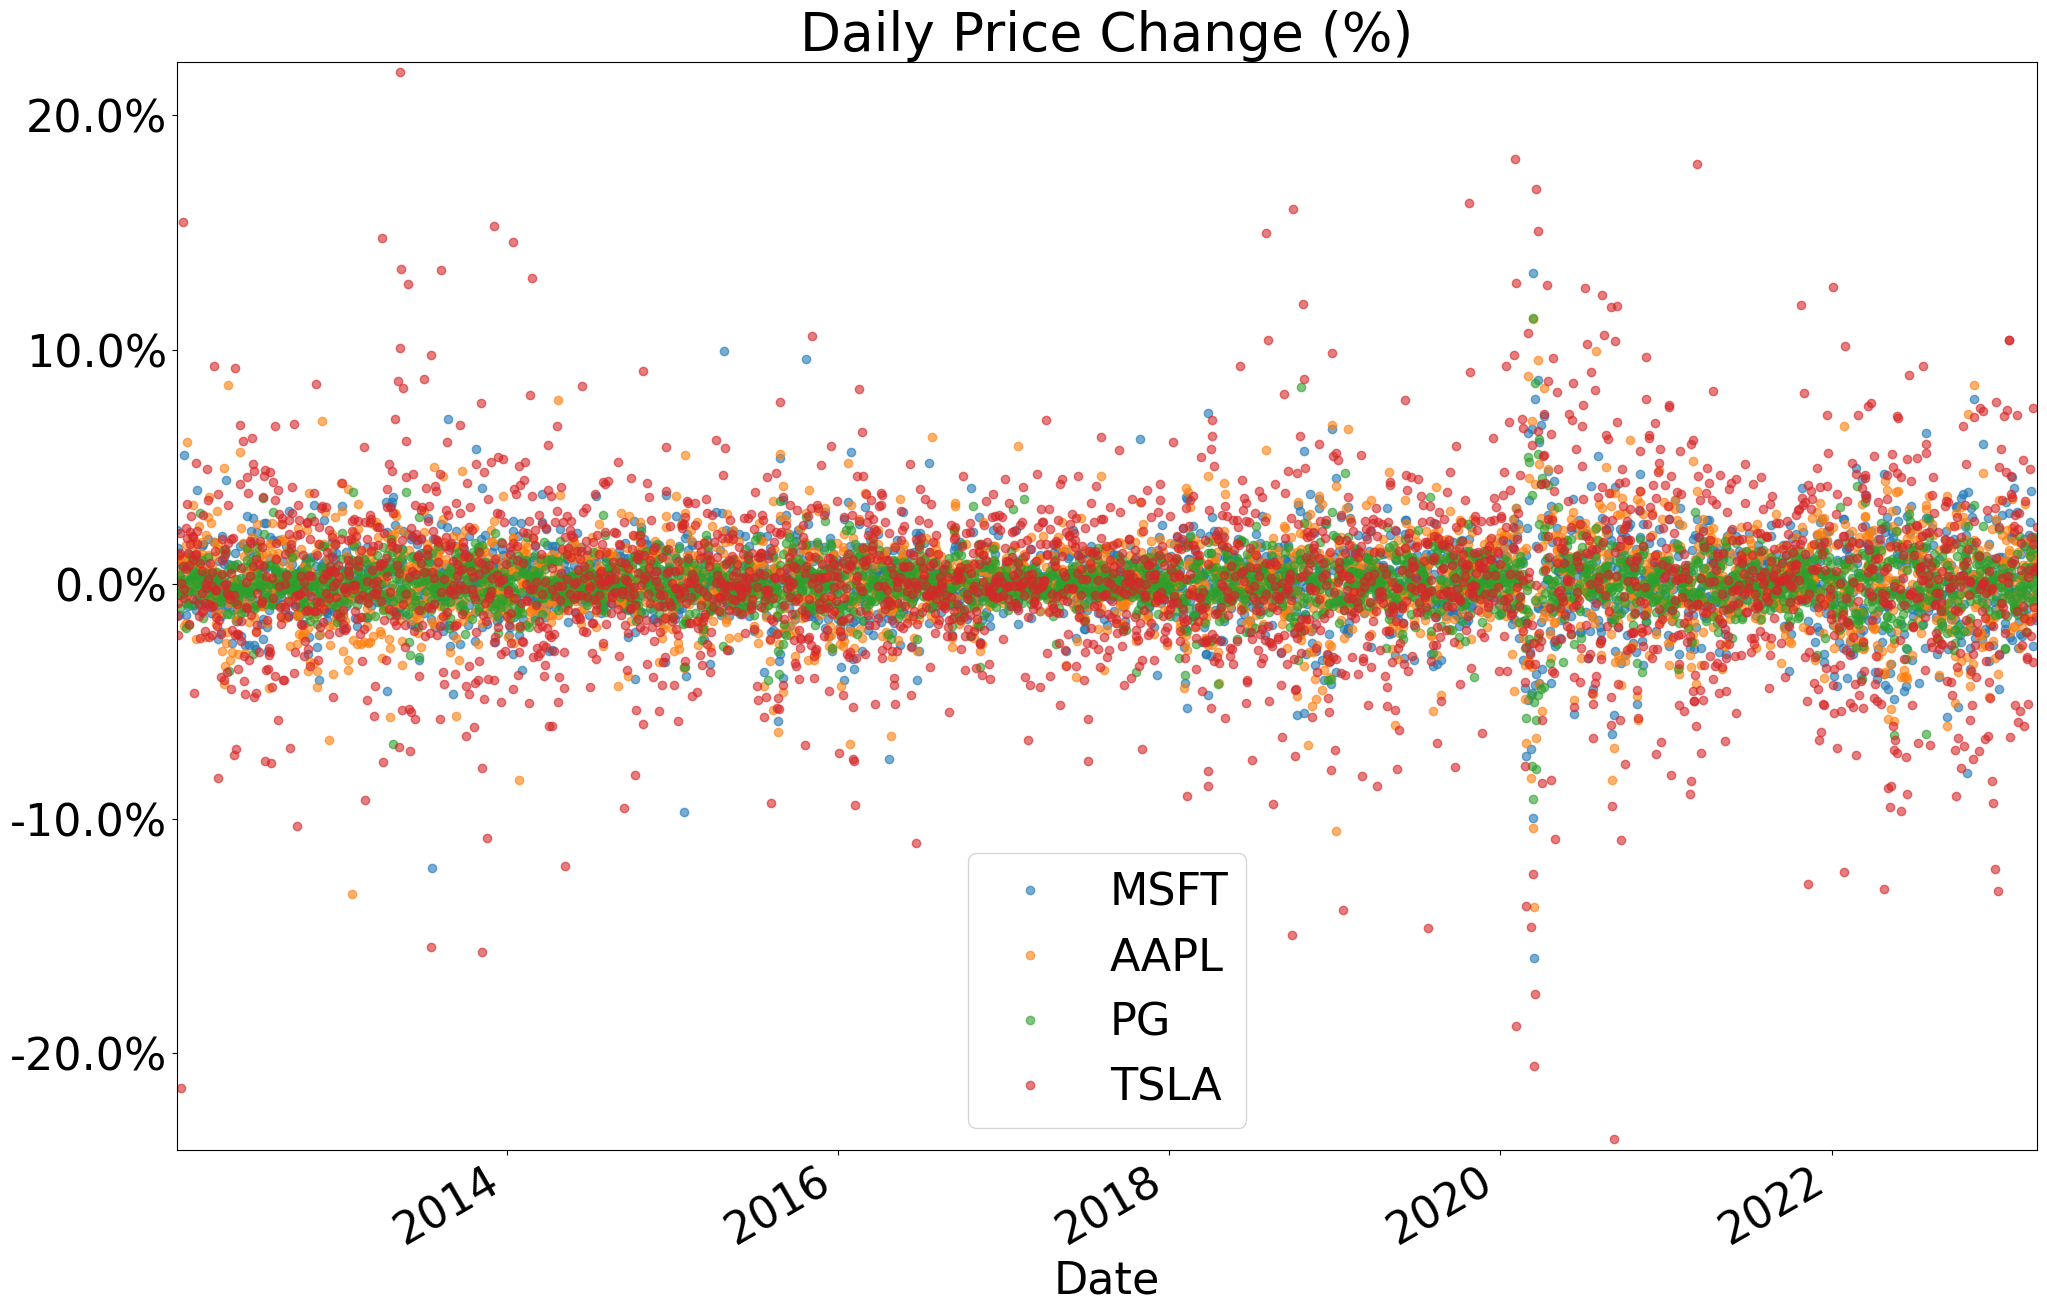

In [24]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data.keys():
    price_change_data[key].plot.line(marker = '.', markersize = 12,
                                    alpha = .6,
                                    ls = '',
                                    ax = ax)
ax.set_title('Daily Price Change (%)')

# access y-axis values
y_vals = ax.get_yticks()

# transform y-axis values to be in the form of percent instead of decimal
ax.set_yticklabels([str(round(y * 100, 1)) + '%' for y in y_vals])
plt.legend()

In [25]:
from stats import *

stats_df = gather_statistics(price_change_data.mul(100),
                            sample = True).round(2)

stats_df

MSFT  AAPL     PG   TSLA
mean      0.08  0.08   0.03   0.16
median    0.06  0.08   0.04   0.14
variance  2.82  3.35   1.28  12.86
S.D.      1.68  1.83   1.13   3.58
skewness -0.22 -0.28  -0.05  -0.05
kurtosis  8.73  5.72  12.03   5.07

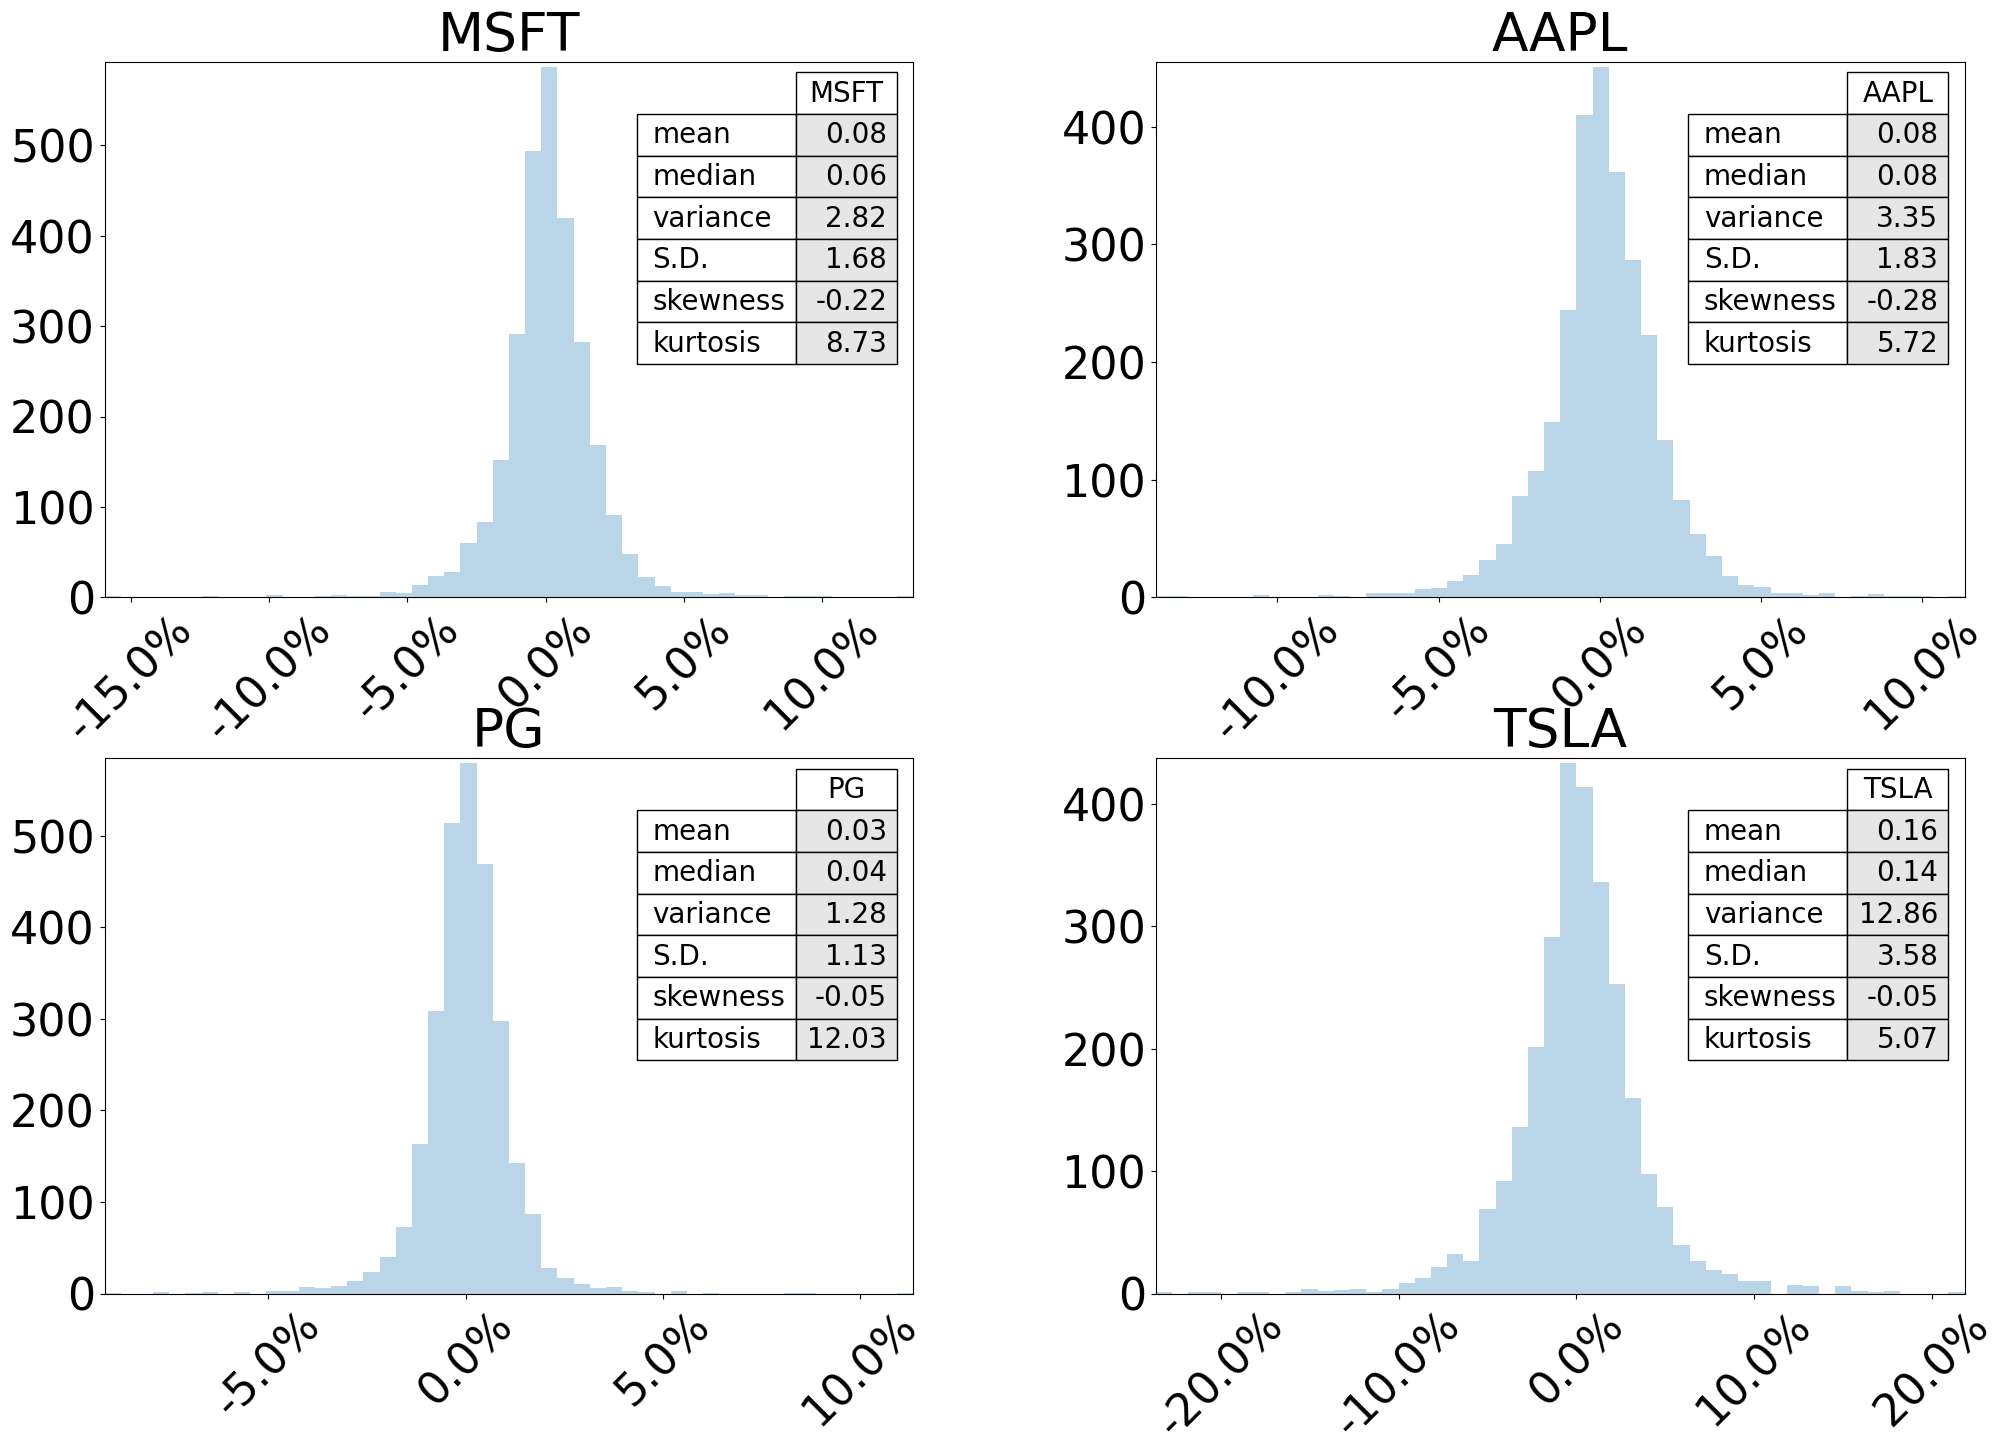

In [26]:
from pandas.plotting import table

# axs is a list of list
# sublists contains relevant axes that comprise the multiplot
fig, axs = plt.subplots(2, 2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                        alpha = .3,
                        label = price_change_data.keys(),
                        ax = axs,
                        density = False)

# adjust xtick labels in a multiplot by using a for loop
# to access sublists
for sublist in axs:
# and access elements in sublist   
    # Looping through each axis in the sublist
    for ax in sublist:
        
        # Getting the x tick values and setting the tick labels to be percentage values with one decimal place
        x_vals = ax.get_xticks()
        ax.set_xticklabels([str(round(x * 100, 1)) + '%' for x in x_vals], rotation = 45)

        # Getting the stock name from the axis title and extracting the corresponding data from the stats_df dataframe
        stock = ax.get_title()
        hist_data = stats_df[stock]

        # Creating a table to display statistical information about the data on the axis
        stats = table(ax, hist_data, colWidths = [.1], cellColours = [[(.9,.9,.9)]] * 6, loc = 'upper right')
        
        # Scaling the size of the table, disabling automatic font sizing, setting the font size, and turning off the axis grid
        stats.scale(1.25, 2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        ax.grid(False)

        #print(stock, price_change_data[stock].mean())

In [27]:
# measure data in terms of standard deviation

price_change_data.div(price_change_data.std())

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.385104  0.292778 -0.039605 -0.369962
2012-01-05  0.605411  0.603115 -0.370532 -0.600269
2012-01-06  0.917916  0.568085 -0.212423 -0.216812
2012-01-09 -0.788983 -0.086715  0.371413  0.350195
...              ...       ...       ...       ...
2023-03-24  0.620820  0.451827  1.779405 -0.263877
2023-03-27 -0.895959 -0.675694 -0.464161  0.204321
2023-03-28 -0.248282 -0.217862  0.247455 -0.383602
2023-03-29  1.131506  1.070528  0.270796  0.682992
2023-03-30  0.746755  0.537590  0.383708  0.200677

[2829 rows x 4 columns]

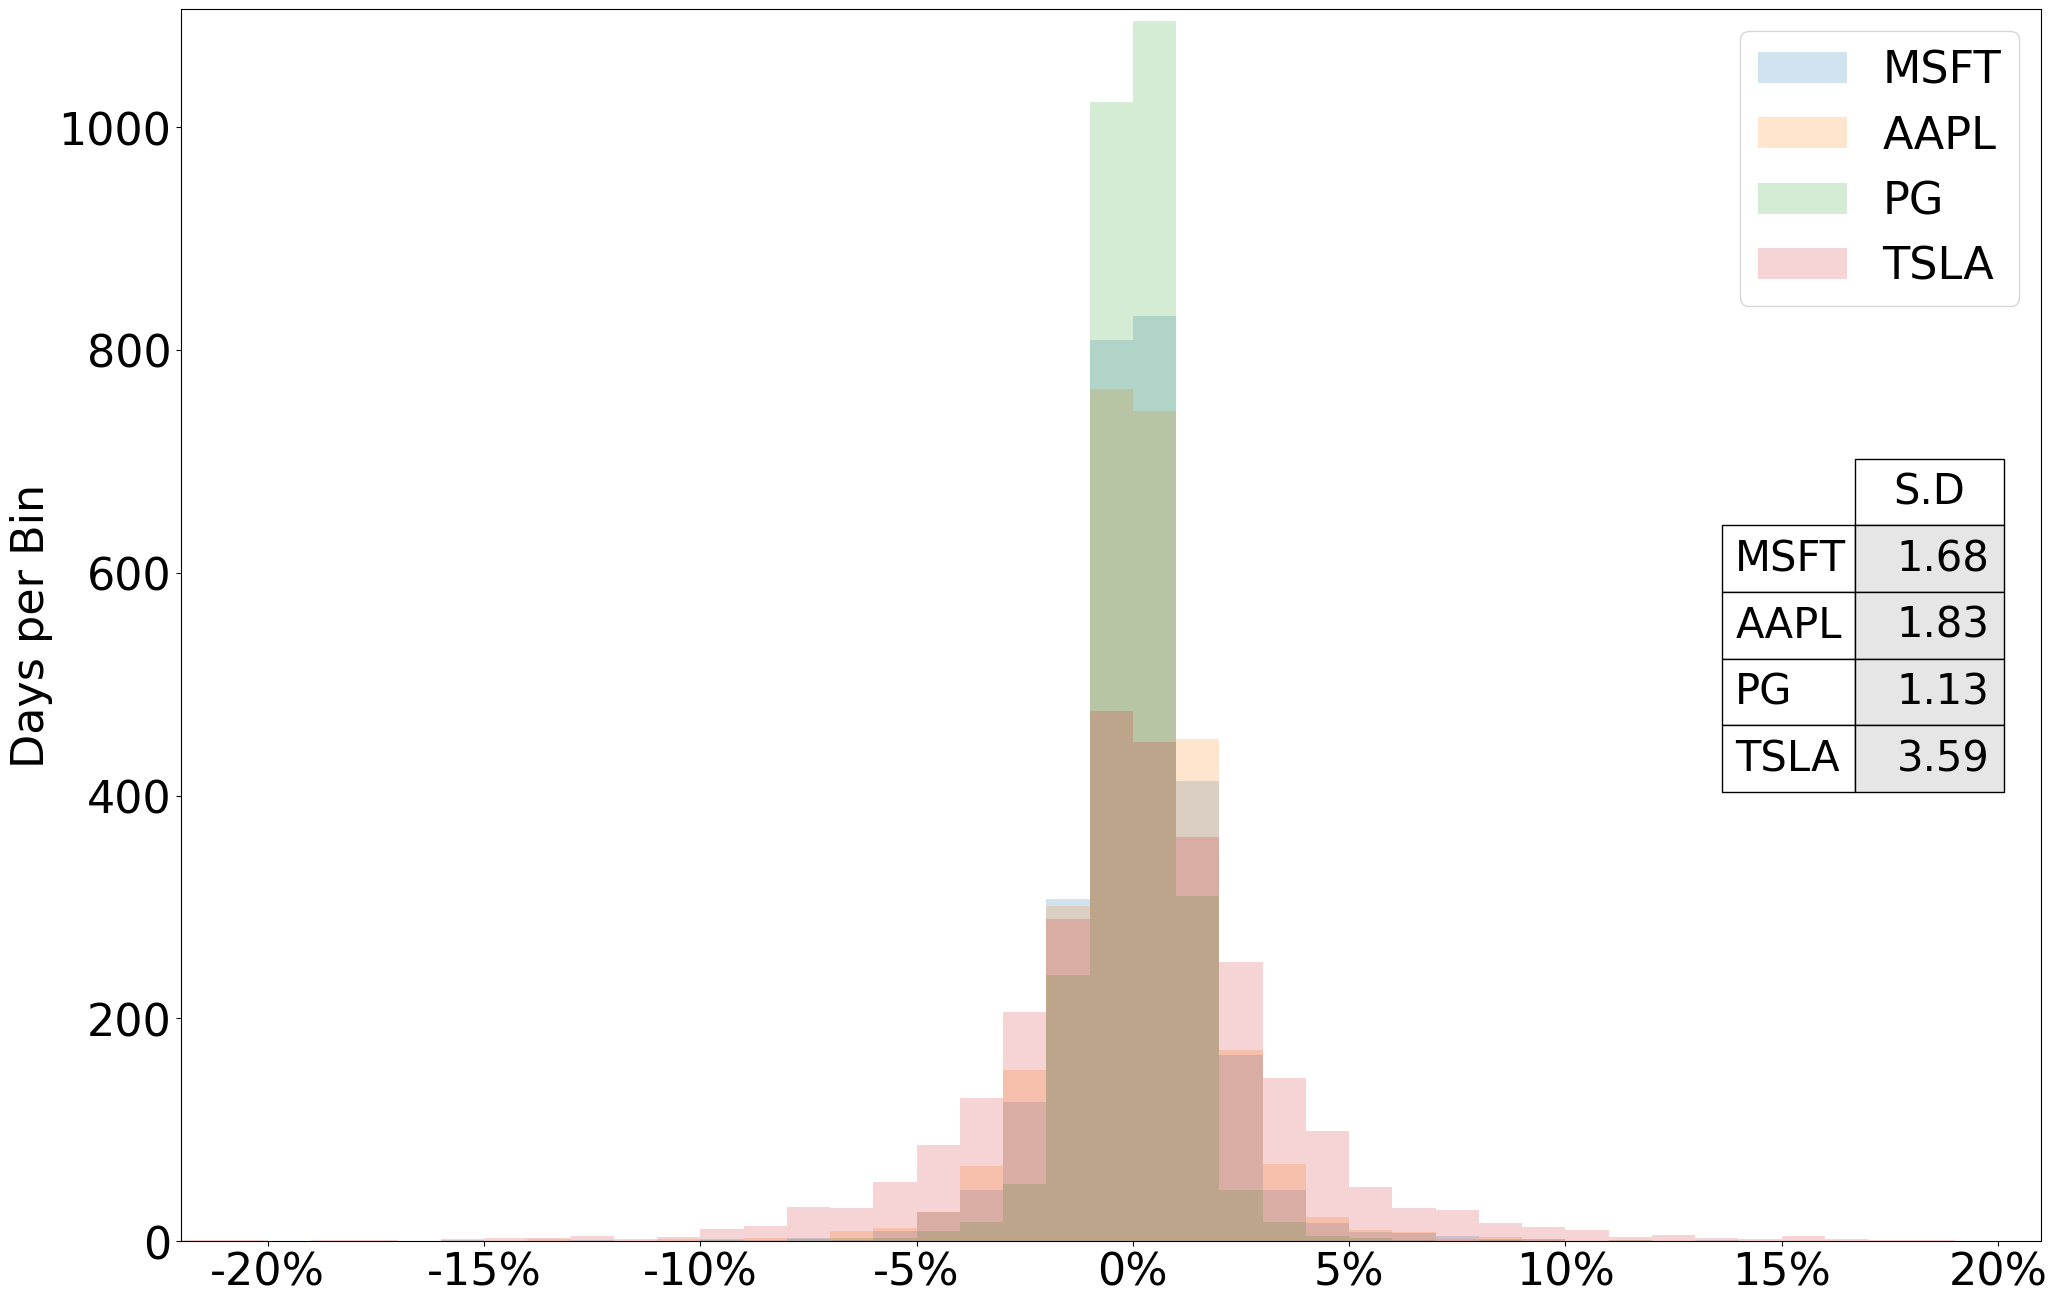

In [28]:
# Multiply the price change data by 100
plot_data = price_change_data.mul(100)

# Create a figure with a large size
fig, ax = plt.subplots(figsize=(24, 16))

# Loop through each key in the price_change_data and plot a histogram
for key in price_change_data:
    # Set the number of bins to be the length of 1%
    plot_data[key].hist(bins=[x for x in range(-22, 22, 1)],
                        alpha=.2,
                        label=key,
                        density=False,
                        ax=ax)

# Set the y-axis label
ax.set_ylabel('Days per Bin')

# Set the tick labels for the x-axis to be percentages
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + '%' for x in x_vals])

# Create a table showing the standard deviation for each stock
std_df = round(plot_data.std(), 2).rename('S.D').to_frame()
stats = table(ax,
              std_df,
              colWidths=[.1],
              cellColours=[[(.9,.9,.9)]]*4,
              loc="center right")
stats.scale(.8, 4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)

# Remove the grid lines from the plot
ax.grid(False)

# Add a legend to the plot
ax.legend()


In [29]:
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.385104  0.292778 -0.039605 -0.369962
2012-01-05  0.605411  0.603115 -0.370532 -0.600269
2012-01-06  0.917916  0.568085 -0.212423 -0.216812
2012-01-09 -0.788983 -0.086715  0.371413  0.350195
...              ...       ...       ...       ...
2023-03-24  0.620820  0.451827  1.779405 -0.263877
2023-03-27 -0.895959 -0.675694 -0.464161  0.204321
2023-03-28 -0.248282 -0.217862  0.247455 -0.383602
2023-03-29  1.131506  1.070528  0.270796  0.682992
2023-03-30  0.746755  0.537590  0.383708  0.200677

[2829 rows x 4 columns]

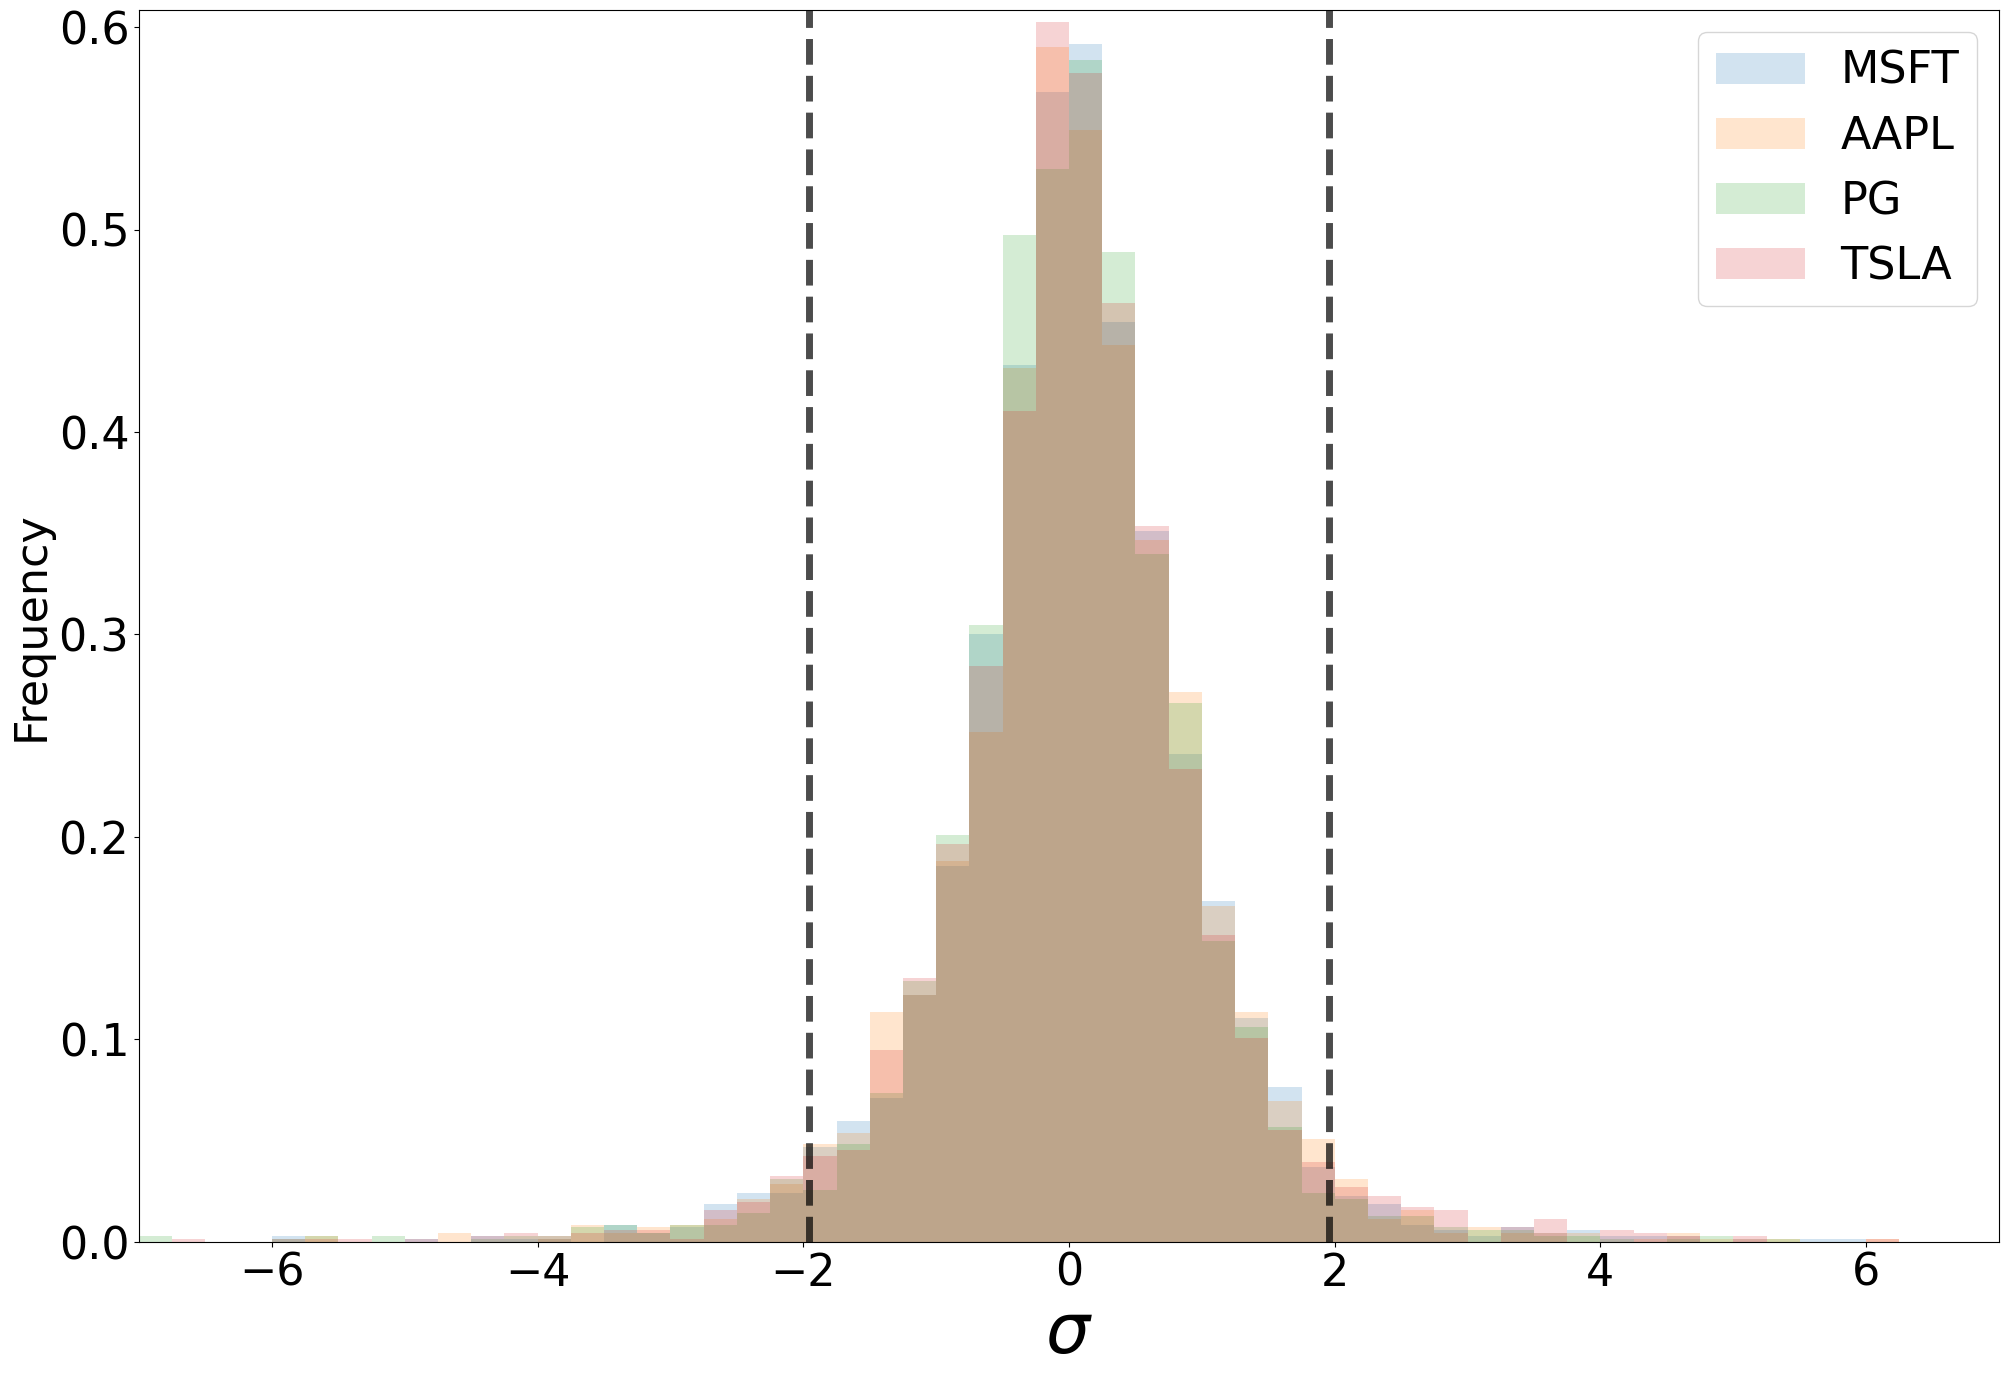

In [30]:
# replot normalization data by standard deviation
fig, ax = plt.subplots(figsize = (24, 16))
for key in norm_plot_data:
    norm_plot_data[key].hist(bins = [x / 4 for x in range(-28, 29, 1)],
                            alpha = .2,
                            label = key,
                            # setting density 'True' shows frequency units of SDs
                            density = True,
                            ax = ax)
ax.set_ylabel('Frequency')
ax.set_xlabel('$\sigma$', fontsize = 50)

# If this is a normal distribution, 95% of the body of the distribution should lie between -1.96 and 1.96 SD of the mean
ax.axvline(-1.96, linewidth = 5, ls = '--', color = 'k', alpha = .7)
ax.axvline(1.96, linewidth = 5, ls = '--', color = 'k', alpha = .7)
ax.grid(False)
ax.legend()

In [31]:
price_change_data['S&P 500'] = web.get_data_yahoo('^GSPC',
                                                start,
                                                end)['Close']

[*********************100%***********************]  1 of 1 completed


In [32]:
price_change_data['S&P 500'] = np.log(price_change_data['S&P 500']).diff()
price_change_data

MSFT      AAPL        PG      TSLA   S&P 500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264  0.000188
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  0.002939
2012-01-06  0.015415  0.010400 -0.002408 -0.007773 -0.002540
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  0.002259
...              ...       ...       ...       ...       ...
2023-03-24  0.010426  0.008271  0.020172 -0.009461  0.005624
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326  0.001646
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753 -0.001575
2023-03-29  0.019002  0.019597  0.003070  0.024488  0.014137
2023-03-30  0.012541  0.009841  0.004350  0.007195  0.005699

[2829 rows x 5 columns]

In [33]:
def calculate_beta(data, stock_key, market_key):
    # Select the columns with data and drop missing values
    df = data[[stock_key, market_key]].dropna()
    
    # Calculate the covariance between the stock and the market
    stock_cov = covariance(df[stock_key], df[market_key], sample = True) 
    
    # Calculate the variance of the market
    stock_var = variance(df[market_key], sample = True)
    
    # Calculate beta as the ratio of the covariance to the variance
    beta = stock_cov / stock_var
    
    return beta
    
# Initialize empty dictionary for betas
betas = {}

# Iterate over all stocks and calculate their beta with respect to S&P 500
for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, 'S&P 500')

# Create a pandas DataFrame to display the betas
pd.DataFrame(betas, index = ['$\\beta$']).T


$\beta$
MSFT  1.188963
AAPL  1.173324
PG    0.582199
TSLA  1.447399

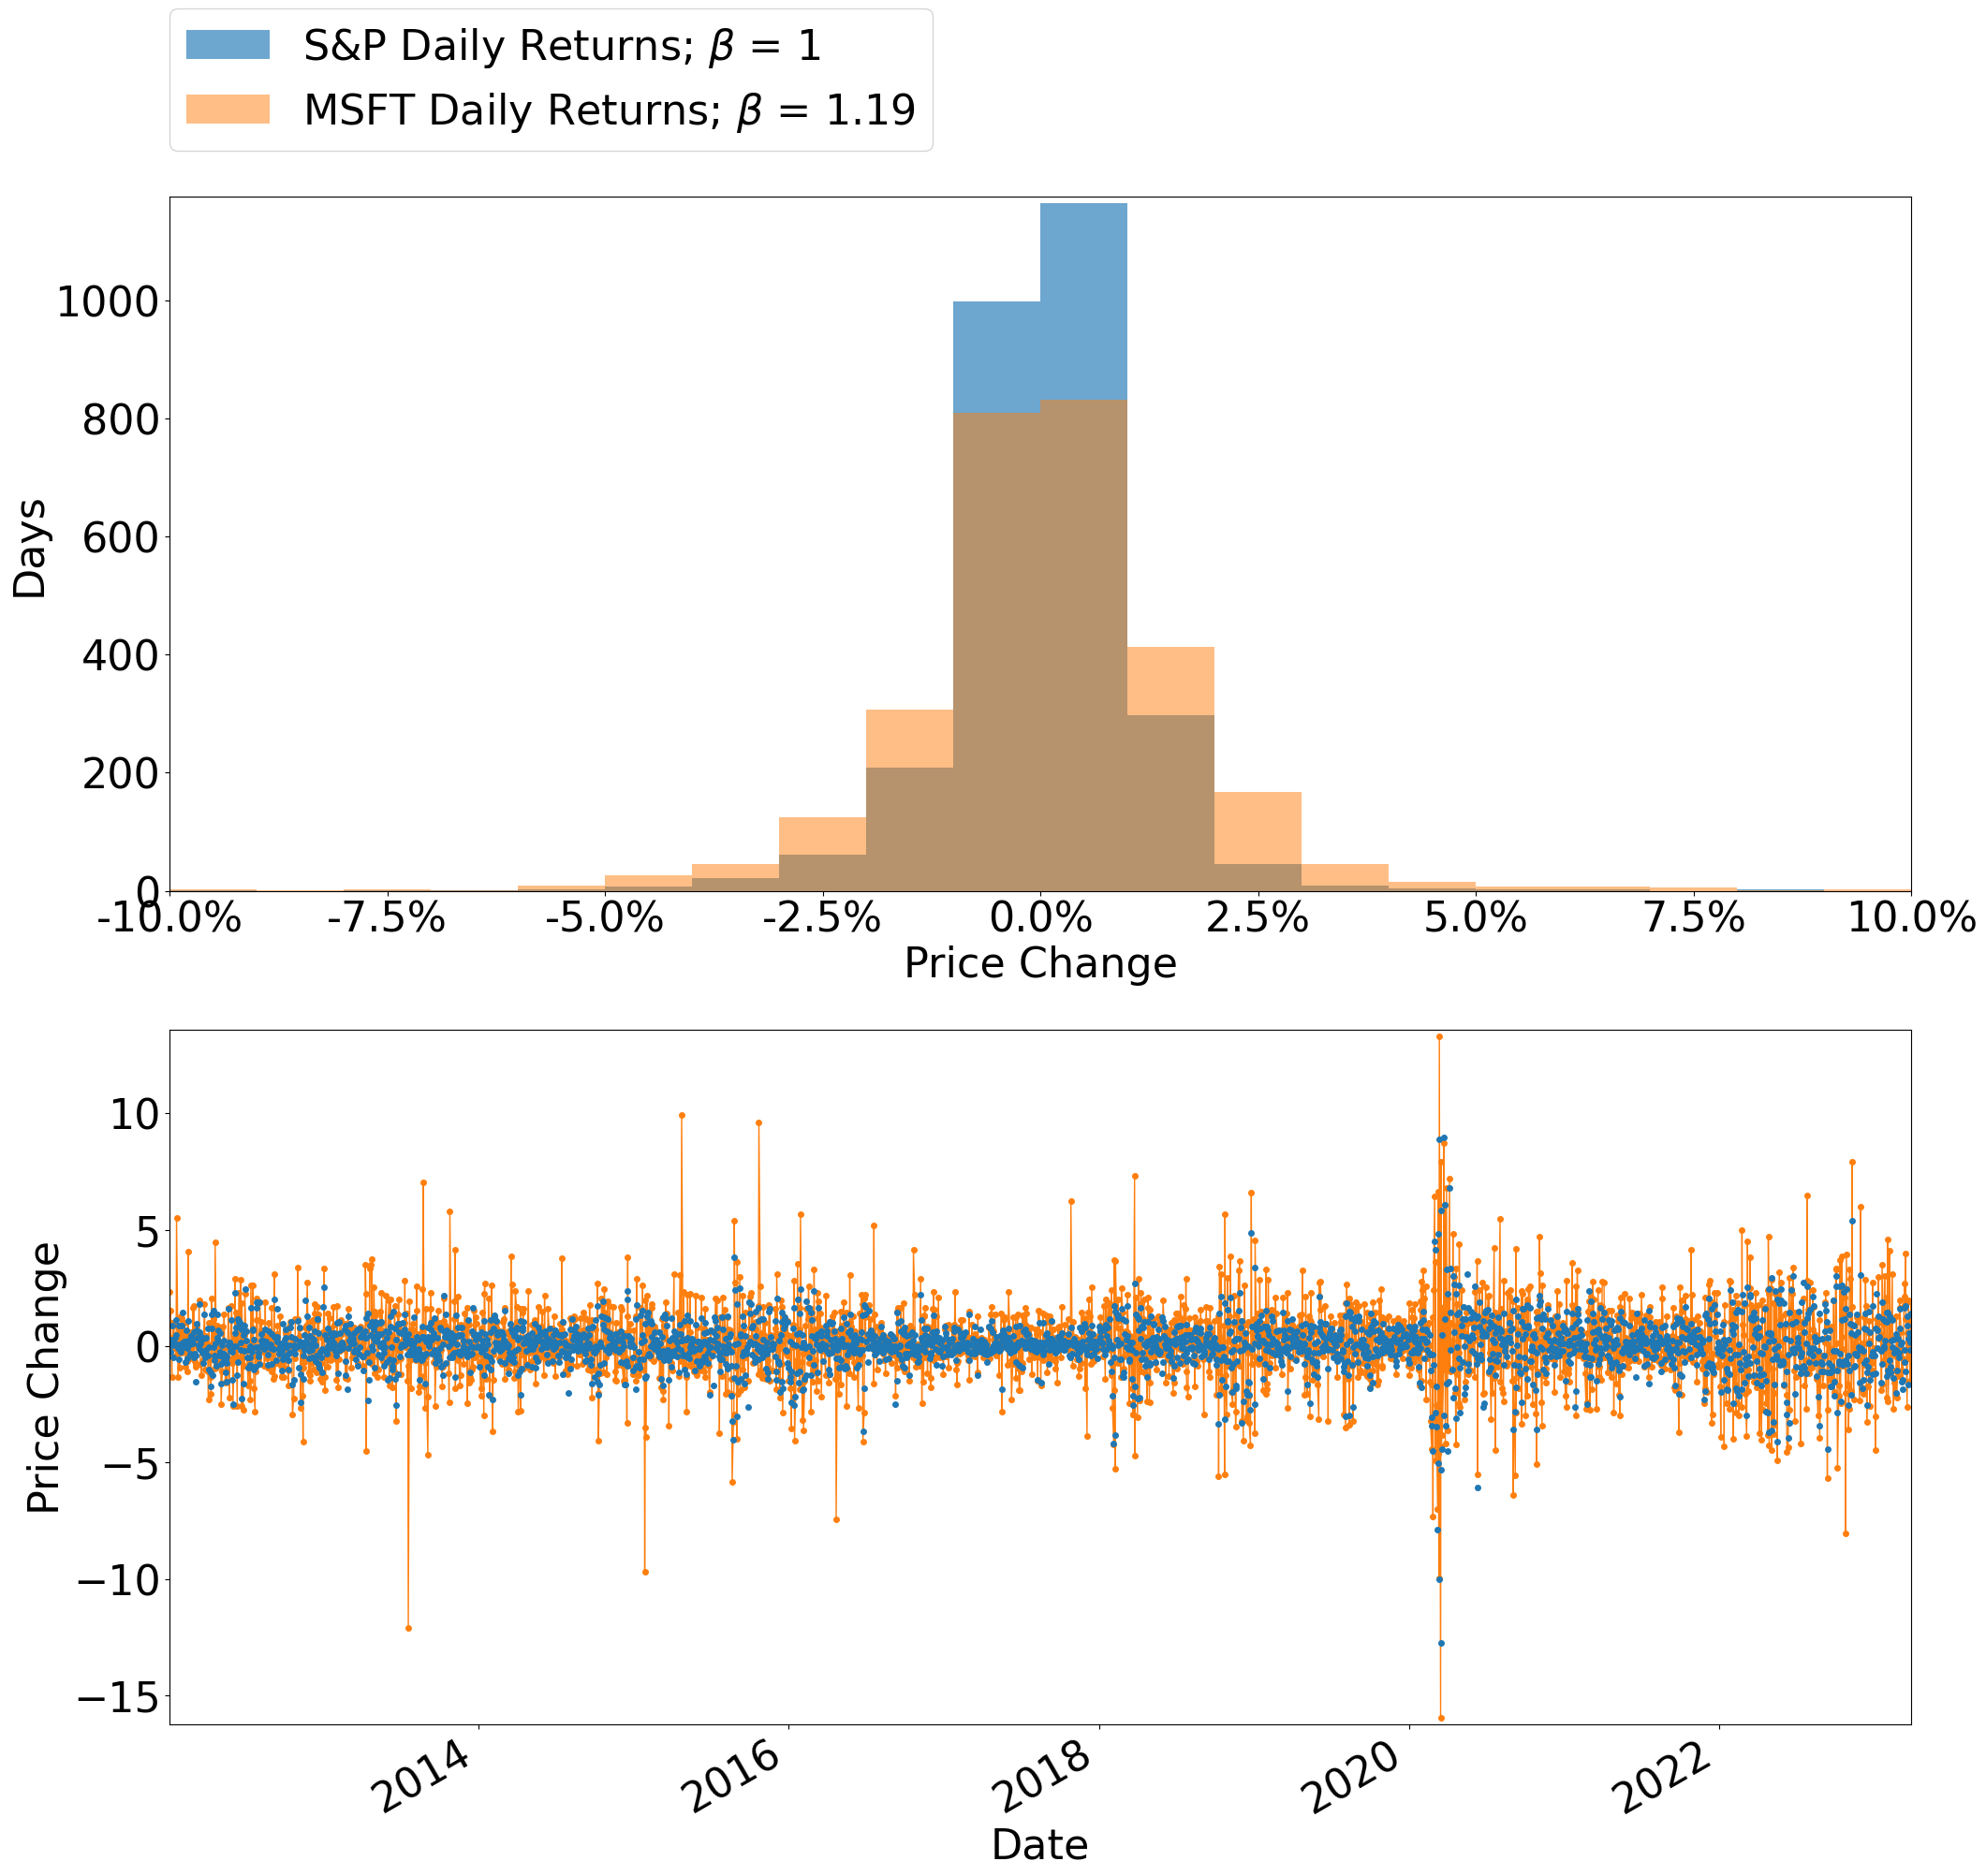

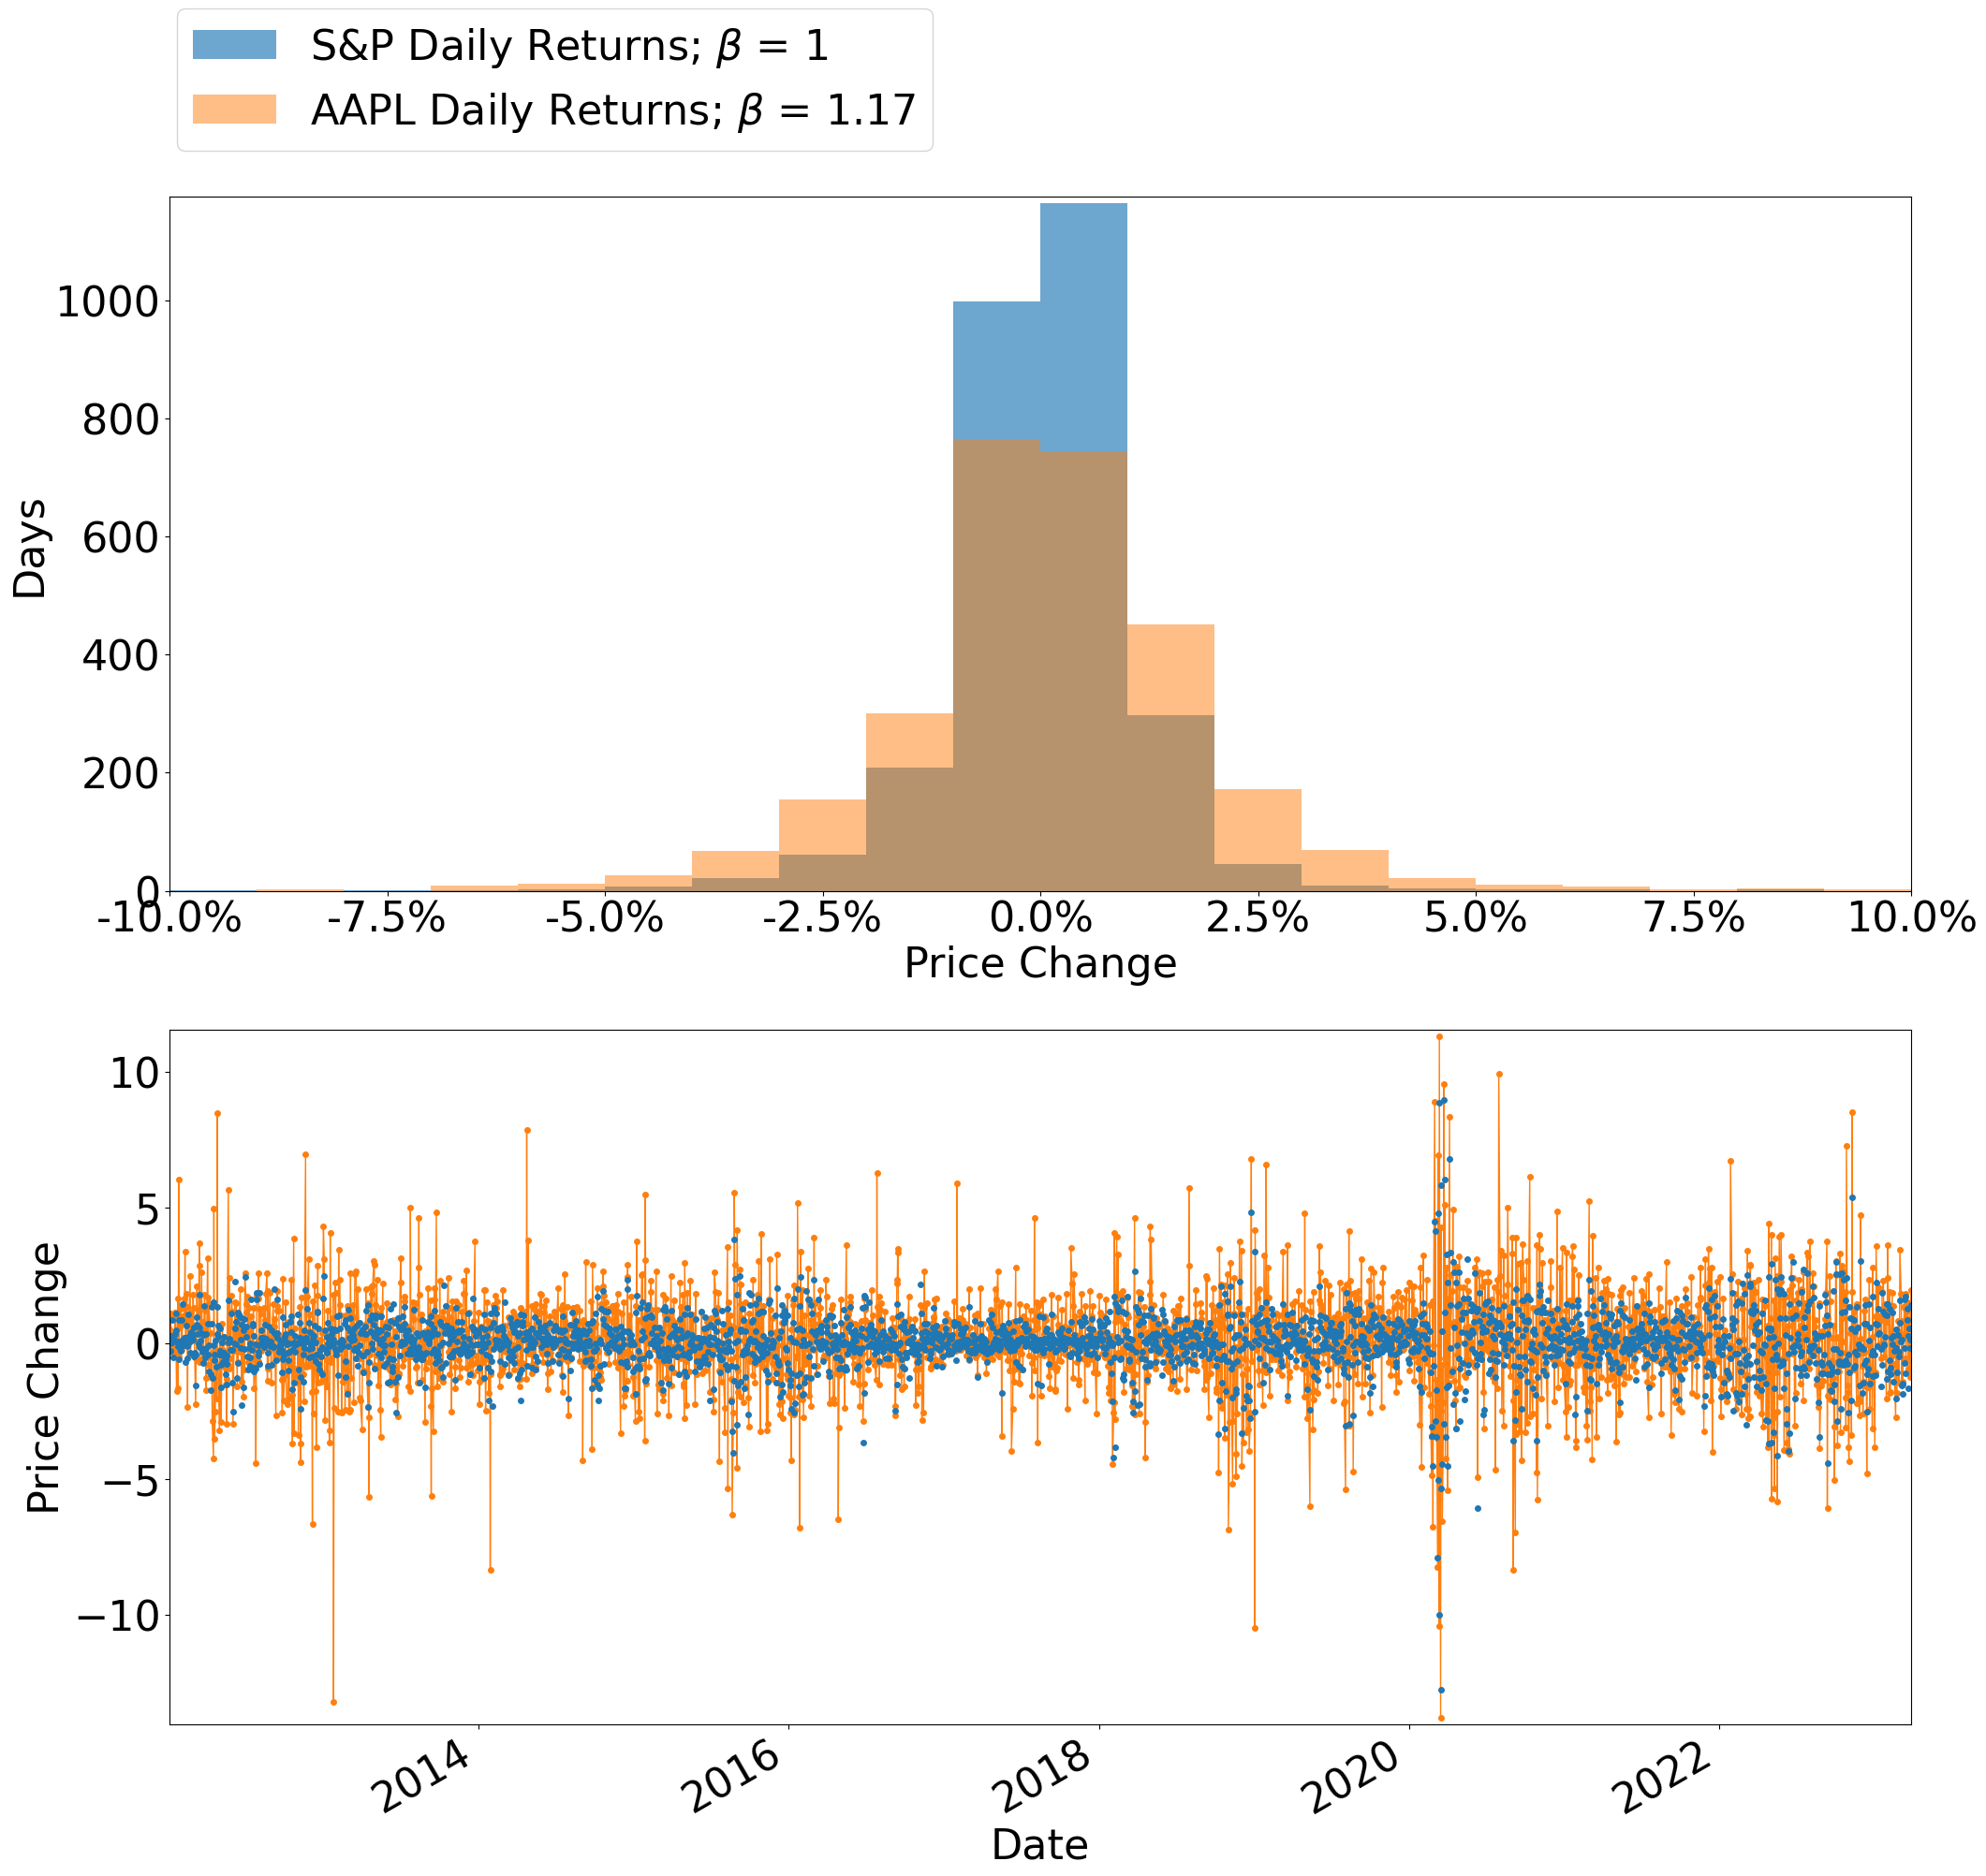

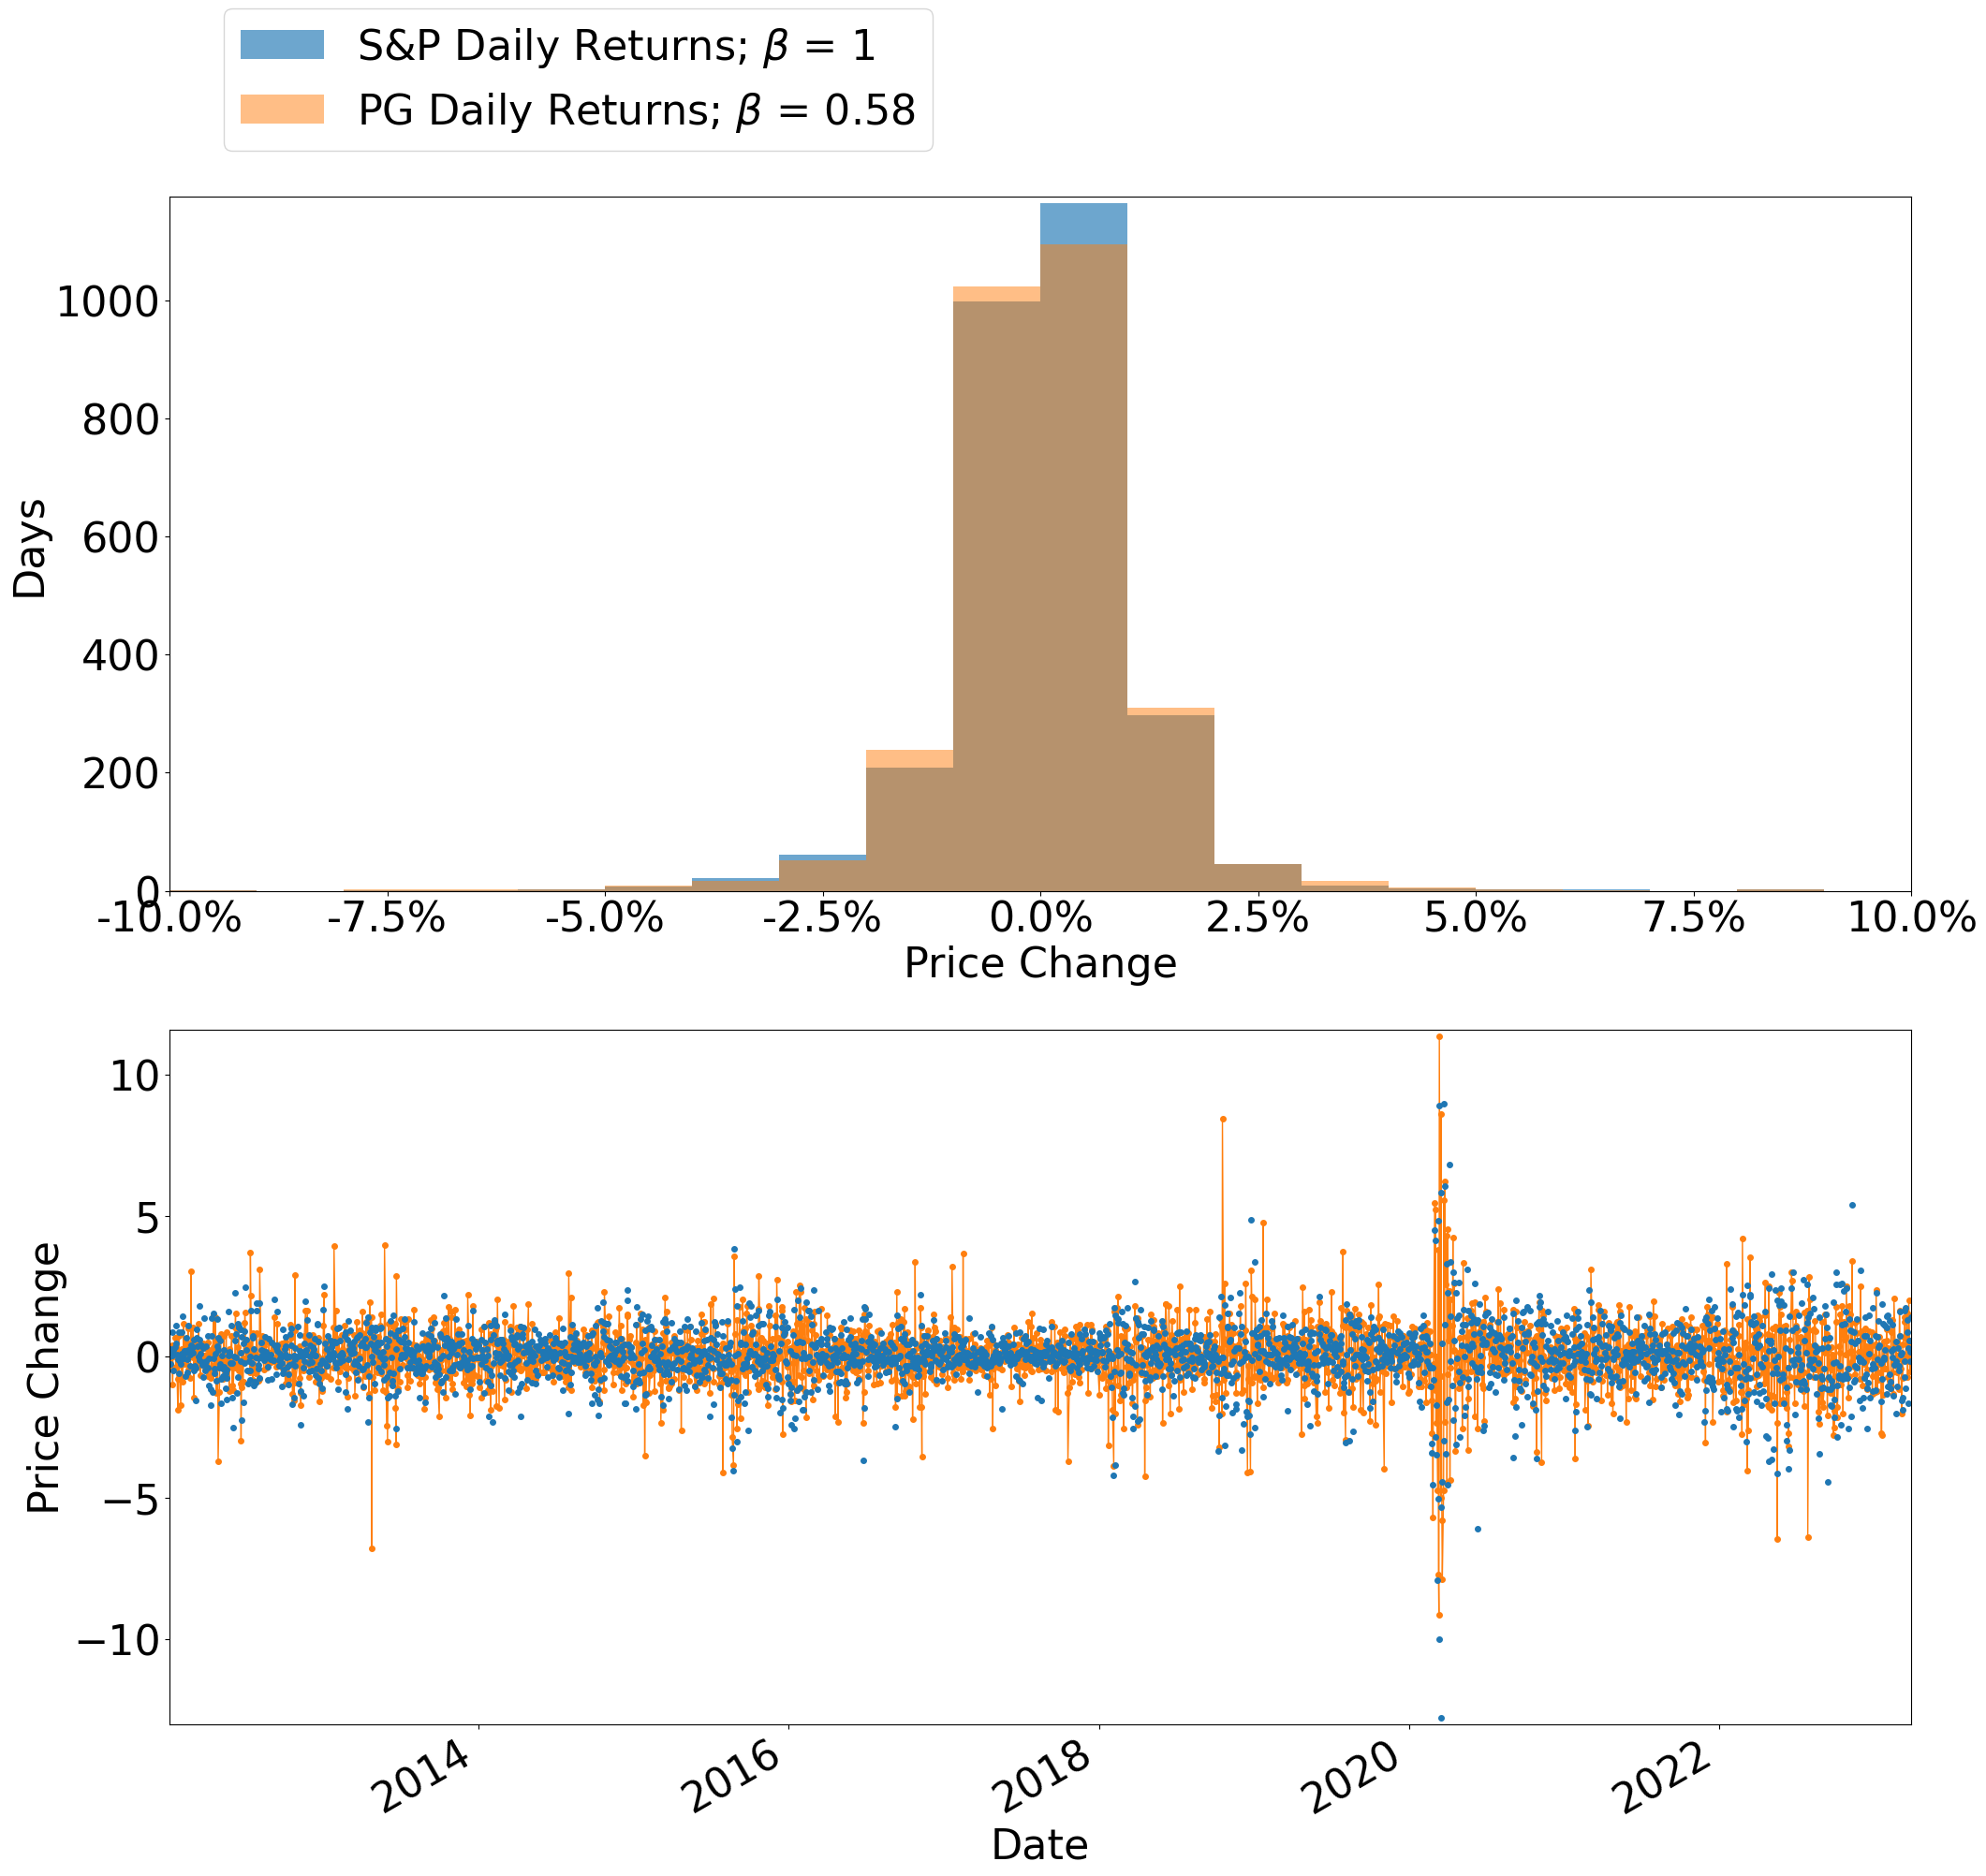

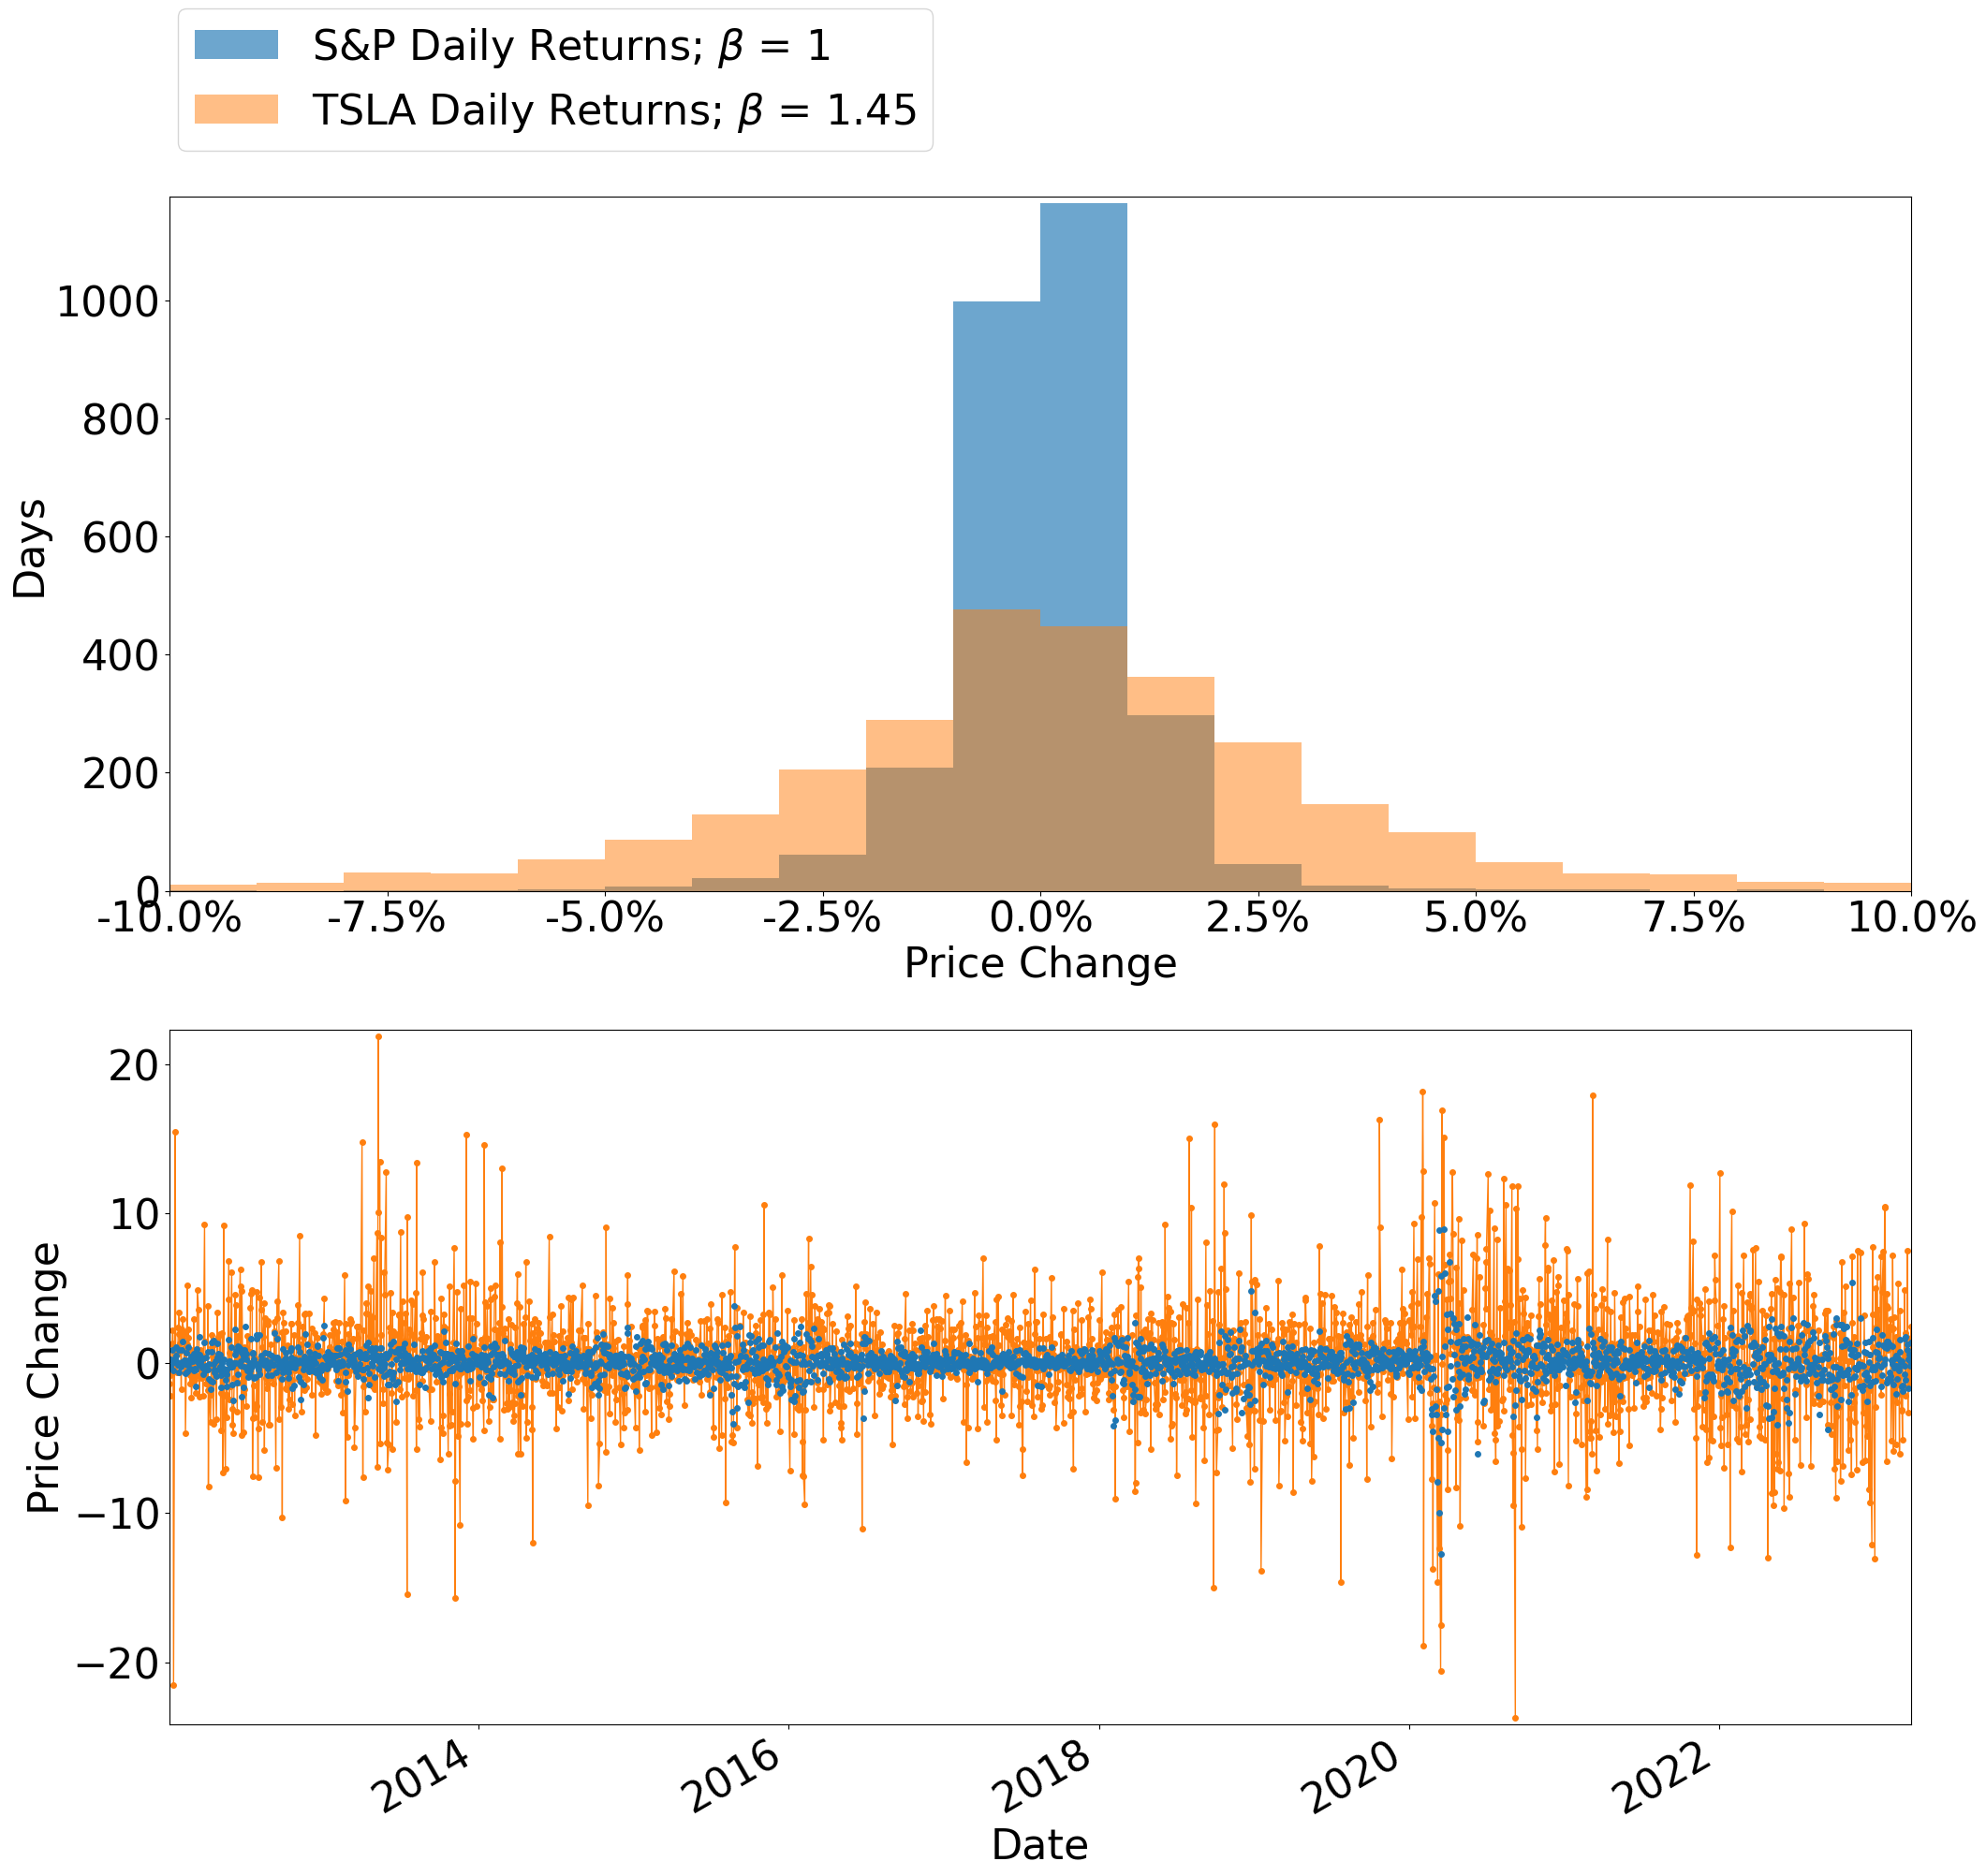

In [34]:
plot_data = price_change_data.mul(100)
for stock in stocks:
    fig, ax = plt.subplots(2, 1, figsize = (24, 24))
    plot_data['S&P 500'].hist(bins = [x for x in range(-10, 11, 1)],
                                label = 'S&P Daily Returns; $\\beta$ = ' + str(1),
                                ax = ax[0],
                                density = False,
                                alpha = .65)

    plot_data[stock].hist(bins=[x for x in range(-10, 11, 1)],
                            label=stock + ' Daily Returns; $\\beta$ = ' + str(round(betas[stock], 2)),
                            ax=ax[0],
                            density=False,
                            alpha=0.5)


    ax[0].legend(bbox_to_anchor = (.45, 1.3))
    ax[0].set_ylabel('Days')
    ax[0].set_xlabel('Price Change')
    ax[0].set_xticklabels([str(x) + '%' for x in ax[0].get_xticks()])
    ax[0].grid(False)

    plot_data[stock].plot(linestyle = '-',
                                linewidth = 1,
                                marker = 'o',
                                markersize = 4,
                                color = 'C1',
                                ax = ax[1])
    
    plot_data['S&P 500'].plot(linestyle = '',
                                marker = 'o',
                                markersize = 4,
                                color = 'C0',
                                ax = ax[1])

    ax[1].set_ylabel('Price Change')

In [35]:
n = 100
m = 1000

dist_avgs = {'Die Rolls' : [],
            'Poisson' : [],
            'Lognormal' : []}

# build a sample of m means from distributions of length n
for i in range(m):
    dist_avgs['Die Rolls'].append(mean(np.random.randint(1, 7, n)))
    dist_avgs['Poisson'].append(mean(np.random.poisson(1, n)))
    dist_avgs['Lognormal'].append(mean(np.random.lognormal(0, 1, n)))
# each column is a sample of sample means
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.46     1.04   1.504512
1         3.66     0.92   1.565261
2         3.80     0.94   1.774162
3         3.56     1.07   1.621880
4         3.54     0.73   1.659677
..         ...      ...        ...
995       3.48     0.97   1.591253
996       3.56     1.01   1.532574
997       3.37     1.00   1.989414
998       3.34     0.92   1.571180
999       3.53     0.93   1.737776

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

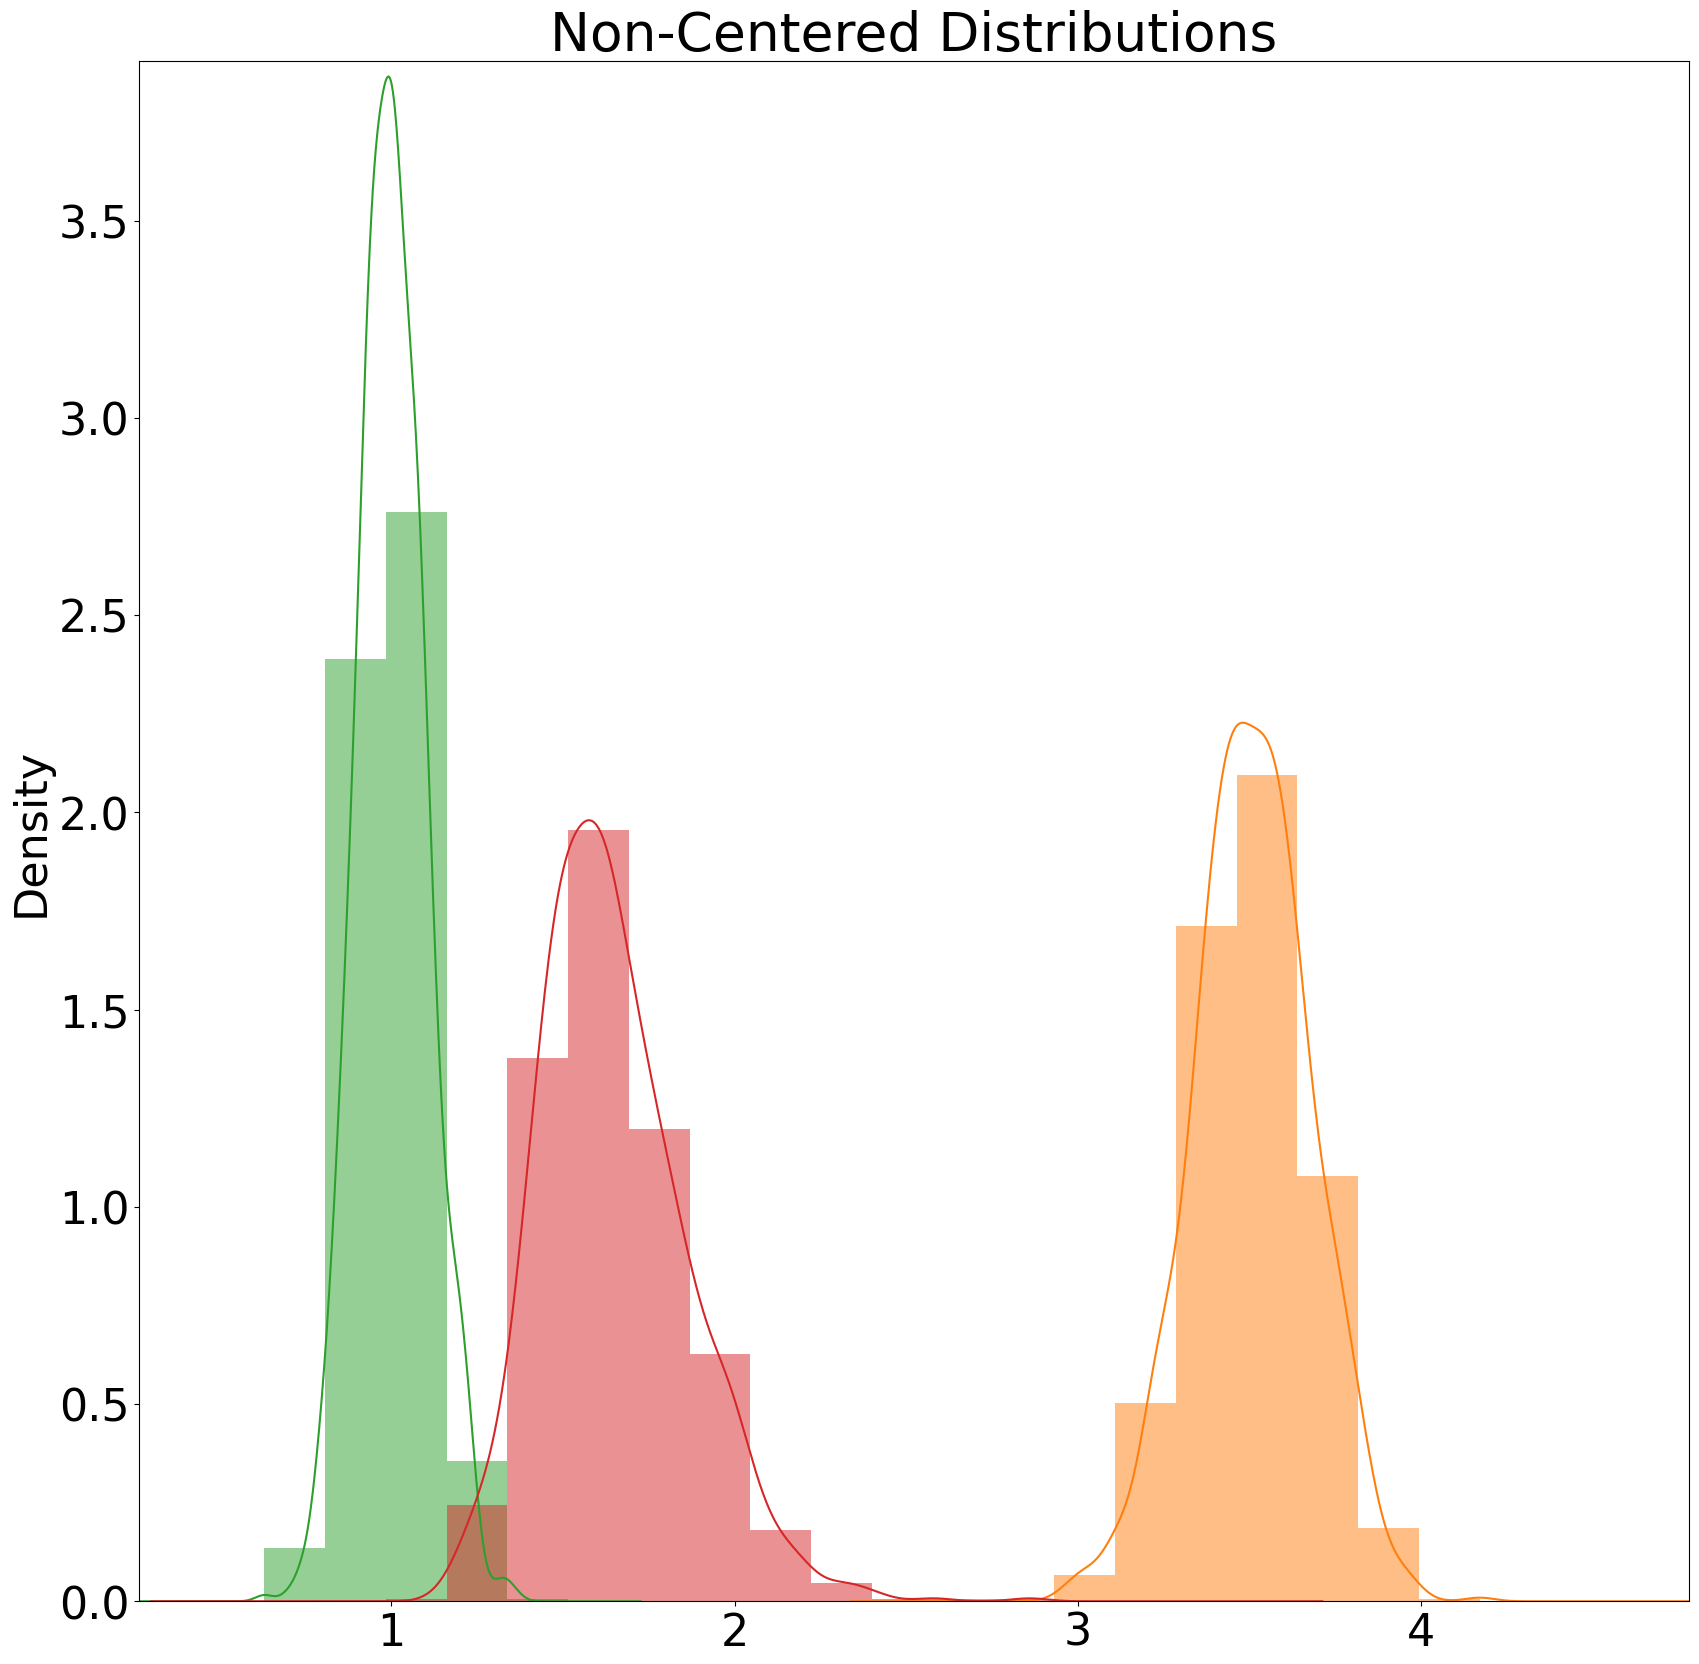

In [36]:
# Create a figure and axis object with a size of 20x20
fig, ax = plt.subplots(figsize = (20, 20))

# Plot histograms of the distributions in dist_avgs with 20 bins,
# density normalized, and colored by C1, C2, and C3 with 50% transparency
dist_avgs.plot.hist(density = True,
                    ax = ax,
                    bins = 20,
                    color = ['C1', 'C2', 'C3'],
                    alpha = .5,
                    legend = False)

# Plot kernel density estimates of the distributions in dist_avgs
# colored by C1, C2, and C3, and remove the legend
dist_avgs.plot.kde(ax = ax, color = ['C1', 'C2', 'C3'], legend = False)

# Set the title of the plot
ax.set_title('Non-Centered Distributions')


In [37]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()

for key in dist_avgs:
    ## Center Distribution
    # df that centers the distribution at zero by substracting the mean value from each sample mean
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])

    ## Normalize Distribution
    # divide each observation 
    sd_df[key] = means_df[key] / means_df.std()[key]

sd_df

Die Rolls   Poisson  Lognormal
0    -0.272761  0.371351  -0.668576
1     0.881538 -0.808477  -0.385493
2     1.689546 -0.611839   0.587965
3     0.304388  0.666308  -0.121653
4     0.188959 -2.676538   0.054477
..         ...       ...        ...
995  -0.157331 -0.316882  -0.264370
996   0.304388  0.076394  -0.537811
997  -0.792195 -0.021925   1.591017
998  -0.965340 -0.808477  -0.357911
999   0.131244 -0.710158   0.418410

[1000 rows x 3 columns]

In [38]:
# df_dct = {'Non-Centered Distributions' : dist_avgs,
#         'Centered Distributions' : means_df,
#         'Centered Distributions Normalized by SD' : sd_df}

# keys = list(df_dct.keys())

# # Create a figure and axis object with a size of 20x20
# num_figs = len(keys)
# fig, axs = plt.subplots(num_figs, figsize = (10, 20))

# for i in range(num_figs):
#     key = keys[i]
#     ax = axs[i]
#     plot_df = df_dct[key]
#     num_samples = len(plot_df.keys())
#     colors = ['C' + str(c + 1) for c in range(num_samples)]

# # Plot histograms of the distributions in dist_avgs with 20 bins,
# # density normalized, and colored by C1, C2, and C3 with 50% transparency
# plot_df.plot.hist(density = True,
#                     ax = ax,
#                     bins = 20,
#                     color = colors,
#                     alpha = .5,
#                     legend = False)

# # Plot kernel density estimates of the distributions in dist_avgs
# # colored by C1, C2, and C3, and remove the legend
# plot_df.plot.kde(ax = ax, color = colors, legend = False)

# # Set the title of the plot
# ax.set_title(key)


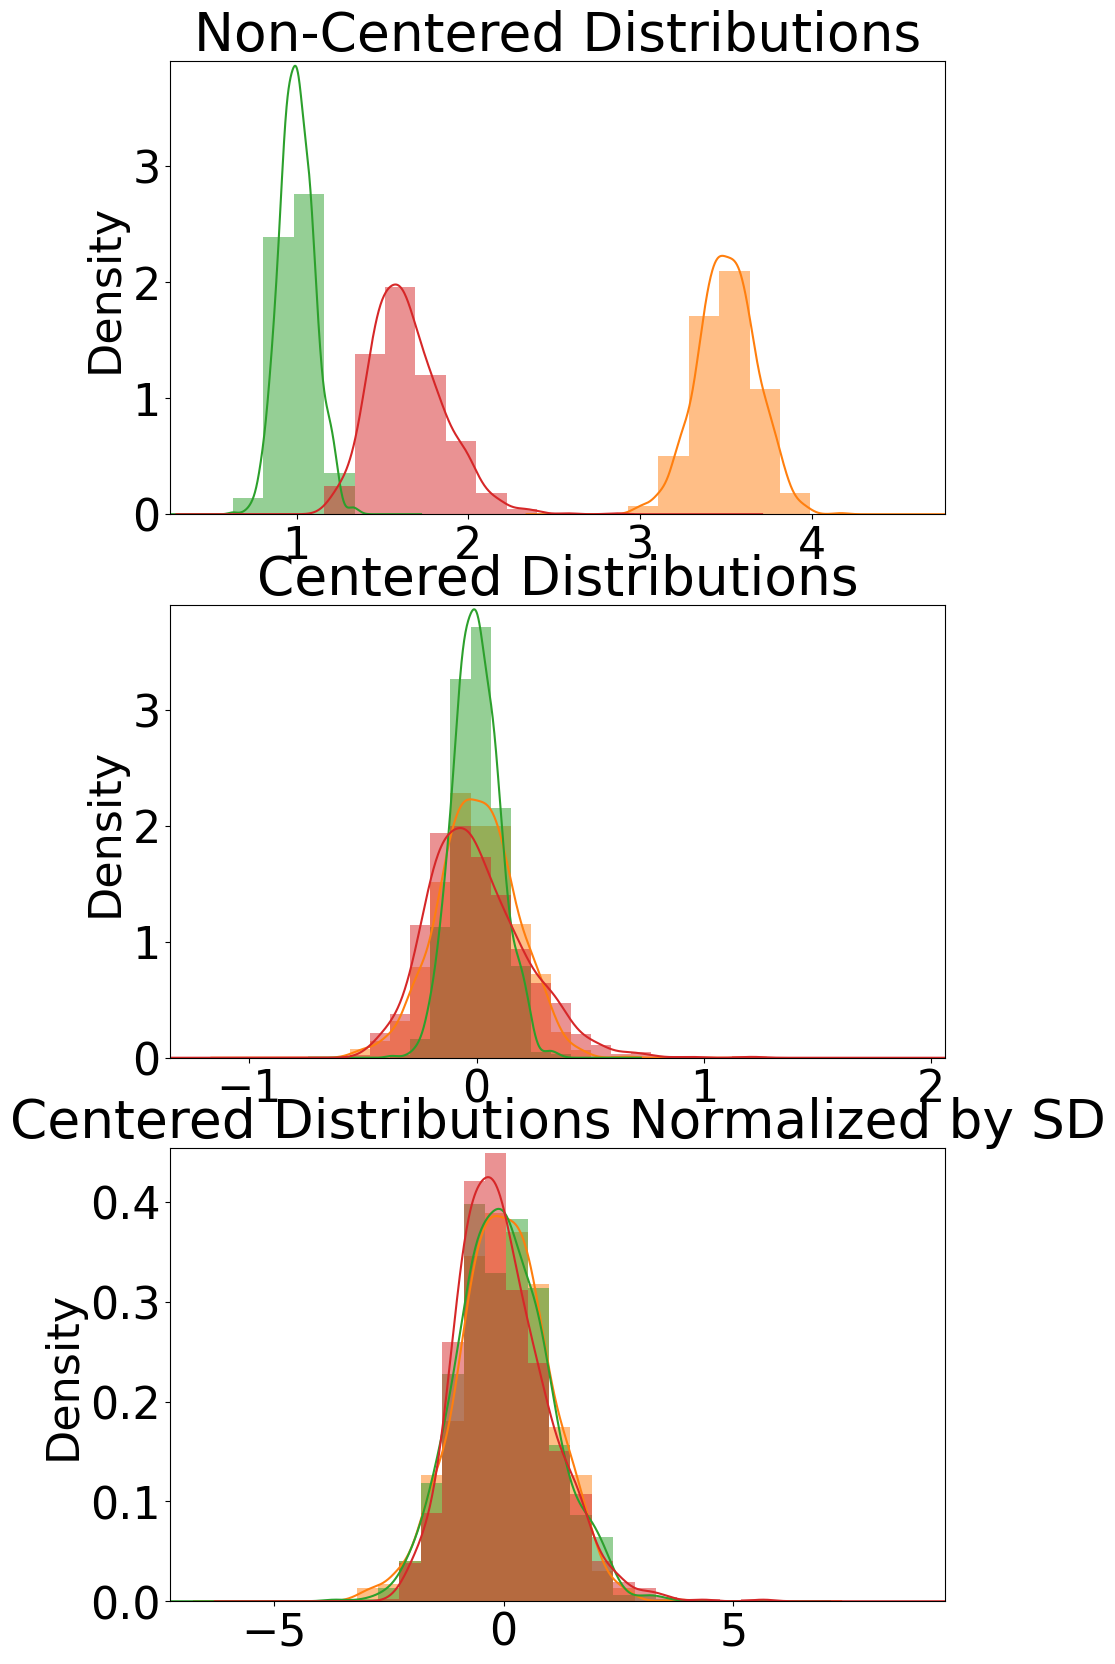

In [39]:
# save df in a single dictionary
df_dct = {
    'Non-Centered Distributions': dist_avgs,
    'Centered Distributions': means_df,
    'Centered Distributions Normalized by SD': sd_df
}

# use the keys in the dictionary to call each of the df
keys = list(df_dct.keys())

# automatically count the number of keys in the dictionary
num_figs = len(keys)

fig, axs = plt.subplots(num_figs, figsize=(10, 20))

# using for loop with the dictionary of df's will allow us to
# automate the creation of a multiplot
# cycle through each index value in the list of keys
for i, key in enumerate(keys):
    # select ax by index value
    ax = axs[i]
    # select dataframe that is linked to key
    plot_df = df_dct[key]
    # count the number of columns inthe dataframe
    # this is the number of distributions 
    num_samples = len(plot_df.columns)
    # each distribution will be assigned to its own color
    colors = ['C' + str(c + 1) for c in range(num_samples)]
    
    #first, plot the dataframe containing the distributions of the random sample means
    plot_df.plot.hist(density=True,
                       ax=ax,
                       bins=20,
                       color=colors,
                       alpha=.5,
                       legend=False)
    
    # fit the distribution curve on the relevant data
    plot_df.plot.kde(ax=ax, color=colors, legend=False)
    ax.set_title(key)


## Simulation

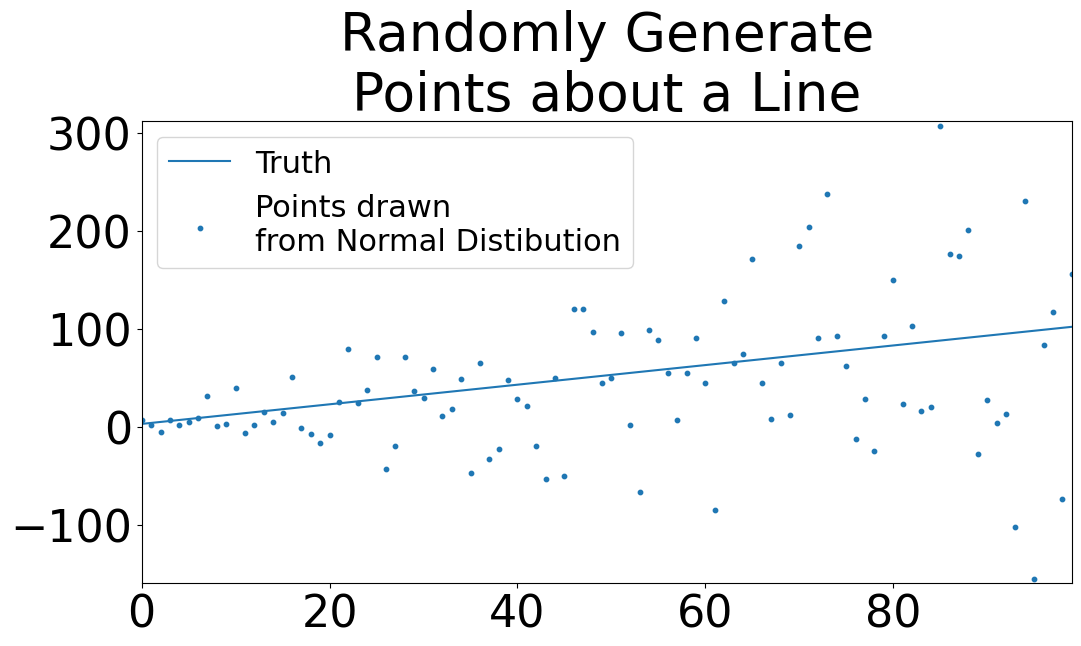

In [40]:
import random

# Define a line with a slope of 1 and y-intercept of 3 using numpy array
line = np.array([i + 3 for i in range(100)])

# Generate random points by drawing from a normal distribution
# with mean and standard deviation equal to each point on the line
points = []
for point in line:
    points.append(random.normalvariate(mu = point, sigma = point))

# Create a plot of the line and the generated points
figure = plt.figure(figsize= (12, 6))
plt.plot(line, label = 'Truth')
plt.scatter(np.arange(len(points)),
             points,
             label = 'Points drawn\nfrom Normal Distibution',
             s = 10)
plt.title('Randomly Generate\nPoints about a Line')
plt.legend(loc = 'best', fontsize = 22)
plt.show()

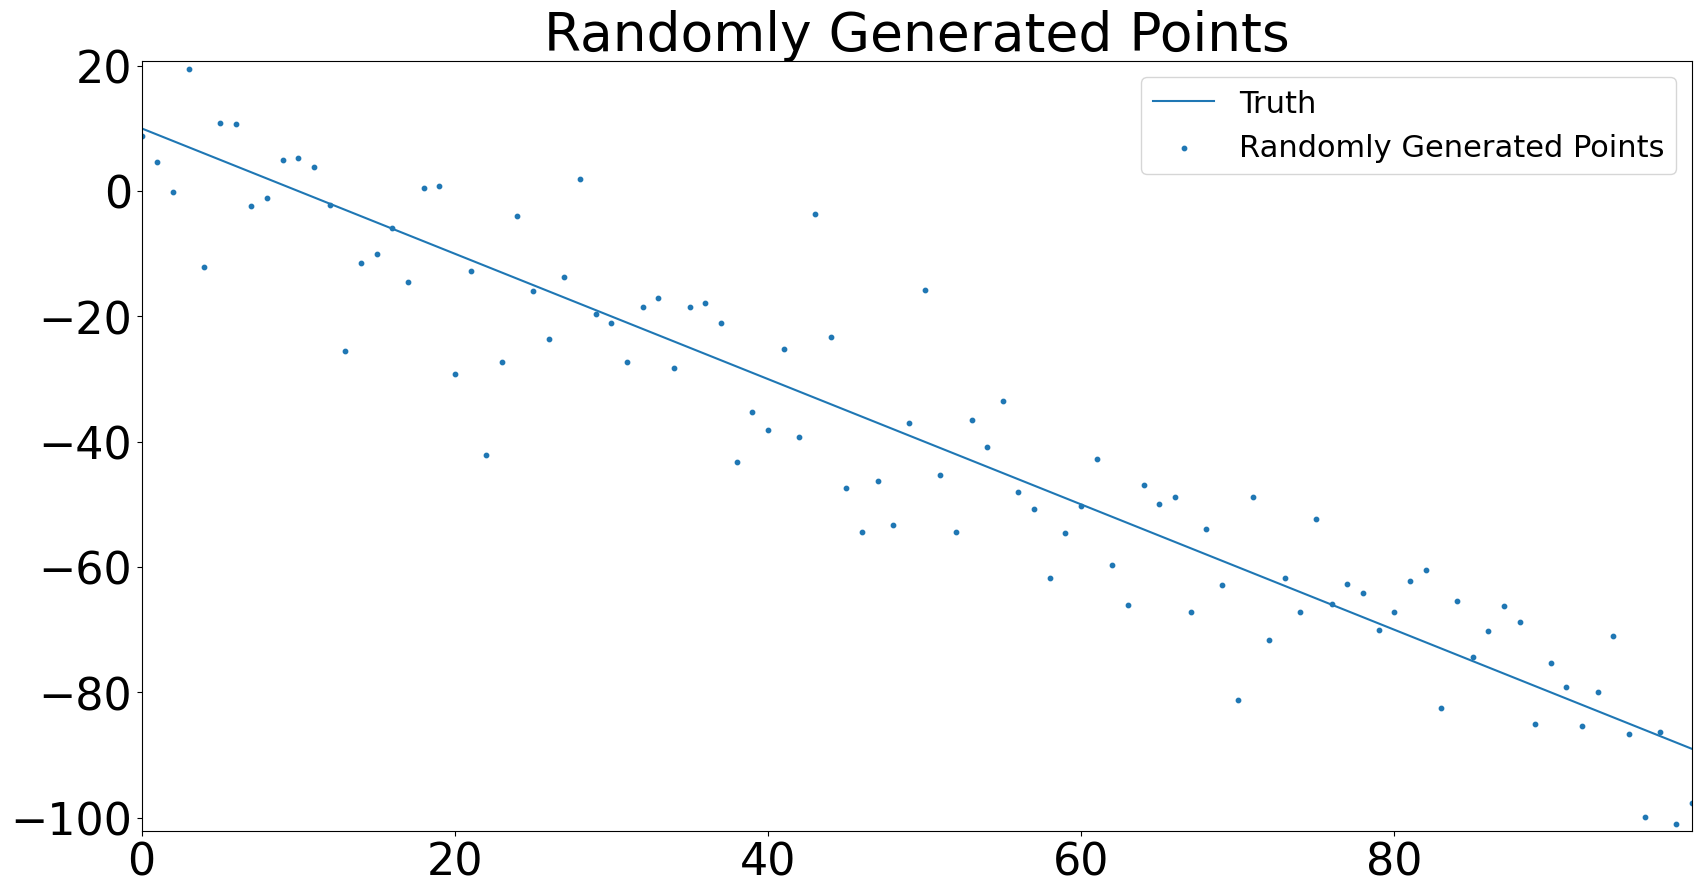

In [41]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
    return line, points

def plot_line(line, points, line_name = 'Truth',
            title = 'Randomly Generated Points'):

    figure = plt.figure(figsize = (20, 10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
                label = title)

    plt.title(title)
    plt.legend(loc = 'best', fontsize = 22)
    plt.show()

line, points = build_random_data_with_line(y_int = 10, slope = -1, SD = 10)
plot_line(line, points)

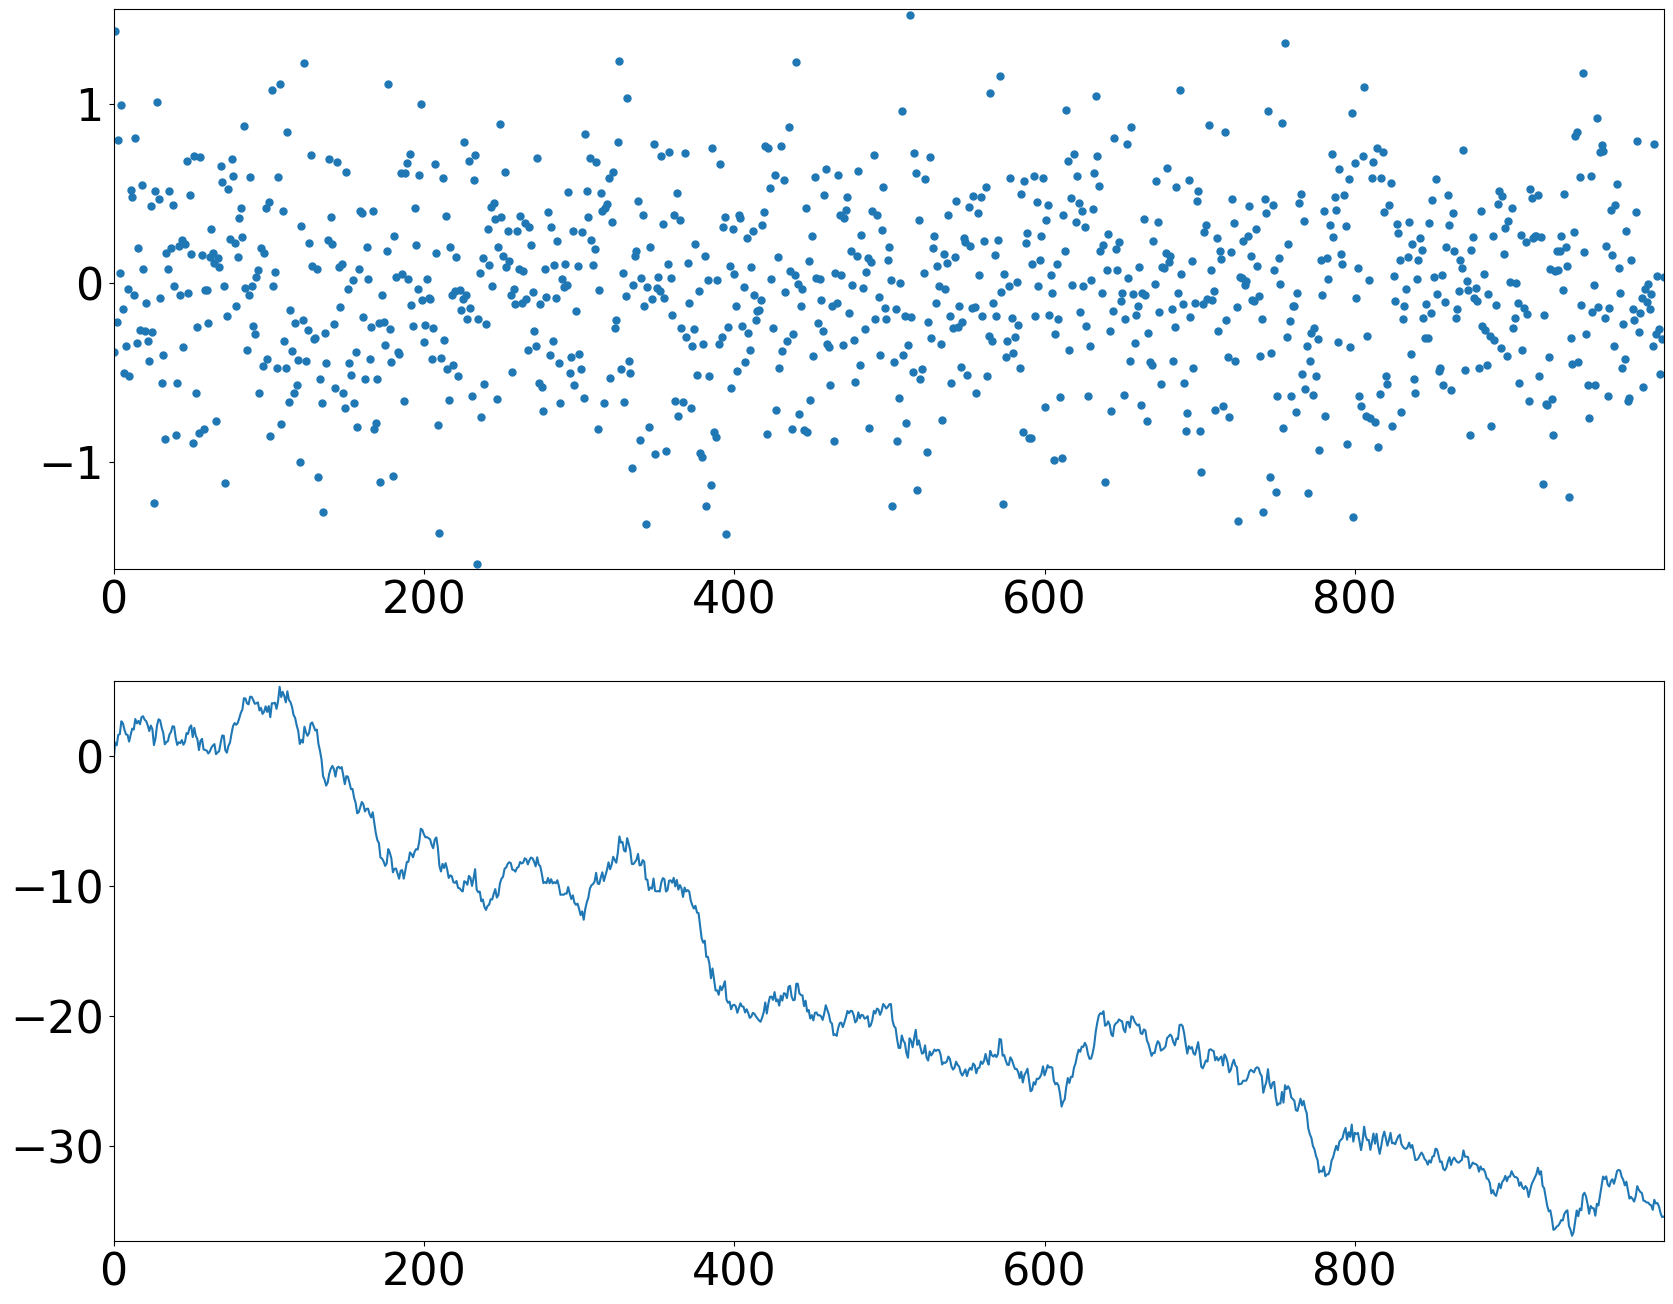

In [42]:
# single simulation

random_list  = [random.normalvariate(0, .5) for i in range (1000)]
fig, axs = plt.subplots(2, figsize = (20, 16))
axs[0].plot(random_list, ls = '', marker = '.', markersize = 10)

simulation = []
for i in range(len(random_list)):
    val =random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        # add last value observed in simulation + change(which is val)
        # this will generate the latest value in the simulation
        simulation.append(simulation[-1] + val)
axs[1].plot(simulation)
plt.show()
plt.close()

In [43]:
# the 
pd.DataFrame(simulation[:10]).diff(), random_list

(          0
 0       NaN
 1  1.406449
 2 -0.219997
 3  0.798283
 4  0.056237
 5  0.993709
 6 -0.149678
 7 -0.503651
 8 -0.354964
 9 -0.034148,
 [-0.38938750266602923,
  1.406449174532283,
  -0.21999722024000598,
  0.7982826840614741,
  0.0562365309785297,
  0.9937092164129111,
  -0.14967847495254819,
  -0.5036507350583358,
  -0.3549637245898826,
  -0.034148394669729486,
  -0.520102195077129,
  0.5195204448351465,
  0.4782684332657521,
  -0.07141040047640738,
  0.8103727465290217,
  -0.33745999464913806,
  0.1959521393353081,
  -0.2620317174790644,
  0.5430492942651427,
  0.07701650713814057,
  -0.26887882927259105,
  -0.1113725084777124,
  -0.32655379402321105,
  -0.43836295047601215,
  0.425687838598159,
  -0.2746464160436164,
  -1.2290215720787636,
  0.5103814796665559,
  1.0095546726182343,
  0.4668919725293994,
  -0.08666747300066792,
  -0.558872926137565,
  -0.40298291579949175,
  -0.8747639888149963,
  0.16343108828529454,
  0.07577600527948235,
  0.5126418621443184,
  0.1953052

In [44]:
# Set mean and standard deviation values for the normal distribution
mean = 0
sigma = 1

# Initialize an empty dictionary to store simulation results
monte_carlo_sim_dict = {}

# Set the number of simulations and the number of periods for each simulation
num_sims = 2000
periods = 1000

# Iterate over the number of simulations
for i in range(num_sims):
    # Create an empty dictionary to store simulation results for the current simulation number
    monte_carlo_sim_dict[i] = {}
    
    # Iterate over the number of periods for each simulation
    for period in range(periods):
        # Assign the current simulation dictionary to a shorter variable name
        curr_sim = monte_carlo_sim_dict[i]
        
        # If this is the first period, generate a random number from the normal distribution
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        
        # If this is not the first period, add a new random number from the normal distribution to the previous period's value
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)


In [45]:
sim_df = pd.DataFrame(monte_carlo_sim_dict)
sim_df

0          1          2         3          4          5     \
0    -2.752065   0.082443  -1.581709 -0.192011  -1.641109   0.808363   
1    -3.150688   0.256638  -3.106178 -0.639089  -1.157454  -0.803979   
2    -3.770049   0.071624  -2.442808 -0.645115  -1.013719   1.168340   
3    -4.232368  -1.645217  -3.090598 -1.819920  -0.284671  -0.187338   
4    -5.271776  -0.840142  -4.561297 -1.255201  -1.146420  -0.416752   
..         ...        ...        ...       ...        ...        ...   
995  40.399538 -27.934121  39.888189 -7.957370  -9.020773  35.861719   
996  39.987213 -28.329866  40.274101 -7.670400  -9.866094  35.999337   
997  39.630521 -29.697495  39.315384 -9.745458  -9.879221  35.425906   
998  39.974864 -29.072682  40.269081 -9.877142 -11.927715  33.924826   
999  40.054573 -29.037367  40.813753 -8.099408 -11.277538  33.489064   

          6         7          8          9     ...      1990       1991  \
0     0.392949 -0.482571   0.198671  -0.045726  ... -0.114385   0.629168   
1     0.531558 -1.108697  -0.102507  -1.291165  ... -0.530031   1.743617   
2     1.489933 -0.293372  -1.361312  -1.628956  ... -0.896409   3.752385   
3     2.296565 -0.654657  -1.881935  -2.083146  ... -0.443879   3.941143   
4     3.939965 -0.120045   0.000063  -3.243505  ... -2.248331   6.594053   
..         ...       ...        ...        ...  ...       ...        ...   
995 -29.597264  2.194881 -41.985002 -73.074657  ...  7.235992 -14.151131   
996 -31.524627  4.155110 -41.468292 -72.445397  ...  8.026864 -15.003511   
997 -31.541623  5.040672 -40.518549 -73.411404  ...  7.304348 -13.761949   
998 -30.943764  4.396807 -39.762734 -72.318058  ...  8.185498 -12.635884   
999 -30.805897  4.998516 -41.126087 -71.356561  ...  6.871304 -13.455138   

          1992       1993       1994       1995       1996       1997  \
0    -0.569263  -1.111225  -0.852235  -0.838410  -1.967120  -0.312404   
1    -1.224403   0.826507  -0.228749  -1.358551  -1.106128  -1.352312   
2    -2.234257   0.175255  -0.111022  -0.052216  -1.420099  -1.131056   
3    -1.433428   0.771122  -0.650140  -0.097671  -0.280907  -0.787289   
4    -1.019516   0.843598   0.778961   0.171384  -0.596773  -2.111572   
..         ...        ...        ...        ...        ...        ...   
995  19.367496 -23.039220  38.678245  24.183468  38.194760 -24.025469   
996  18.761793 -22.390767  38.349052  23.674264  36.470036 -23.585367   
997  18.630147 -23.230197  38.322856  24.845010  36.030675 -22.326916   
998  17.225369 -22.878806  38.274602  24.674755  36.374490 -22.645708   
999  16.869735 -22.957996  37.883737  23.707419  35.391072 -24.135477   

         1998       1999  
0    0.022294  -0.095715  
1   -0.415643   1.152943  
2    0.401018   1.968155  
3    0.217416   1.383488  
4    1.362755   0.874329  
..        ...        ...  
995 -6.198883 -23.586356  
996 -5.938130 -22.512472  
997 -6.470724 -23.322281  
998 -5.722809 -22.563004  
999 -6.512285 -21.539953  

[1000 rows x 2000 columns]

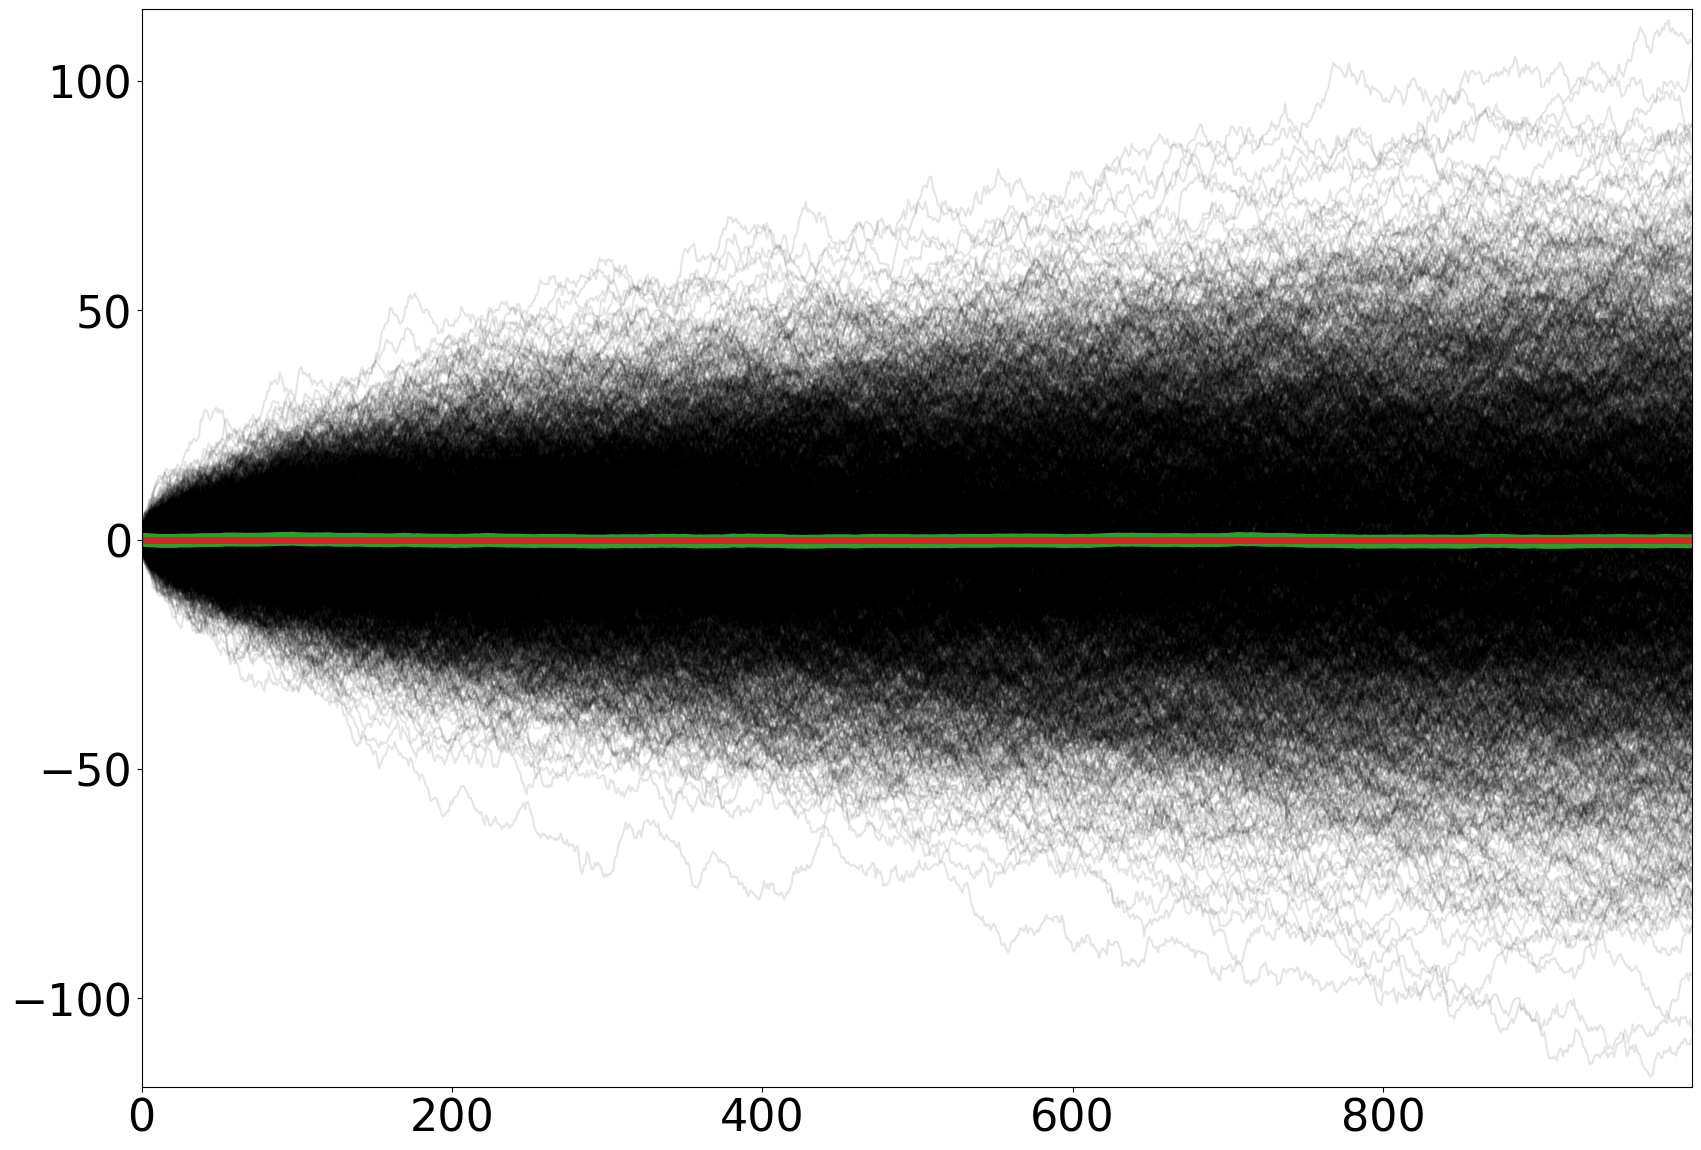

In [46]:
# Create a new figure with a specified size, and store the figure and axes objects in variables called fig and ax, respectively
fig, ax = plt.subplots(figsize = (20, 14))
# Plot each column of the sim_df DataFrame as a line with markers, with the specified markersize, color, and alpha values
sim_df.plot.line(marker = '.',
                markersize = .1,
                color = 'k',
                alpha = .1,
                ax = ax,
                legend = False)

# Plot the mean of each row of the sim_df DataFrame as a line with a specified color and ax object
sim_df.mean(axis= 1).plot.line(color = 'C2', ax = ax, linewidth = 10)
# Add a horizontal line at y = 0 with a specified linewidth and color
ax.axhline(0, linewidth = 5, color = 'C3')

[Text(0, 0.0, '0.0%'),
 Text(0, 0.002, '0.2%'),
 Text(0, 0.004, '0.4%'),
 Text(0, 0.006, '0.6%'),
 Text(0, 0.008, '0.8%'),
 Text(0, 0.01, '1.0%'),
 Text(0, 0.012, '1.2%'),
 Text(0, 0.014, '1.4%')]

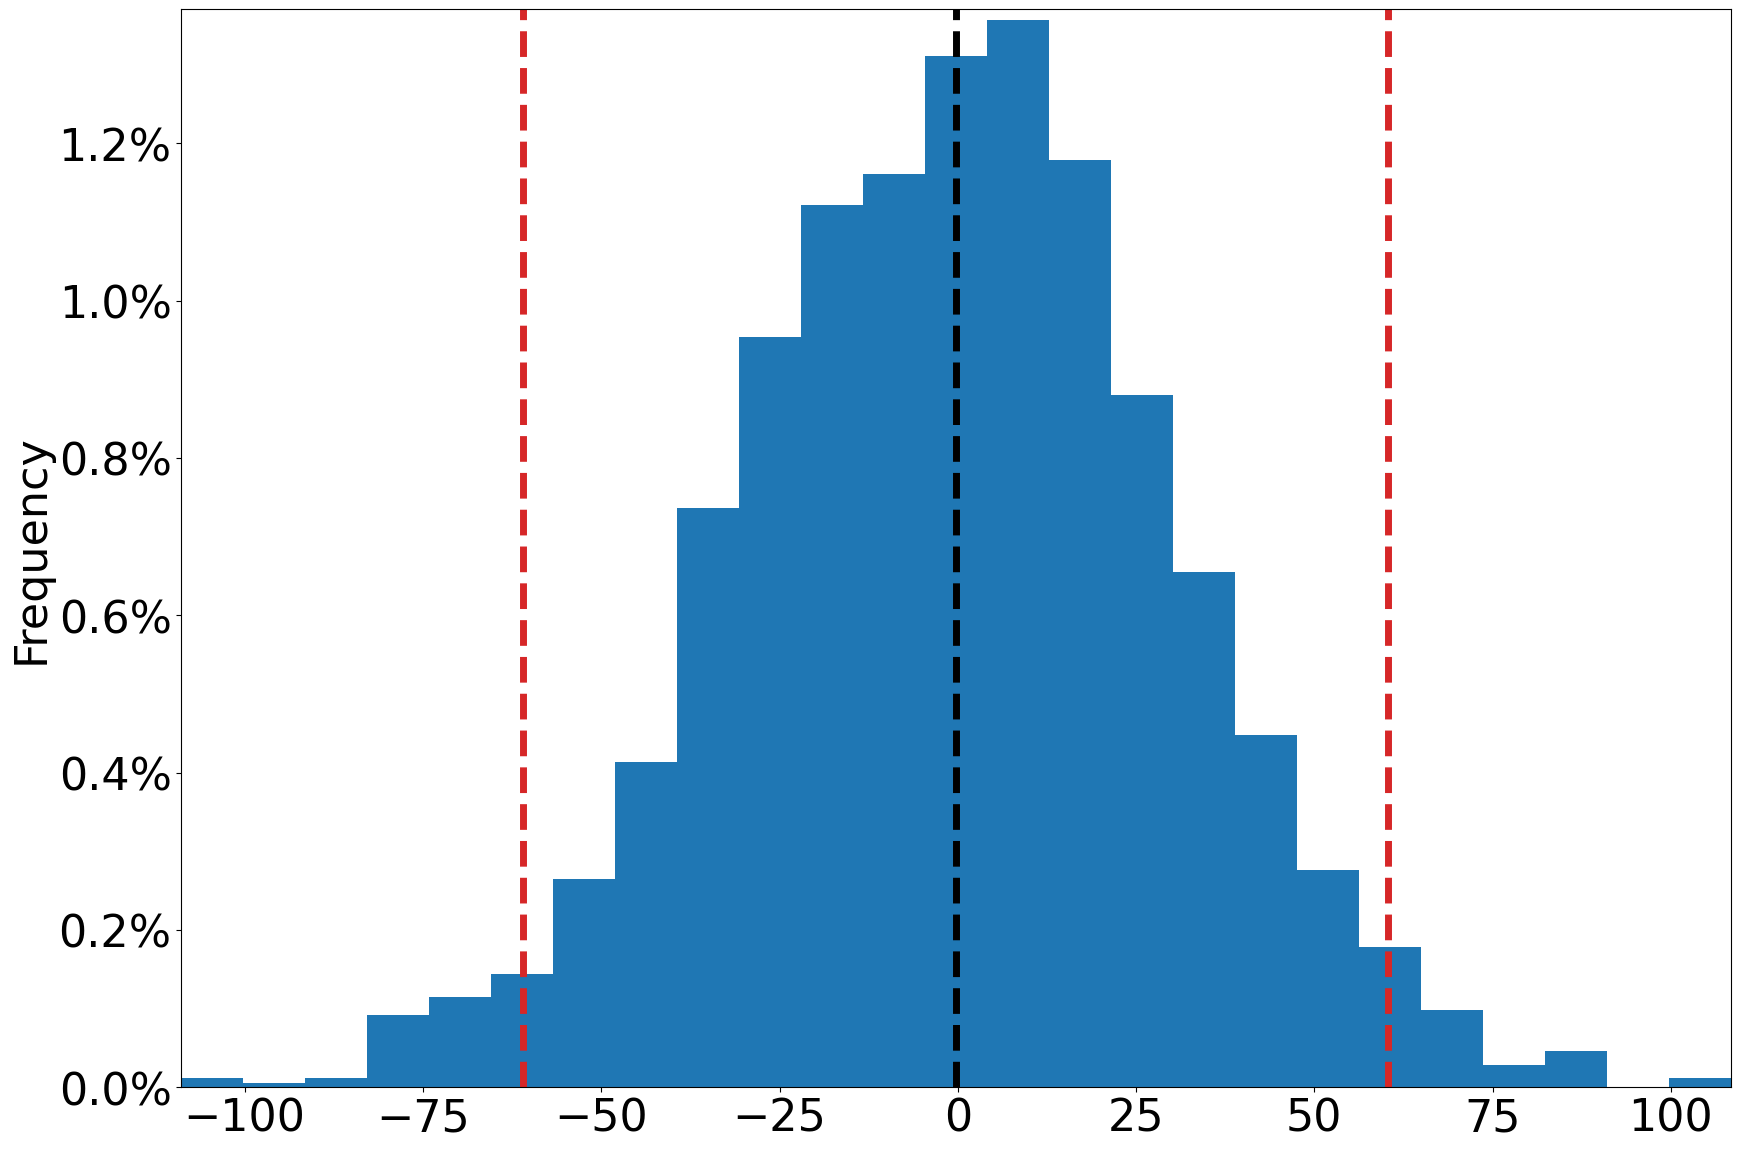

In [47]:
fig, ax = plt.subplots(figsize = (20, 14))

# Select the last row of the sim_df DataFrame and store it in a new variable called plot_df
plot_df = sim_df.iloc[-1]

# Plot a histogram of the values in plot_df, with 25 bins and normalized density values
plot_df.plot.hist(bins = 25,
                        density = True,
                        ax = ax)

# Add vertical lines at the mean and mean +/- 2 standard deviations of the values in plot_df, 
# with a dashed line style and a specified color and linewidth
ax.axvline(plot_df.mean(),
            ls = '--',
            linewidth = 5,
            color = 'k')

ax.axvline(plot_df.mean() + plot_df.std() * 2,
            ls = '--',
            linewidth = 5,
            color = 'C3')

ax.axvline(plot_df.mean() - plot_df.std() * 2,
            ls = '--',
            linewidth = 5,
            color = 'C3')

# Format the y-axis tick labels to display as percentages
y_vals = ax.get_yticks()
ax.set_yticklabels([str(round(y * 100, 1)) + '%' for y in y_vals])